In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.contrib import learn
from sklearn import preprocessing
from sklearn import metrics
from __future__ import print_function
import itertools
#from tensorflow.python.ops import math_ops

%matplotlib inline

In [2]:
%run ./importWalkingDataConfidence.ipynb

Dimension of walking test_x  =  (134, 27)
Dimension of walking train_x =  (536, 27)


In [3]:
def get_input_fn(data_x,data_y, LABEL, num_epochs=None, shuffle=True):
  return tf.estimator.inputs.pandas_input_fn(
      x=pd.DataFrame({k: data_x[k].values for k in FEATURESALL_WTS}),
      y = pd.DataFrame(data_y[LABEL].values),
      num_epochs=num_epochs,
      shuffle=shuffle)

In [4]:
#embedded_ffp_column = tf.contrib.layers.embedding_column(
    #tf.contrib.layers.sparse_column_with_integerized_feature("FFPType", 7, combiner=None, dtype=tf.int64), dimension = 7)
# Continuous columns- frontKneesAngle	rearKneesAngle	frontAnkle	rearAnkle	frontHipsAngle
bodyZ = tf.feature_column.numeric_column("bodyAngleZ")
frontK = tf.feature_column.numeric_column("frontKneesAngle")
rearK = tf.feature_column.numeric_column("rearKneesAngle")
frontA = tf.feature_column.numeric_column("frontAnkle")
rearA = tf.feature_column.numeric_column("rearAnkle")
frontH = tf.feature_column.numeric_column("frontHipsAngle")
rearH = tf.feature_column.numeric_column("rearHipsAngle")
swingFtHt = tf.feature_column.numeric_column("swingFtHeight")
speed = tf.feature_column.numeric_column("speed")
gaitTime = tf.feature_column.numeric_column("gaitDuration")
ffp_column  = tf.feature_column.numeric_column("FFPType")

feature_cols = [bodyZ, frontK, rearK, frontA, rearA, frontH, rearH, swingFtHt, speed, gaitTime, ffp_column]


In [5]:
LABEL_ID = 0;
LABEL = EMOSCORES[LABEL_ID]
WT_COL = WTS_LABEL[LABEL_ID]

In [6]:
# Build 2 layer fully connected DNN with 100, 100 units respectively.

regressor = tf.contrib.learn.DNNRegressor(
  feature_columns=feature_cols, hidden_units=[100, 100],  model_dir="/DNN/quadMotionConfidenceRELU_allCont", weight_column_name = WT_COL,
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001), dropout = 0.1)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002326CF86E10>, '_environment': 'local', '_is_chief': True, '_model_dir': '/DNN/quadMotionConfidenceRELU_allCont', '_session_config': None, '_save_checkpoints_secs': 600, '_task_id': 0, '_tf_random_seed': None, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100, '_save_summary_steps': 100, '_num_worker_replicas': 0, '_master': '', '_keep_checkpoint_every_n_hours': 10000, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_evaluation_master': '', '_num_ps_replicas': 0, '_save_checkpoints_steps': None, '_task_type': None}


In [23]:
# Train.
regressor.fit(input_fn=get_input_fn(X_train_all_wts, y_train, LABEL, num_epochs=None, shuffle=True),steps=2000000) #2000000

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.


--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\t_desar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\logging\__init__.py", line 986, in emit
    msg = self.format(record)
  File "C:\Users\t_desar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\logging\__init__.py", line 836, in format
    return fmt.format(record)
  File "C:\Users\t_desar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\logging\__init__.py", line 573, in format
    record.message = record.getMessage()
  File "C:\Users\t_desar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\logging\__init__.py", line 336, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\t_desar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\t_desar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\runpy.py", line 85, in _ru

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /DNN/quadMotionConfidenceRELU_allCont\model.ckpt-200000
INFO:tensorflow:Saving checkpoints for 200001 into /DNN/quadMotionConfidenceRELU_allCont\model.ckpt.
INFO:tensorflow:step = 200001, loss = 0.688971
INFO:tensorflow:global_step/sec: 249.203
INFO:tensorflow:step = 200101, loss = 0.976309 (0.402 sec)
INFO:tensorflow:global_step/sec: 301.026
INFO:tensorflow:step = 200201, loss = 0.791519 (0.334 sec)
INFO:tensorflow:global_step/sec: 256.215
INFO:tensorflow:step = 200301, loss = 0.928879 (0.389 sec)
INFO:tensorflow:global_step/sec: 264.363
INFO:tensorflow:step = 200401, loss = 0.711291 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.673
INFO:tensorflow:step = 200501, loss = 0.845069 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.37
INFO:tensorflow:step = 200601, loss = 0.486057 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.385
INFO:tensorflow:step = 200701, loss = 0.77389 (0.379 sec)
INFO:tensorf

INFO:tensorflow:step = 208001, loss = 0.575842 (0.376 sec)
INFO:tensorflow:global_step/sec: 267.197
INFO:tensorflow:step = 208101, loss = 0.587411 (0.374 sec)
INFO:tensorflow:global_step/sec: 262.974
INFO:tensorflow:step = 208201, loss = 0.661814 (0.380 sec)
INFO:tensorflow:global_step/sec: 262.971
INFO:tensorflow:step = 208301, loss = 0.594035 (0.381 sec)
INFO:tensorflow:global_step/sec: 259.562
INFO:tensorflow:step = 208401, loss = 0.825844 (0.385 sec)
INFO:tensorflow:global_step/sec: 262.979
INFO:tensorflow:step = 208501, loss = 0.60011 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.792
INFO:tensorflow:step = 208601, loss = 0.756644 (0.376 sec)
INFO:tensorflow:global_step/sec: 261.579
INFO:tensorflow:step = 208701, loss = 0.483555 (0.382 sec)
INFO:tensorflow:global_step/sec: 262.288
INFO:tensorflow:step = 208801, loss = 0.776918 (0.381 sec)
INFO:tensorflow:global_step/sec: 264.37
INFO:tensorflow:step = 208901, loss = 0.697761 (0.377 sec)
INFO:tensorflow:global_step/sec: 258.228
IN

INFO:tensorflow:global_step/sec: 265.066
INFO:tensorflow:step = 216301, loss = 0.729394 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.774
INFO:tensorflow:step = 216401, loss = 0.578361 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.774
INFO:tensorflow:step = 216501, loss = 0.647889 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.366
INFO:tensorflow:step = 216601, loss = 0.685486 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.775
INFO:tensorflow:step = 216701, loss = 0.684974 (0.376 sec)
INFO:tensorflow:global_step/sec: 266.476
INFO:tensorflow:step = 216801, loss = 0.754233 (0.375 sec)
INFO:tensorflow:global_step/sec: 264.389
INFO:tensorflow:step = 216901, loss = 0.552969 (0.379 sec)
INFO:tensorflow:global_step/sec: 260.218
INFO:tensorflow:step = 217001, loss = 0.512644 (0.383 sec)
INFO:tensorflow:global_step/sec: 266.486
INFO:tensorflow:step = 217101, loss = 0.893762 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.069
INFO:tensorflow:step = 217201, loss = 0.617208 (0.377 sec)


INFO:tensorflow:step = 224501, loss = 0.665396 (0.378 sec)
INFO:tensorflow:global_step/sec: 261.586
INFO:tensorflow:step = 224601, loss = 0.65189 (0.382 sec)
INFO:tensorflow:global_step/sec: 262.295
INFO:tensorflow:step = 224701, loss = 0.506206 (0.381 sec)
INFO:tensorflow:global_step/sec: 261.602
INFO:tensorflow:step = 224801, loss = 1.03546 (0.383 sec)
INFO:tensorflow:global_step/sec: 262.302
INFO:tensorflow:step = 224901, loss = 0.819701 (0.381 sec)
INFO:tensorflow:global_step/sec: 264.368
INFO:tensorflow:step = 225001, loss = 0.871315 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.647
INFO:tensorflow:step = 225101, loss = 0.753824 (0.379 sec)
INFO:tensorflow:global_step/sec: 260.921
INFO:tensorflow:step = 225201, loss = 0.706129 (0.383 sec)
INFO:tensorflow:global_step/sec: 262.287
INFO:tensorflow:step = 225301, loss = 0.754715 (0.380 sec)
INFO:tensorflow:global_step/sec: 260.237
INFO:tensorflow:step = 225401, loss = 0.698584 (0.385 sec)
INFO:tensorflow:global_step/sec: 265.773
IN

INFO:tensorflow:global_step/sec: 265.084
INFO:tensorflow:step = 232801, loss = 0.521402 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.654
INFO:tensorflow:step = 232901, loss = 0.574881 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.772
INFO:tensorflow:step = 233001, loss = 0.617557 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.288
INFO:tensorflow:step = 233101, loss = 0.876066 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.787
INFO:tensorflow:step = 233201, loss = 0.65345 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.958
INFO:tensorflow:step = 233301, loss = 0.669136 (0.380 sec)
INFO:tensorflow:global_step/sec: 266.486
INFO:tensorflow:step = 233401, loss = 0.708321 (0.374 sec)
INFO:tensorflow:global_step/sec: 267.19
INFO:tensorflow:step = 233501, loss = 0.542933 (0.375 sec)
INFO:tensorflow:global_step/sec: 261.619
INFO:tensorflow:step = 233601, loss = 0.856677 (0.383 sec)
INFO:tensorflow:global_step/sec: 264.352
INFO:tensorflow:step = 233701, loss = 0.639356 (0.377 sec)
IN

INFO:tensorflow:step = 241001, loss = 0.635319 (0.385 sec)
INFO:tensorflow:global_step/sec: 262.975
INFO:tensorflow:step = 241101, loss = 0.68125 (0.381 sec)
INFO:tensorflow:global_step/sec: 257.554
INFO:tensorflow:step = 241201, loss = 0.871199 (0.387 sec)
INFO:tensorflow:global_step/sec: 264.351
INFO:tensorflow:step = 241301, loss = 0.870231 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.082
INFO:tensorflow:step = 241401, loss = 0.502375 (0.378 sec)
INFO:tensorflow:global_step/sec: 258.206
INFO:tensorflow:step = 241501, loss = 0.504103 (0.386 sec)
INFO:tensorflow:global_step/sec: 264.365
INFO:tensorflow:step = 241601, loss = 0.70466 (0.379 sec)
INFO:tensorflow:global_step/sec: 261.601
INFO:tensorflow:step = 241701, loss = 0.78352 (0.382 sec)
INFO:tensorflow:global_step/sec: 263.685
INFO:tensorflow:step = 241801, loss = 0.844201 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.961
INFO:tensorflow:step = 241901, loss = 0.594804 (0.381 sec)
INFO:tensorflow:global_step/sec: 261.599
INF

INFO:tensorflow:global_step/sec: 263.692
INFO:tensorflow:step = 249301, loss = 0.74414 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.964
INFO:tensorflow:step = 249401, loss = 0.501025 (0.380 sec)
INFO:tensorflow:global_step/sec: 262.304
INFO:tensorflow:step = 249501, loss = 0.74679 (0.381 sec)
INFO:tensorflow:global_step/sec: 265.758
INFO:tensorflow:step = 249601, loss = 0.979817 (0.375 sec)
INFO:tensorflow:global_step/sec: 263.685
INFO:tensorflow:step = 249701, loss = 0.60092 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.052
INFO:tensorflow:step = 249801, loss = 0.569724 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.368
INFO:tensorflow:step = 249901, loss = 0.421983 (0.379 sec)
INFO:tensorflow:global_step/sec: 257.55
INFO:tensorflow:step = 250001, loss = 0.535905 (0.388 sec)
INFO:tensorflow:global_step/sec: 265.072
INFO:tensorflow:step = 250101, loss = 0.629582 (0.376 sec)
INFO:tensorflow:global_step/sec: 260.916
INFO:tensorflow:step = 250201, loss = 0.454838 (0.384 sec)
INFO

INFO:tensorflow:step = 257501, loss = 0.650687 (0.374 sec)
INFO:tensorflow:global_step/sec: 260.937
INFO:tensorflow:step = 257601, loss = 0.700737 (0.383 sec)
INFO:tensorflow:global_step/sec: 263.67
INFO:tensorflow:step = 257701, loss = 0.7732 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.961
INFO:tensorflow:step = 257801, loss = 0.588215 (0.381 sec)
INFO:tensorflow:global_step/sec: 266.481
INFO:tensorflow:step = 257901, loss = 0.602578 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.067
INFO:tensorflow:step = 258001, loss = 0.651611 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.977
INFO:tensorflow:step = 258101, loss = 0.569086 (0.379 sec)
INFO:tensorflow:global_step/sec: 266.466
INFO:tensorflow:step = 258201, loss = 0.871203 (0.376 sec)
INFO:tensorflow:global_step/sec: 266.495
INFO:tensorflow:step = 258301, loss = 0.70339 (0.374 sec)
INFO:tensorflow:global_step/sec: 263.673
INFO:tensorflow:step = 258401, loss = 0.663697 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.366
INFO

INFO:tensorflow:global_step/sec: 262.975
INFO:tensorflow:step = 265801, loss = 0.693694 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.77
INFO:tensorflow:step = 265901, loss = 0.570682 (0.376 sec)
INFO:tensorflow:global_step/sec: 263.667
INFO:tensorflow:step = 266001, loss = 0.684868 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.365
INFO:tensorflow:step = 266101, loss = 0.523309 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.976
INFO:tensorflow:step = 266201, loss = 0.594941 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.975
INFO:tensorflow:step = 266301, loss = 0.652732 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.063
INFO:tensorflow:step = 266401, loss = 0.774437 (0.378 sec)
INFO:tensorflow:global_step/sec: 267.212
INFO:tensorflow:step = 266501, loss = 0.645475 (0.374 sec)
INFO:tensorflow:global_step/sec: 264.348
INFO:tensorflow:step = 266601, loss = 0.803415 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.066
INFO:tensorflow:step = 266701, loss = 0.475435 (0.376 sec)
I

INFO:tensorflow:step = 274001, loss = 0.529987 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.773
INFO:tensorflow:step = 274101, loss = 0.515121 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.365
INFO:tensorflow:step = 274201, loss = 0.681299 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.995
INFO:tensorflow:step = 274301, loss = 0.44027 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.757
INFO:tensorflow:step = 274401, loss = 0.709311 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.066
INFO:tensorflow:step = 274501, loss = 0.43903 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.771
INFO:tensorflow:step = 274601, loss = 0.369272 (0.375 sec)
INFO:tensorflow:global_step/sec: 266.477
INFO:tensorflow:step = 274701, loss = 0.718988 (0.376 sec)
INFO:tensorflow:global_step/sec: 263.67
INFO:tensorflow:step = 274801, loss = 0.437407 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.367
INFO:tensorflow:step = 274901, loss = 0.630781 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.381
INF

INFO:tensorflow:global_step/sec: 265.086
INFO:tensorflow:step = 282301, loss = 0.748963 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.652
INFO:tensorflow:step = 282401, loss = 0.438239 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.77
INFO:tensorflow:step = 282501, loss = 0.604443 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.069
INFO:tensorflow:step = 282601, loss = 0.428594 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.668
INFO:tensorflow:step = 282701, loss = 0.728586 (0.380 sec)
INFO:tensorflow:global_step/sec: 264.361
INFO:tensorflow:step = 282801, loss = 0.415007 (0.377 sec)
INFO:tensorflow:global_step/sec: 266.473
INFO:tensorflow:step = 282901, loss = 0.562144 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.783
INFO:tensorflow:step = 283001, loss = 0.834466 (0.375 sec)
INFO:tensorflow:global_step/sec: 266.482
INFO:tensorflow:step = 283101, loss = 0.599507 (0.375 sec)
INFO:tensorflow:global_step/sec: 262.974
INFO:tensorflow:step = 283201, loss = 0.620984 (0.380 sec)
I

INFO:tensorflow:step = 290501, loss = 0.785721 (0.376 sec)
INFO:tensorflow:global_step/sec: 262.973
INFO:tensorflow:step = 290601, loss = 0.604654 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.777
INFO:tensorflow:step = 290701, loss = 0.625746 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.772
INFO:tensorflow:step = 290801, loss = 0.591516 (0.376 sec)
INFO:tensorflow:global_step/sec: 259.553
INFO:tensorflow:step = 290901, loss = 0.586019 (0.386 sec)
INFO:tensorflow:global_step/sec: 264.362
INFO:tensorflow:step = 291001, loss = 0.605768 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.076
INFO:tensorflow:step = 291101, loss = 0.756753 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.766
INFO:tensorflow:step = 291201, loss = 0.566357 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.772
INFO:tensorflow:step = 291301, loss = 0.480368 (0.376 sec)
INFO:tensorflow:global_step/sec: 263.69
INFO:tensorflow:step = 291401, loss = 0.779862 (0.379 sec)
INFO:tensorflow:global_step/sec: 266.479
I

INFO:tensorflow:global_step/sec: 265.082
INFO:tensorflow:step = 298801, loss = 0.534532 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.067
INFO:tensorflow:step = 298901, loss = 0.567914 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.756
INFO:tensorflow:step = 299001, loss = 0.541847 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.067
INFO:tensorflow:step = 299101, loss = 0.645484 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.065
INFO:tensorflow:step = 299201, loss = 0.48632 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.068
INFO:tensorflow:step = 299301, loss = 0.45563 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.366
INFO:tensorflow:step = 299401, loss = 0.636951 (0.378 sec)
INFO:tensorflow:global_step/sec: 266.475
INFO:tensorflow:step = 299501, loss = 0.63042 (0.375 sec)
INFO:tensorflow:global_step/sec: 263.672
INFO:tensorflow:step = 299601, loss = 0.621907 (0.379 sec)
INFO:tensorflow:global_step/sec: 263.667
INFO:tensorflow:step = 299701, loss = 0.65464 (0.378 sec)
INFO

INFO:tensorflow:step = 307001, loss = 0.566094 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.35
INFO:tensorflow:step = 307101, loss = 0.561698 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.083
INFO:tensorflow:step = 307201, loss = 0.587829 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.948
INFO:tensorflow:step = 307301, loss = 0.462421 (0.380 sec)
INFO:tensorflow:global_step/sec: 266.492
INFO:tensorflow:step = 307401, loss = 0.474166 (0.374 sec)
INFO:tensorflow:global_step/sec: 265.77
INFO:tensorflow:step = 307501, loss = 0.522584 (0.376 sec)
INFO:tensorflow:global_step/sec: 262.294
INFO:tensorflow:step = 307601, loss = 0.420584 (0.382 sec)
INFO:tensorflow:global_step/sec: 265.057
INFO:tensorflow:step = 307701, loss = 0.591525 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.772
INFO:tensorflow:step = 307801, loss = 0.429265 (0.376 sec)
INFO:tensorflow:global_step/sec: 262.971
INFO:tensorflow:step = 307901, loss = 0.551692 (0.381 sec)
INFO:tensorflow:global_step/sec: 263.672
IN

INFO:tensorflow:global_step/sec: 264.364
INFO:tensorflow:step = 315301, loss = 0.716881 (0.377 sec)
INFO:tensorflow:global_step/sec: 267.195
INFO:tensorflow:step = 315401, loss = 0.502284 (0.374 sec)
INFO:tensorflow:global_step/sec: 266.482
INFO:tensorflow:step = 315501, loss = 0.401182 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.065
INFO:tensorflow:step = 315601, loss = 0.292578 (0.377 sec)
INFO:tensorflow:global_step/sec: 267.192
INFO:tensorflow:step = 315701, loss = 0.484266 (0.375 sec)
INFO:tensorflow:global_step/sec: 262.976
INFO:tensorflow:step = 315801, loss = 0.484371 (0.379 sec)
INFO:tensorflow:global_step/sec: 266.481
INFO:tensorflow:step = 315901, loss = 0.618501 (0.375 sec)
INFO:tensorflow:global_step/sec: 264.365
INFO:tensorflow:step = 316001, loss = 0.692947 (0.379 sec)
INFO:tensorflow:global_step/sec: 261.597
INFO:tensorflow:step = 316101, loss = 0.48268 (0.381 sec)
INFO:tensorflow:global_step/sec: 266.497
INFO:tensorflow:step = 316201, loss = 0.584135 (0.375 sec)
I

INFO:tensorflow:step = 323501, loss = 0.479178 (0.380 sec)
INFO:tensorflow:global_step/sec: 267.893
INFO:tensorflow:step = 323601, loss = 0.589092 (0.374 sec)
INFO:tensorflow:global_step/sec: 265.063
INFO:tensorflow:step = 323701, loss = 0.474376 (0.376 sec)
INFO:tensorflow:global_step/sec: 262.275
INFO:tensorflow:step = 323801, loss = 0.702077 (0.381 sec)
INFO:tensorflow:global_step/sec: 265.784
INFO:tensorflow:step = 323901, loss = 0.526349 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.065
INFO:tensorflow:step = 324001, loss = 0.345435 (0.377 sec)
INFO:tensorflow:global_step/sec: 267.196
INFO:tensorflow:step = 324101, loss = 0.748116 (0.374 sec)
INFO:tensorflow:global_step/sec: 266.48
INFO:tensorflow:step = 324201, loss = 0.683183 (0.375 sec)
INFO:tensorflow:global_step/sec: 259.559
INFO:tensorflow:step = 324301, loss = 0.685766 (0.385 sec)
INFO:tensorflow:global_step/sec: 265.77
INFO:tensorflow:step = 324401, loss = 0.684781 (0.376 sec)
INFO:tensorflow:global_step/sec: 267.182
IN

INFO:tensorflow:global_step/sec: 267.196
INFO:tensorflow:step = 331801, loss = 0.808726 (0.374 sec)
INFO:tensorflow:global_step/sec: 263.67
INFO:tensorflow:step = 331901, loss = 0.808197 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.973
INFO:tensorflow:step = 332001, loss = 0.480326 (0.380 sec)
INFO:tensorflow:global_step/sec: 263.684
INFO:tensorflow:step = 332101, loss = 0.482733 (0.380 sec)
INFO:tensorflow:global_step/sec: 263.651
INFO:tensorflow:step = 332201, loss = 0.469364 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.048
INFO:tensorflow:step = 332301, loss = 0.437876 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.087
INFO:tensorflow:step = 332401, loss = 0.713736 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.664
INFO:tensorflow:step = 332501, loss = 0.400735 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.776
INFO:tensorflow:step = 332601, loss = 0.420094 (0.375 sec)
INFO:tensorflow:global_step/sec: 266.479
INFO:tensorflow:step = 332701, loss = 0.561945 (0.375 sec)
I

INFO:tensorflow:step = 340001, loss = 0.670988 (0.379 sec)
INFO:tensorflow:global_step/sec: 259.562
INFO:tensorflow:step = 340101, loss = 0.543576 (0.385 sec)
INFO:tensorflow:global_step/sec: 264.366
INFO:tensorflow:step = 340201, loss = 0.459628 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.966
INFO:tensorflow:step = 340301, loss = 0.529409 (0.380 sec)
INFO:tensorflow:global_step/sec: 262.29
INFO:tensorflow:step = 340401, loss = 0.750173 (0.380 sec)
INFO:tensorflow:global_step/sec: 260.915
INFO:tensorflow:step = 340501, loss = 1.22551 (0.383 sec)
INFO:tensorflow:global_step/sec: 262.281
INFO:tensorflow:step = 340601, loss = 0.625042 (0.382 sec)
INFO:tensorflow:global_step/sec: 262.278
INFO:tensorflow:step = 340701, loss = 0.544089 (0.381 sec)
INFO:tensorflow:global_step/sec: 262.984
INFO:tensorflow:step = 340801, loss = 0.631846 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.97
INFO:tensorflow:step = 340901, loss = 0.54583 (0.381 sec)
INFO:tensorflow:global_step/sec: 261.578
INFO

INFO:tensorflow:global_step/sec: 264.368
INFO:tensorflow:step = 348301, loss = 0.515698 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.288
INFO:tensorflow:step = 348401, loss = 0.671777 (0.381 sec)
INFO:tensorflow:global_step/sec: 265.771
INFO:tensorflow:step = 348501, loss = 0.460489 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.064
INFO:tensorflow:step = 348601, loss = 0.643464 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.976
INFO:tensorflow:step = 348701, loss = 0.64491 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.068
INFO:tensorflow:step = 348801, loss = 0.487253 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.284
INFO:tensorflow:step = 348901, loss = 0.672759 (0.380 sec)
INFO:tensorflow:global_step/sec: 264.364
INFO:tensorflow:step = 349001, loss = 0.601885 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.277
INFO:tensorflow:step = 349101, loss = 0.460036 (0.380 sec)
INFO:tensorflow:global_step/sec: 262.981
INFO:tensorflow:step = 349201, loss = 0.800751 (0.380 sec)
I

INFO:tensorflow:step = 356501, loss = 0.553047 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.066
INFO:tensorflow:step = 356601, loss = 0.527531 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.069
INFO:tensorflow:step = 356701, loss = 0.435508 (0.376 sec)
INFO:tensorflow:global_step/sec: 266.477
INFO:tensorflow:step = 356801, loss = 0.502613 (0.375 sec)
INFO:tensorflow:global_step/sec: 267.19
INFO:tensorflow:step = 356901, loss = 0.641334 (0.375 sec)
INFO:tensorflow:global_step/sec: 260.239
INFO:tensorflow:step = 357001, loss = 0.483202 (0.384 sec)
INFO:tensorflow:global_step/sec: 260.236
INFO:tensorflow:step = 357101, loss = 0.963393 (0.383 sec)
INFO:tensorflow:global_step/sec: 262.972
INFO:tensorflow:step = 357201, loss = 0.612887 (0.380 sec)
INFO:tensorflow:global_step/sec: 262.283
INFO:tensorflow:step = 357301, loss = 0.557618 (0.381 sec)
INFO:tensorflow:global_step/sec: 265.775
INFO:tensorflow:step = 357401, loss = 0.449432 (0.376 sec)
INFO:tensorflow:global_step/sec: 262.974
I

INFO:tensorflow:global_step/sec: 262.994
INFO:tensorflow:step = 364701, loss = 0.737221 (0.379 sec)
INFO:tensorflow:global_step/sec: 258.867
INFO:tensorflow:step = 364801, loss = 0.568961 (0.387 sec)
INFO:tensorflow:global_step/sec: 262.979
INFO:tensorflow:step = 364901, loss = 0.519886 (0.380 sec)
INFO:tensorflow:global_step/sec: 260.908
INFO:tensorflow:step = 365001, loss = 0.387447 (0.383 sec)
INFO:tensorflow:global_step/sec: 262.995
INFO:tensorflow:step = 365101, loss = 0.501369 (0.380 sec)
INFO:tensorflow:global_step/sec: 261.597
INFO:tensorflow:step = 365201, loss = 0.496706 (0.381 sec)
INFO:tensorflow:global_step/sec: 262.269
INFO:tensorflow:step = 365301, loss = 0.472842 (0.382 sec)
INFO:tensorflow:global_step/sec: 263.664
INFO:tensorflow:step = 365401, loss = 0.558412 (0.379 sec)
INFO:tensorflow:global_step/sec: 263.671
INFO:tensorflow:step = 365501, loss = 0.481809 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.374
INFO:tensorflow:step = 365601, loss = 0.38569 (0.377 sec)
I

INFO:tensorflow:step = 372901, loss = 0.409462 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.668
INFO:tensorflow:step = 373001, loss = 0.441955 (0.379 sec)
INFO:tensorflow:global_step/sec: 263.684
INFO:tensorflow:step = 373101, loss = 0.640932 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.327
INFO:tensorflow:step = 373201, loss = 0.502526 (0.379 sec)
INFO:tensorflow:global_step/sec: 266.499
INFO:tensorflow:step = 373301, loss = 0.749198 (0.375 sec)
INFO:tensorflow:global_step/sec: 262.979
INFO:tensorflow:step = 373401, loss = 0.587476 (0.380 sec)
INFO:tensorflow:global_step/sec: 264.364
INFO:tensorflow:step = 373501, loss = 0.584521 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.065
INFO:tensorflow:step = 373601, loss = 0.377872 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.974
INFO:tensorflow:step = 373701, loss = 0.736018 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.774
INFO:tensorflow:step = 373801, loss = 0.501204 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.064


INFO:tensorflow:global_step/sec: 263.661
INFO:tensorflow:step = 381201, loss = 0.504764 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.074
INFO:tensorflow:step = 381301, loss = 0.660921 (0.377 sec)
INFO:tensorflow:global_step/sec: 260.909
INFO:tensorflow:step = 381401, loss = 0.684243 (0.384 sec)
INFO:tensorflow:global_step/sec: 267.199
INFO:tensorflow:step = 381501, loss = 0.618456 (0.373 sec)
INFO:tensorflow:global_step/sec: 264.366
INFO:tensorflow:step = 381601, loss = 0.662729 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.786
INFO:tensorflow:step = 381701, loss = 0.388797 (0.377 sec)
INFO:tensorflow:global_step/sec: 260.216
INFO:tensorflow:step = 381801, loss = 0.422836 (0.383 sec)
INFO:tensorflow:global_step/sec: 265.777
INFO:tensorflow:step = 381901, loss = 0.518716 (0.376 sec)
INFO:tensorflow:global_step/sec: 266.48
INFO:tensorflow:step = 382001, loss = 0.485478 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.082
INFO:tensorflow:step = 382101, loss = 0.64998 (0.378 sec)
IN

INFO:tensorflow:step = 389401, loss = 0.721129 (0.384 sec)
INFO:tensorflow:global_step/sec: 260.931
INFO:tensorflow:step = 389501, loss = 0.49736 (0.376 sec)
INFO:tensorflow:global_step/sec: 262.977
INFO:tensorflow:step = 389601, loss = 0.746116 (0.379 sec)
INFO:tensorflow:global_step/sec: 267.183
INFO:tensorflow:step = 389701, loss = 0.396934 (0.374 sec)
INFO:tensorflow:global_step/sec: 265.093
INFO:tensorflow:step = 389801, loss = 0.711061 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.751
INFO:tensorflow:step = 389901, loss = 0.436909 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.673
INFO:tensorflow:step = 390001, loss = 0.451279 (0.378 sec)
INFO:tensorflow:global_step/sec: 266.477
INFO:tensorflow:step = 390101, loss = 0.587957 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.772
INFO:tensorflow:step = 390201, loss = 0.436007 (0.375 sec)
INFO:tensorflow:global_step/sec: 264.367
INFO:tensorflow:step = 390301, loss = 0.581759 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.285
I

INFO:tensorflow:global_step/sec: 262.269
INFO:tensorflow:step = 397701, loss = 0.511771 (0.380 sec)
INFO:tensorflow:global_step/sec: 262.28
INFO:tensorflow:step = 397801, loss = 0.387019 (0.382 sec)
INFO:tensorflow:global_step/sec: 265.044
INFO:tensorflow:step = 397901, loss = 0.46689 (0.377 sec)
INFO:tensorflow:global_step/sec: 260.256
INFO:tensorflow:step = 398001, loss = 0.558932 (0.384 sec)
INFO:tensorflow:global_step/sec: 262.283
INFO:tensorflow:step = 398101, loss = 0.712876 (0.380 sec)
INFO:tensorflow:global_step/sec: 263.669
INFO:tensorflow:step = 398201, loss = 0.479554 (0.379 sec)
INFO:tensorflow:global_step/sec: 261.617
INFO:tensorflow:step = 398301, loss = 0.523258 (0.383 sec)
INFO:tensorflow:global_step/sec: 262.261
INFO:tensorflow:step = 398401, loss = 0.614736 (0.381 sec)
INFO:tensorflow:global_step/sec: 263.675
INFO:tensorflow:step = 398501, loss = 0.407932 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.974
INFO:tensorflow:step = 398601, loss = 0.461585 (0.380 sec)
IN

INFO:tensorflow:step = 405901, loss = 0.693165 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.056
INFO:tensorflow:step = 406001, loss = 0.410243 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.782
INFO:tensorflow:step = 406101, loss = 0.454736 (0.377 sec)
INFO:tensorflow:global_step/sec: 261.596
INFO:tensorflow:step = 406201, loss = 0.431048 (0.382 sec)
INFO:tensorflow:global_step/sec: 265.771
INFO:tensorflow:step = 406301, loss = 0.437844 (0.376 sec)
INFO:tensorflow:global_step/sec: 264.383
INFO:tensorflow:step = 406401, loss = 0.552054 (0.377 sec)
INFO:tensorflow:global_step/sec: 266.462
INFO:tensorflow:step = 406501, loss = 0.389174 (0.376 sec)
INFO:tensorflow:global_step/sec: 263.67
INFO:tensorflow:step = 406601, loss = 0.423585 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.282
INFO:tensorflow:step = 406701, loss = 0.457446 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.065
INFO:tensorflow:step = 406801, loss = 0.31857 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.086
IN

INFO:tensorflow:global_step/sec: 265.07
INFO:tensorflow:step = 414201, loss = 0.484133 (0.378 sec)
INFO:tensorflow:global_step/sec: 259.573
INFO:tensorflow:step = 414301, loss = 0.40992 (0.385 sec)
INFO:tensorflow:global_step/sec: 262.955
INFO:tensorflow:step = 414401, loss = 0.499457 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.775
INFO:tensorflow:step = 414501, loss = 0.455792 (0.376 sec)
INFO:tensorflow:global_step/sec: 266.475
INFO:tensorflow:step = 414601, loss = 0.505976 (0.375 sec)
INFO:tensorflow:global_step/sec: 258.239
INFO:tensorflow:step = 414701, loss = 0.47492 (0.386 sec)
INFO:tensorflow:global_step/sec: 264.35
INFO:tensorflow:step = 414801, loss = 0.432183 (0.379 sec)
INFO:tensorflow:global_step/sec: 266.479
INFO:tensorflow:step = 414901, loss = 0.517949 (0.375 sec)
INFO:tensorflow:global_step/sec: 264.355
INFO:tensorflow:step = 415001, loss = 0.522774 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.679
INFO:tensorflow:step = 415101, loss = 0.430296 (0.380 sec)
INFO

INFO:tensorflow:step = 422401, loss = 0.432755 (0.376 sec)
INFO:tensorflow:global_step/sec: 266.464
INFO:tensorflow:step = 422501, loss = 0.615657 (0.375 sec)
INFO:tensorflow:global_step/sec: 267.194
INFO:tensorflow:step = 422601, loss = 0.659565 (0.374 sec)
INFO:tensorflow:global_step/sec: 266.496
INFO:tensorflow:step = 422701, loss = 0.454001 (0.374 sec)
INFO:tensorflow:global_step/sec: 267.894
INFO:tensorflow:step = 422801, loss = 0.580093 (0.373 sec)
INFO:tensorflow:global_step/sec: 265.768
INFO:tensorflow:step = 422901, loss = 0.401946 (0.377 sec)
INFO:tensorflow:global_step/sec: 266.479
INFO:tensorflow:step = 423001, loss = 0.533086 (0.375 sec)
INFO:tensorflow:global_step/sec: 263.687
INFO:tensorflow:step = 423101, loss = 0.470497 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.351
INFO:tensorflow:step = 423201, loss = 0.424256 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.067
INFO:tensorflow:step = 423301, loss = 0.374232 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.277


INFO:tensorflow:global_step/sec: 267.209
INFO:tensorflow:step = 430701, loss = 0.501159 (0.374 sec)
INFO:tensorflow:global_step/sec: 264.338
INFO:tensorflow:step = 430801, loss = 0.556393 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.078
INFO:tensorflow:step = 430901, loss = 0.478596 (0.377 sec)
INFO:tensorflow:global_step/sec: 266.476
INFO:tensorflow:step = 431001, loss = 0.666774 (0.374 sec)
INFO:tensorflow:global_step/sec: 265.069
INFO:tensorflow:step = 431101, loss = 0.586843 (0.377 sec)
INFO:tensorflow:global_step/sec: 266.483
INFO:tensorflow:step = 431201, loss = 0.594349 (0.375 sec)
INFO:tensorflow:global_step/sec: 267.193
INFO:tensorflow:step = 431301, loss = 0.554157 (0.375 sec)
INFO:tensorflow:global_step/sec: 258.219
INFO:tensorflow:step = 431401, loss = 0.523456 (0.387 sec)
INFO:tensorflow:global_step/sec: 265.766
INFO:tensorflow:step = 431501, loss = 0.694019 (0.375 sec)
INFO:tensorflow:global_step/sec: 262.283
INFO:tensorflow:step = 431601, loss = 0.552991 (0.382 sec)


INFO:tensorflow:step = 438901, loss = 0.673342 (0.381 sec)
INFO:tensorflow:global_step/sec: 261.602
INFO:tensorflow:step = 439001, loss = 0.490473 (0.381 sec)
INFO:tensorflow:global_step/sec: 265.767
INFO:tensorflow:step = 439101, loss = 0.484933 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.072
INFO:tensorflow:step = 439201, loss = 0.510317 (0.376 sec)
INFO:tensorflow:global_step/sec: 256.23
INFO:tensorflow:step = 439301, loss = 0.547869 (0.391 sec)
INFO:tensorflow:global_step/sec: 261.59
INFO:tensorflow:step = 439401, loss = 0.56184 (0.382 sec)
INFO:tensorflow:global_step/sec: 263.671
INFO:tensorflow:step = 439501, loss = 0.402889 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.783
INFO:tensorflow:step = 439601, loss = 0.626078 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.763
INFO:tensorflow:step = 439701, loss = 0.426215 (0.377 sec)
INFO:tensorflow:global_step/sec: 259.554
INFO:tensorflow:step = 439801, loss = 0.524039 (0.385 sec)
INFO:tensorflow:global_step/sec: 265.776
INF

INFO:tensorflow:global_step/sec: 262.282
INFO:tensorflow:step = 447201, loss = 0.510894 (0.381 sec)
INFO:tensorflow:global_step/sec: 263.662
INFO:tensorflow:step = 447301, loss = 0.673997 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.779
INFO:tensorflow:step = 447401, loss = 0.64674 (0.377 sec)
INFO:tensorflow:global_step/sec: 261.597
INFO:tensorflow:step = 447501, loss = 0.703744 (0.382 sec)
INFO:tensorflow:global_step/sec: 265.082
INFO:tensorflow:step = 447601, loss = 0.635476 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.285
INFO:tensorflow:step = 447701, loss = 0.432721 (0.380 sec)
INFO:tensorflow:global_step/sec: 259.543
INFO:tensorflow:step = 447801, loss = 0.403264 (0.386 sec)
INFO:tensorflow:global_step/sec: 261.595
INFO:tensorflow:step = 447901, loss = 0.645019 (0.381 sec)
INFO:tensorflow:global_step/sec: 260.238
INFO:tensorflow:step = 448001, loss = 0.417021 (0.384 sec)
INFO:tensorflow:global_step/sec: 265.067
INFO:tensorflow:step = 448101, loss = 0.530519 (0.377 sec)
I

INFO:tensorflow:step = 455401, loss = 0.496871 (0.385 sec)
INFO:tensorflow:global_step/sec: 261.601
INFO:tensorflow:step = 455501, loss = 0.581535 (0.382 sec)
INFO:tensorflow:global_step/sec: 267.209
INFO:tensorflow:step = 455601, loss = 0.420289 (0.374 sec)
INFO:tensorflow:global_step/sec: 261.582
INFO:tensorflow:step = 455701, loss = 0.585571 (0.381 sec)
INFO:tensorflow:global_step/sec: 262.973
INFO:tensorflow:step = 455801, loss = 0.566967 (0.381 sec)
INFO:tensorflow:global_step/sec: 262.285
INFO:tensorflow:step = 455901, loss = 0.499681 (0.381 sec)
INFO:tensorflow:global_step/sec: 265.764
INFO:tensorflow:step = 456001, loss = 0.511229 (0.376 sec)
INFO:tensorflow:global_step/sec: 263.676
INFO:tensorflow:step = 456101, loss = 0.444175 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.282
INFO:tensorflow:step = 456201, loss = 0.500396 (0.380 sec)
INFO:tensorflow:global_step/sec: 264.368
INFO:tensorflow:step = 456301, loss = 0.981483 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.683


INFO:tensorflow:global_step/sec: 258.233
INFO:tensorflow:step = 463701, loss = 0.542349 (0.388 sec)
INFO:tensorflow:global_step/sec: 254.261
INFO:tensorflow:step = 463801, loss = 0.519434 (0.393 sec)
INFO:tensorflow:global_step/sec: 264.364
INFO:tensorflow:step = 463901, loss = 0.720976 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.064
INFO:tensorflow:step = 464001, loss = 0.441522 (0.377 sec)
INFO:tensorflow:global_step/sec: 266.484
INFO:tensorflow:step = 464101, loss = 0.462439 (0.374 sec)
INFO:tensorflow:global_step/sec: 254.921
INFO:tensorflow:step = 464201, loss = 0.571178 (0.393 sec)
INFO:tensorflow:global_step/sec: 264.367
INFO:tensorflow:step = 464301, loss = 0.584614 (0.377 sec)
INFO:tensorflow:global_step/sec: 260.915
INFO:tensorflow:step = 464401, loss = 0.544472 (0.383 sec)
INFO:tensorflow:global_step/sec: 265.767
INFO:tensorflow:step = 464501, loss = 0.392552 (0.377 sec)
INFO:tensorflow:global_step/sec: 253.644
INFO:tensorflow:step = 464601, loss = 0.450505 (0.394 sec)


INFO:tensorflow:step = 471901, loss = 0.478938 (0.387 sec)
INFO:tensorflow:global_step/sec: 265.068
INFO:tensorflow:step = 472001, loss = 0.538128 (0.376 sec)
INFO:tensorflow:global_step/sec: 262.97
INFO:tensorflow:step = 472101, loss = 0.50099 (0.381 sec)
INFO:tensorflow:global_step/sec: 264.37
INFO:tensorflow:step = 472201, loss = 0.459209 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.669
INFO:tensorflow:step = 472301, loss = 0.499005 (0.379 sec)
INFO:tensorflow:global_step/sec: 266.475
INFO:tensorflow:step = 472401, loss = 0.613722 (0.376 sec)
INFO:tensorflow:global_step/sec: 264.385
INFO:tensorflow:step = 472501, loss = 0.513317 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.051
INFO:tensorflow:step = 472601, loss = 0.540664 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.667
INFO:tensorflow:step = 472701, loss = 0.349463 (0.378 sec)
INFO:tensorflow:global_step/sec: 267.906
INFO:tensorflow:step = 472801, loss = 0.409941 (0.373 sec)
INFO:tensorflow:global_step/sec: 267.93
INFO

INFO:tensorflow:global_step/sec: 267.19
INFO:tensorflow:step = 480201, loss = 0.389441 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.07
INFO:tensorflow:step = 480301, loss = 0.366644 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.973
INFO:tensorflow:step = 480401, loss = 0.431027 (0.379 sec)
INFO:tensorflow:global_step/sec: 267.191
INFO:tensorflow:step = 480501, loss = 0.758303 (0.375 sec)
INFO:tensorflow:global_step/sec: 264.366
INFO:tensorflow:step = 480601, loss = 0.557398 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.974
INFO:tensorflow:step = 480701, loss = 0.370403 (0.380 sec)
INFO:tensorflow:global_step/sec: 266.497
INFO:tensorflow:step = 480801, loss = 0.473851 (0.376 sec)
INFO:tensorflow:global_step/sec: 254.908
INFO:tensorflow:step = 480901, loss = 0.298029 (0.392 sec)
INFO:tensorflow:global_step/sec: 259.56
INFO:tensorflow:step = 481001, loss = 0.589819 (0.385 sec)
INFO:tensorflow:global_step/sec: 260.912
INFO:tensorflow:step = 481101, loss = 0.530078 (0.382 sec)
INF

INFO:tensorflow:step = 488401, loss = 0.490259 (0.380 sec)
INFO:tensorflow:global_step/sec: 260.23
INFO:tensorflow:step = 488501, loss = 0.560193 (0.383 sec)
INFO:tensorflow:global_step/sec: 265.791
INFO:tensorflow:step = 488601, loss = 0.59823 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.052
INFO:tensorflow:step = 488701, loss = 0.524621 (0.377 sec)
INFO:tensorflow:global_step/sec: 258.883
INFO:tensorflow:step = 488801, loss = 0.517584 (0.387 sec)
INFO:tensorflow:global_step/sec: 241.976
INFO:tensorflow:step = 488901, loss = 0.462976 (0.413 sec)
INFO:tensorflow:global_step/sec: 260.899
INFO:tensorflow:step = 489001, loss = 0.377932 (0.382 sec)
INFO:tensorflow:global_step/sec: 257.548
INFO:tensorflow:step = 489101, loss = 0.638031 (0.389 sec)
INFO:tensorflow:global_step/sec: 267.214
INFO:tensorflow:step = 489201, loss = 0.3932 (0.376 sec)
INFO:tensorflow:global_step/sec: 263.652
INFO:tensorflow:step = 489301, loss = 0.475586 (0.376 sec)
INFO:tensorflow:global_step/sec: 254.921
INFO

INFO:tensorflow:global_step/sec: 263.67
INFO:tensorflow:step = 496701, loss = 0.536158 (0.380 sec)
INFO:tensorflow:global_step/sec: 261.6
INFO:tensorflow:step = 496801, loss = 0.276775 (0.382 sec)
INFO:tensorflow:global_step/sec: 255.574
INFO:tensorflow:step = 496901, loss = 0.436817 (0.391 sec)
INFO:tensorflow:global_step/sec: 261.6
INFO:tensorflow:step = 497001, loss = 0.563493 (0.381 sec)
INFO:tensorflow:global_step/sec: 247.964
INFO:tensorflow:step = 497101, loss = 0.369006 (0.404 sec)
INFO:tensorflow:global_step/sec: 254.276
INFO:tensorflow:step = 497201, loss = 0.47293 (0.392 sec)
INFO:tensorflow:global_step/sec: 263.668
INFO:tensorflow:step = 497301, loss = 0.533173 (0.380 sec)
INFO:tensorflow:global_step/sec: 263.667
INFO:tensorflow:step = 497401, loss = 0.50931 (0.379 sec)
INFO:tensorflow:global_step/sec: 263.684
INFO:tensorflow:step = 497501, loss = 0.908268 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.067
INFO:tensorflow:step = 497601, loss = 0.416577 (0.377 sec)
INFO:te

INFO:tensorflow:step = 504901, loss = 0.459693 (0.373 sec)
INFO:tensorflow:global_step/sec: 258.887
INFO:tensorflow:step = 505001, loss = 0.595281 (0.386 sec)
INFO:tensorflow:global_step/sec: 249.821
INFO:tensorflow:step = 505101, loss = 0.473434 (0.401 sec)
INFO:tensorflow:global_step/sec: 261.616
INFO:tensorflow:step = 505201, loss = 0.464023 (0.381 sec)
INFO:tensorflow:global_step/sec: 254.906
INFO:tensorflow:step = 505301, loss = 0.345281 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.925
INFO:tensorflow:step = 505401, loss = 0.666475 (0.392 sec)
INFO:tensorflow:global_step/sec: 244.329
INFO:tensorflow:step = 505501, loss = 0.454513 (0.409 sec)
INFO:tensorflow:global_step/sec: 262.974
INFO:tensorflow:step = 505601, loss = 0.488313 (0.381 sec)
INFO:tensorflow:global_step/sec: 264.366
INFO:tensorflow:step = 505701, loss = 0.43576 (0.378 sec)
INFO:tensorflow:global_step/sec: 237.926
INFO:tensorflow:step = 505801, loss = 0.520159 (0.420 sec)
INFO:tensorflow:global_step/sec: 255.595
I

INFO:tensorflow:global_step/sec: 265.772
INFO:tensorflow:step = 513201, loss = 0.393053 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.772
INFO:tensorflow:step = 513301, loss = 0.379287 (0.376 sec)
INFO:tensorflow:global_step/sec: 261.592
INFO:tensorflow:step = 513401, loss = 0.724423 (0.383 sec)
INFO:tensorflow:global_step/sec: 265.071
INFO:tensorflow:step = 513501, loss = 0.524866 (0.376 sec)
INFO:tensorflow:global_step/sec: 260.897
INFO:tensorflow:step = 513601, loss = 0.516021 (0.384 sec)
INFO:tensorflow:global_step/sec: 265.806
INFO:tensorflow:step = 513701, loss = 0.6396 (0.375 sec)
INFO:tensorflow:global_step/sec: 267.91
INFO:tensorflow:step = 513801, loss = 0.482298 (0.373 sec)
INFO:tensorflow:global_step/sec: 264.35
INFO:tensorflow:step = 513901, loss = 0.429539 (0.378 sec)
INFO:tensorflow:global_step/sec: 266.479
INFO:tensorflow:step = 514001, loss = 0.402376 (0.376 sec)
INFO:tensorflow:global_step/sec: 262.972
INFO:tensorflow:step = 514101, loss = 0.608737 (0.380 sec)
INFO

INFO:tensorflow:step = 521301, loss = 0.569037 (0.379 sec)
INFO:tensorflow:global_step/sec: 257.555
INFO:tensorflow:step = 521401, loss = 0.589785 (0.388 sec)
INFO:tensorflow:global_step/sec: 264.365
INFO:tensorflow:step = 521501, loss = 0.406655 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.773
INFO:tensorflow:step = 521601, loss = 0.351612 (0.377 sec)
INFO:tensorflow:global_step/sec: 267.209
INFO:tensorflow:step = 521701, loss = 0.634219 (0.373 sec)
INFO:tensorflow:global_step/sec: 266.464
INFO:tensorflow:step = 521801, loss = 0.490607 (0.375 sec)
INFO:tensorflow:global_step/sec: 264.366
INFO:tensorflow:step = 521901, loss = 0.328465 (0.378 sec)
INFO:tensorflow:global_step/sec: 267.189
INFO:tensorflow:step = 522001, loss = 0.451513 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.087
INFO:tensorflow:step = 522101, loss = 0.415564 (0.376 sec)
INFO:tensorflow:global_step/sec: 267.172
INFO:tensorflow:step = 522201, loss = 0.526114 (0.375 sec)
INFO:tensorflow:global_step/sec: 262.304


INFO:tensorflow:global_step/sec: 264.362
INFO:tensorflow:step = 529601, loss = 0.521565 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.067
INFO:tensorflow:step = 529701, loss = 0.550278 (0.377 sec)
INFO:tensorflow:global_step/sec: 266.486
INFO:tensorflow:step = 529801, loss = 0.472899 (0.375 sec)
INFO:tensorflow:global_step/sec: 262.974
INFO:tensorflow:step = 529901, loss = 0.335635 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.067
INFO:tensorflow:step = 530001, loss = 0.444379 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.366
INFO:tensorflow:step = 530101, loss = 0.568722 (0.378 sec)
INFO:tensorflow:global_step/sec: 266.477
INFO:tensorflow:step = 530201, loss = 0.457836 (0.374 sec)
INFO:tensorflow:global_step/sec: 266.481
INFO:tensorflow:step = 530301, loss = 0.551754 (0.375 sec)
INFO:tensorflow:global_step/sec: 261.599
INFO:tensorflow:step = 530401, loss = 0.791295 (0.383 sec)
INFO:tensorflow:global_step/sec: 266.48
INFO:tensorflow:step = 530501, loss = 0.521046 (0.374 sec)
I

INFO:tensorflow:step = 537801, loss = 0.73266 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.04
INFO:tensorflow:step = 537901, loss = 0.436794 (0.376 sec)
INFO:tensorflow:global_step/sec: 260.93
INFO:tensorflow:step = 538001, loss = 0.644816 (0.383 sec)
INFO:tensorflow:global_step/sec: 251.077
INFO:tensorflow:step = 538101, loss = 0.472501 (0.399 sec)
INFO:tensorflow:global_step/sec: 270.834
INFO:tensorflow:step = 538201, loss = 0.444953 (0.370 sec)
INFO:tensorflow:global_step/sec: 256.212
INFO:tensorflow:step = 538301, loss = 0.580462 (0.389 sec)
INFO:tensorflow:global_step/sec: 263.673
INFO:tensorflow:step = 538401, loss = 0.447823 (0.379 sec)
INFO:tensorflow:global_step/sec: 263.663
INFO:tensorflow:step = 538501, loss = 0.342734 (0.379 sec)
INFO:tensorflow:global_step/sec: 260.254
INFO:tensorflow:step = 538601, loss = 0.467844 (0.383 sec)
INFO:tensorflow:global_step/sec: 262.957
INFO:tensorflow:step = 538701, loss = 0.460928 (0.381 sec)
INFO:tensorflow:global_step/sec: 265.067
INF

INFO:tensorflow:global_step/sec: 263.669
INFO:tensorflow:step = 546101, loss = 0.364699 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.066
INFO:tensorflow:step = 546201, loss = 0.41261 (0.376 sec)
INFO:tensorflow:global_step/sec: 246.138
INFO:tensorflow:step = 546301, loss = 0.593208 (0.407 sec)
INFO:tensorflow:global_step/sec: 241.957
INFO:tensorflow:step = 546401, loss = 0.446028 (0.413 sec)
INFO:tensorflow:global_step/sec: 230.787
INFO:tensorflow:step = 546501, loss = 0.567704 (0.433 sec)
INFO:tensorflow:global_step/sec: 231.857
INFO:tensorflow:step = 546601, loss = 0.514018 (0.430 sec)
INFO:tensorflow:global_step/sec: 247.355
INFO:tensorflow:step = 546701, loss = 0.460814 (0.405 sec)
INFO:tensorflow:global_step/sec: 262.283
INFO:tensorflow:step = 546801, loss = 0.408748 (0.381 sec)
INFO:tensorflow:global_step/sec: 263.669
INFO:tensorflow:step = 546901, loss = 0.470911 (0.379 sec)
INFO:tensorflow:global_step/sec: 260.233
INFO:tensorflow:step = 547001, loss = 0.570807 (0.384 sec)
I

INFO:tensorflow:step = 554301, loss = 0.595063 (0.396 sec)
INFO:tensorflow:global_step/sec: 262.294
INFO:tensorflow:step = 554401, loss = 0.397104 (0.380 sec)
INFO:tensorflow:global_step/sec: 261.596
INFO:tensorflow:step = 554501, loss = 0.379861 (0.383 sec)
INFO:tensorflow:global_step/sec: 265.79
INFO:tensorflow:step = 554601, loss = 0.380749 (0.375 sec)
INFO:tensorflow:global_step/sec: 262.956
INFO:tensorflow:step = 554701, loss = 0.463426 (0.381 sec)
INFO:tensorflow:global_step/sec: 253.631
INFO:tensorflow:step = 554801, loss = 0.425462 (0.394 sec)
INFO:tensorflow:global_step/sec: 261.614
INFO:tensorflow:step = 554901, loss = 0.562043 (0.382 sec)
INFO:tensorflow:global_step/sec: 267.175
INFO:tensorflow:step = 555001, loss = 0.373764 (0.373 sec)
INFO:tensorflow:global_step/sec: 263.686
INFO:tensorflow:step = 555101, loss = 0.477187 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.052
INFO:tensorflow:step = 555201, loss = 0.622338 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.972
I

INFO:tensorflow:global_step/sec: 253.616
INFO:tensorflow:step = 562601, loss = 0.670313 (0.394 sec)
INFO:tensorflow:global_step/sec: 263.663
INFO:tensorflow:step = 562701, loss = 0.382354 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.766
INFO:tensorflow:step = 562801, loss = 0.544331 (0.376 sec)
INFO:tensorflow:global_step/sec: 249.225
INFO:tensorflow:step = 562901, loss = 0.50469 (0.400 sec)
INFO:tensorflow:global_step/sec: 265.067
INFO:tensorflow:step = 563001, loss = 0.495064 (0.377 sec)
INFO:tensorflow:global_step/sec: 266.472
INFO:tensorflow:step = 563101, loss = 0.668591 (0.375 sec)
INFO:tensorflow:global_step/sec: 267.185
INFO:tensorflow:step = 563201, loss = 0.508185 (0.375 sec)
INFO:tensorflow:global_step/sec: 266.497
INFO:tensorflow:step = 563301, loss = 0.480905 (0.375 sec)
INFO:tensorflow:global_step/sec: 266.48
INFO:tensorflow:step = 563401, loss = 0.5391 (0.374 sec)
INFO:tensorflow:global_step/sec: 265.757
INFO:tensorflow:step = 563501, loss = 0.354735 (0.376 sec)
INFO

INFO:tensorflow:step = 570801, loss = 0.527028 (0.406 sec)
INFO:tensorflow:global_step/sec: 244.301
INFO:tensorflow:step = 570901, loss = 0.492621 (0.409 sec)
INFO:tensorflow:global_step/sec: 261.609
INFO:tensorflow:step = 571001, loss = 0.581107 (0.382 sec)
INFO:tensorflow:global_step/sec: 265.072
INFO:tensorflow:step = 571101, loss = 0.967399 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.36
INFO:tensorflow:step = 571201, loss = 0.589642 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.772
INFO:tensorflow:step = 571301, loss = 0.547284 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.066
INFO:tensorflow:step = 571401, loss = 0.422248 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.673
INFO:tensorflow:step = 571501, loss = 0.413756 (0.378 sec)
INFO:tensorflow:global_step/sec: 267.194
INFO:tensorflow:step = 571601, loss = 0.766498 (0.374 sec)
INFO:tensorflow:global_step/sec: 266.496
INFO:tensorflow:step = 571701, loss = 0.441603 (0.375 sec)
INFO:tensorflow:global_step/sec: 267.193
I

INFO:tensorflow:global_step/sec: 262.278
INFO:tensorflow:step = 579101, loss = 0.365376 (0.382 sec)
INFO:tensorflow:global_step/sec: 266.485
INFO:tensorflow:step = 579201, loss = 0.559396 (0.374 sec)
INFO:tensorflow:global_step/sec: 263.667
INFO:tensorflow:step = 579301, loss = 0.487456 (0.380 sec)
INFO:tensorflow:global_step/sec: 266.481
INFO:tensorflow:step = 579401, loss = 0.523511 (0.374 sec)
INFO:tensorflow:global_step/sec: 265.788
INFO:tensorflow:step = 579501, loss = 0.443585 (0.376 sec)
INFO:tensorflow:global_step/sec: 266.462
INFO:tensorflow:step = 579601, loss = 0.394591 (0.376 sec)
INFO:tensorflow:global_step/sec: 262.283
INFO:tensorflow:step = 579701, loss = 0.405707 (0.381 sec)
INFO:tensorflow:global_step/sec: 264.369
INFO:tensorflow:step = 579801, loss = 0.643674 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.664
INFO:tensorflow:step = 579901, loss = 0.551064 (0.378 sec)
INFO:tensorflow:global_step/sec: 267.198
INFO:tensorflow:step = 580001, loss = 0.54093 (0.374 sec)
I

INFO:tensorflow:step = 587301, loss = 0.487803 (0.381 sec)
INFO:tensorflow:global_step/sec: 267.197
INFO:tensorflow:step = 587401, loss = 0.295906 (0.374 sec)
INFO:tensorflow:global_step/sec: 261.593
INFO:tensorflow:step = 587501, loss = 0.530638 (0.383 sec)
INFO:tensorflow:global_step/sec: 264.385
INFO:tensorflow:step = 587601, loss = 0.393672 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.35
INFO:tensorflow:step = 587701, loss = 0.528835 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.666
INFO:tensorflow:step = 587801, loss = 0.499631 (0.380 sec)
INFO:tensorflow:global_step/sec: 266.476
INFO:tensorflow:step = 587901, loss = 0.545724 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.073
INFO:tensorflow:step = 588001, loss = 0.453194 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.365
INFO:tensorflow:step = 588101, loss = 0.528088 (0.377 sec)
INFO:tensorflow:global_step/sec: 267.193
INFO:tensorflow:step = 588201, loss = 0.338754 (0.375 sec)
INFO:tensorflow:global_step/sec: 252.987
I

INFO:tensorflow:global_step/sec: 262.285
INFO:tensorflow:step = 595601, loss = 0.667947 (0.382 sec)
INFO:tensorflow:global_step/sec: 262.99
INFO:tensorflow:step = 595701, loss = 0.570551 (0.380 sec)
INFO:tensorflow:global_step/sec: 262.265
INFO:tensorflow:step = 595801, loss = 0.38512 (0.381 sec)
INFO:tensorflow:global_step/sec: 264.365
INFO:tensorflow:step = 595901, loss = 0.42873 (0.378 sec)
INFO:tensorflow:global_step/sec: 260.919
INFO:tensorflow:step = 596001, loss = 0.336083 (0.383 sec)
INFO:tensorflow:global_step/sec: 263.658
INFO:tensorflow:step = 596101, loss = 0.431767 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.291
INFO:tensorflow:step = 596201, loss = 0.5347 (0.381 sec)
INFO:tensorflow:global_step/sec: 259.561
INFO:tensorflow:step = 596301, loss = 0.578391 (0.385 sec)
INFO:tensorflow:global_step/sec: 264.366
INFO:tensorflow:step = 596401, loss = 0.373137 (0.378 sec)
INFO:tensorflow:global_step/sec: 260.23
INFO:tensorflow:step = 596501, loss = 0.43423 (0.383 sec)
INFO:te

INFO:tensorflow:step = 603801, loss = 0.410648 (0.399 sec)
INFO:tensorflow:global_step/sec: 261.591
INFO:tensorflow:step = 603901, loss = 0.496215 (0.381 sec)
INFO:tensorflow:global_step/sec: 258.22
INFO:tensorflow:step = 604001, loss = 0.525148 (0.388 sec)
INFO:tensorflow:global_step/sec: 252.338
INFO:tensorflow:step = 604101, loss = 0.609227 (0.395 sec)
INFO:tensorflow:global_step/sec: 254.937
INFO:tensorflow:step = 604201, loss = 0.348013 (0.392 sec)
INFO:tensorflow:global_step/sec: 265.772
INFO:tensorflow:step = 604301, loss = 0.317104 (0.376 sec)
INFO:tensorflow:global_step/sec: 263.683
INFO:tensorflow:step = 604401, loss = 0.290399 (0.380 sec)
INFO:tensorflow:global_step/sec: 266.481
INFO:tensorflow:step = 604501, loss = 0.491195 (0.375 sec)
INFO:tensorflow:global_step/sec: 263.651
INFO:tensorflow:step = 604601, loss = 0.437525 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.769
INFO:tensorflow:step = 604701, loss = 0.511554 (0.376 sec)
INFO:tensorflow:global_step/sec: 266.483
I

INFO:tensorflow:global_step/sec: 262.282
INFO:tensorflow:step = 612101, loss = 0.430917 (0.380 sec)
INFO:tensorflow:global_step/sec: 264.934
INFO:tensorflow:step = 612201, loss = 0.588054 (0.378 sec)
INFO:tensorflow:global_step/sec: 261.04
INFO:tensorflow:step = 612301, loss = 0.359382 (0.383 sec)
INFO:tensorflow:global_step/sec: 259.549
INFO:tensorflow:step = 612401, loss = 0.435097 (0.385 sec)
INFO:tensorflow:global_step/sec: 262.979
INFO:tensorflow:step = 612501, loss = 0.511564 (0.380 sec)
INFO:tensorflow:global_step/sec: 252.357
INFO:tensorflow:step = 612601, loss = 0.394026 (0.396 sec)
INFO:tensorflow:global_step/sec: 266.474
INFO:tensorflow:step = 612701, loss = 0.498531 (0.375 sec)
INFO:tensorflow:global_step/sec: 263.69
INFO:tensorflow:step = 612801, loss = 0.470958 (0.378 sec)
INFO:tensorflow:global_step/sec: 234.559
INFO:tensorflow:step = 612901, loss = 0.528522 (0.427 sec)
INFO:tensorflow:global_step/sec: 236.248
INFO:tensorflow:step = 613001, loss = 0.391488 (0.423 sec)
IN

INFO:tensorflow:step = 620301, loss = 0.511273 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.066
INFO:tensorflow:step = 620401, loss = 0.410501 (0.377 sec)
INFO:tensorflow:global_step/sec: 311.312
INFO:tensorflow:step = 620501, loss = 0.371612 (0.322 sec)
INFO:tensorflow:global_step/sec: 260.249
INFO:tensorflow:step = 620601, loss = 0.463558 (0.382 sec)
INFO:tensorflow:global_step/sec: 262.284
INFO:tensorflow:step = 620701, loss = 0.583445 (0.381 sec)
INFO:tensorflow:global_step/sec: 262.959
INFO:tensorflow:step = 620801, loss = 0.493815 (0.380 sec)
INFO:tensorflow:global_step/sec: 264.364
INFO:tensorflow:step = 620901, loss = 0.523577 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.765
INFO:tensorflow:step = 621001, loss = 0.483782 (0.377 sec)
INFO:tensorflow:global_step/sec: 261.592
INFO:tensorflow:step = 621101, loss = 0.482587 (0.381 sec)
INFO:tensorflow:global_step/sec: 265.086
INFO:tensorflow:step = 621201, loss = 0.434977 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.662


INFO:tensorflow:global_step/sec: 265.768
INFO:tensorflow:step = 628601, loss = 0.489085 (0.375 sec)
INFO:tensorflow:global_step/sec: 262.994
INFO:tensorflow:step = 628701, loss = 0.424305 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.755
INFO:tensorflow:step = 628801, loss = 0.442431 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.976
INFO:tensorflow:step = 628901, loss = 0.609089 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.768
INFO:tensorflow:step = 629001, loss = 0.575437 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.775
INFO:tensorflow:step = 629101, loss = 0.608558 (0.375 sec)
INFO:tensorflow:global_step/sec: 263.664
INFO:tensorflow:step = 629201, loss = 0.456667 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.369
INFO:tensorflow:step = 629301, loss = 0.455537 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.366
INFO:tensorflow:step = 629401, loss = 0.58729 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.772
INFO:tensorflow:step = 629501, loss = 0.666187 (0.376 sec)
I

INFO:tensorflow:step = 636801, loss = 0.422658 (0.379 sec)
INFO:tensorflow:global_step/sec: 263.666
INFO:tensorflow:step = 636901, loss = 0.666507 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.068
INFO:tensorflow:step = 637001, loss = 0.665624 (0.378 sec)
INFO:tensorflow:global_step/sec: 254.277
INFO:tensorflow:step = 637101, loss = 0.639665 (0.393 sec)
INFO:tensorflow:global_step/sec: 264.363
INFO:tensorflow:step = 637201, loss = 0.50567 (0.378 sec)
INFO:tensorflow:global_step/sec: 260.911
INFO:tensorflow:step = 637301, loss = 0.430011 (0.382 sec)
INFO:tensorflow:global_step/sec: 265.071
INFO:tensorflow:step = 637401, loss = 0.574943 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.364
INFO:tensorflow:step = 637501, loss = 0.446429 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.063
INFO:tensorflow:step = 637601, loss = 0.498598 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.072
INFO:tensorflow:step = 637701, loss = 0.460778 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.772
I

INFO:tensorflow:global_step/sec: 263.669
INFO:tensorflow:step = 645101, loss = 0.554103 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.066
INFO:tensorflow:step = 645201, loss = 0.446231 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.067
INFO:tensorflow:step = 645301, loss = 0.445789 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.062
INFO:tensorflow:step = 645401, loss = 0.297112 (0.378 sec)
INFO:tensorflow:global_step/sec: 261.601
INFO:tensorflow:step = 645501, loss = 0.699491 (0.381 sec)
INFO:tensorflow:global_step/sec: 262.284
INFO:tensorflow:step = 645601, loss = 0.597819 (0.382 sec)
INFO:tensorflow:global_step/sec: 264.361
INFO:tensorflow:step = 645701, loss = 0.447699 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.978
INFO:tensorflow:step = 645801, loss = 0.425674 (0.380 sec)
INFO:tensorflow:global_step/sec: 262.97
INFO:tensorflow:step = 645901, loss = 0.558999 (0.379 sec)
INFO:tensorflow:global_step/sec: 260.239
INFO:tensorflow:step = 646001, loss = 0.552111 (0.384 sec)
I

INFO:tensorflow:step = 653301, loss = 0.543038 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.654
INFO:tensorflow:step = 653401, loss = 0.546312 (0.380 sec)
INFO:tensorflow:global_step/sec: 266.476
INFO:tensorflow:step = 653501, loss = 0.513198 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.775
INFO:tensorflow:step = 653601, loss = 0.464777 (0.375 sec)
INFO:tensorflow:global_step/sec: 261.613
INFO:tensorflow:step = 653701, loss = 0.565752 (0.383 sec)
INFO:tensorflow:global_step/sec: 265.049
INFO:tensorflow:step = 653801, loss = 0.551161 (0.376 sec)
INFO:tensorflow:global_step/sec: 266.48
INFO:tensorflow:step = 653901, loss = 0.43007 (0.376 sec)
INFO:tensorflow:global_step/sec: 263.687
INFO:tensorflow:step = 654001, loss = 0.413794 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.772
INFO:tensorflow:step = 654101, loss = 0.473306 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.048
INFO:tensorflow:step = 654201, loss = 0.346619 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.773
IN

INFO:tensorflow:global_step/sec: 261.581
INFO:tensorflow:step = 661601, loss = 0.463402 (0.381 sec)
INFO:tensorflow:global_step/sec: 265.788
INFO:tensorflow:step = 661701, loss = 0.59654 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.365
INFO:tensorflow:step = 661801, loss = 0.573806 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.35
INFO:tensorflow:step = 661901, loss = 0.399865 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.061
INFO:tensorflow:step = 662001, loss = 0.571884 (0.378 sec)
INFO:tensorflow:global_step/sec: 251.092
INFO:tensorflow:step = 662101, loss = 0.408522 (0.398 sec)
INFO:tensorflow:global_step/sec: 261.588
INFO:tensorflow:step = 662201, loss = 0.483157 (0.382 sec)
INFO:tensorflow:global_step/sec: 262.286
INFO:tensorflow:step = 662301, loss = 0.496345 (0.381 sec)
INFO:tensorflow:global_step/sec: 262.285
INFO:tensorflow:step = 662401, loss = 0.416315 (0.381 sec)
INFO:tensorflow:global_step/sec: 261.597
INFO:tensorflow:step = 662501, loss = 0.476171 (0.382 sec)
IN

INFO:tensorflow:step = 669801, loss = 0.418644 (0.379 sec)
INFO:tensorflow:global_step/sec: 261.613
INFO:tensorflow:step = 669901, loss = 0.358167 (0.381 sec)
INFO:tensorflow:global_step/sec: 264.362
INFO:tensorflow:step = 670001, loss = 0.321345 (0.379 sec)
INFO:tensorflow:global_step/sec: 266.501
INFO:tensorflow:step = 670101, loss = 0.478138 (0.374 sec)
INFO:tensorflow:global_step/sec: 260.897
INFO:tensorflow:step = 670201, loss = 0.397781 (0.384 sec)
INFO:tensorflow:global_step/sec: 259.514
INFO:tensorflow:step = 670301, loss = 0.466341 (0.385 sec)
INFO:tensorflow:global_step/sec: 266.528
INFO:tensorflow:step = 670401, loss = 0.543462 (0.374 sec)
INFO:tensorflow:global_step/sec: 267.191
INFO:tensorflow:step = 670501, loss = 0.453177 (0.375 sec)
INFO:tensorflow:global_step/sec: 261.616
INFO:tensorflow:step = 670601, loss = 0.335029 (0.382 sec)
INFO:tensorflow:global_step/sec: 261.581
INFO:tensorflow:step = 670701, loss = 0.56023 (0.382 sec)
INFO:tensorflow:global_step/sec: 263.657
I

INFO:tensorflow:global_step/sec: 263.646
INFO:tensorflow:step = 678001, loss = 0.350491 (0.379 sec)
INFO:tensorflow:global_step/sec: 261.602
INFO:tensorflow:step = 678101, loss = 0.401256 (0.382 sec)
INFO:tensorflow:global_step/sec: 259.559
INFO:tensorflow:step = 678201, loss = 0.318165 (0.384 sec)
INFO:tensorflow:global_step/sec: 261.598
INFO:tensorflow:step = 678301, loss = 0.425495 (0.382 sec)
INFO:tensorflow:global_step/sec: 264.361
INFO:tensorflow:step = 678401, loss = 0.51036 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.072
INFO:tensorflow:step = 678501, loss = 0.542098 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.667
INFO:tensorflow:step = 678601, loss = 0.352788 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.294
INFO:tensorflow:step = 678701, loss = 0.45873 (0.382 sec)
INFO:tensorflow:global_step/sec: 260.224
INFO:tensorflow:step = 678801, loss = 0.5026 (0.384 sec)
INFO:tensorflow:global_step/sec: 262.975
INFO:tensorflow:step = 678901, loss = 0.482624 (0.379 sec)
INFO

INFO:tensorflow:step = 686201, loss = 0.599127 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.342
INFO:tensorflow:step = 686301, loss = 0.590383 (0.378 sec)
INFO:tensorflow:global_step/sec: 261.634
INFO:tensorflow:step = 686401, loss = 0.609264 (0.381 sec)
INFO:tensorflow:global_step/sec: 264.358
INFO:tensorflow:step = 686501, loss = 0.397467 (0.379 sec)
INFO:tensorflow:global_step/sec: 266.499
INFO:tensorflow:step = 686601, loss = 0.396255 (0.375 sec)
INFO:tensorflow:global_step/sec: 262.974
INFO:tensorflow:step = 686701, loss = 0.366045 (0.380 sec)
INFO:tensorflow:global_step/sec: 259.54
INFO:tensorflow:step = 686801, loss = 0.486278 (0.385 sec)
INFO:tensorflow:global_step/sec: 262.277
INFO:tensorflow:step = 686901, loss = 0.488814 (0.381 sec)
INFO:tensorflow:global_step/sec: 261.623
INFO:tensorflow:step = 687001, loss = 0.519543 (0.381 sec)
INFO:tensorflow:global_step/sec: 268.612
INFO:tensorflow:step = 687101, loss = 0.635816 (0.372 sec)
INFO:tensorflow:global_step/sec: 265.789
I

INFO:tensorflow:global_step/sec: 267.165
INFO:tensorflow:step = 694501, loss = 0.574742 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.08
INFO:tensorflow:step = 694601, loss = 0.373668 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.67
INFO:tensorflow:step = 694701, loss = 0.607991 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.788
INFO:tensorflow:step = 694801, loss = 0.524995 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.756
INFO:tensorflow:step = 694901, loss = 0.520699 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.064
INFO:tensorflow:step = 695001, loss = 0.393207 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.67
INFO:tensorflow:step = 695101, loss = 0.507433 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.365
INFO:tensorflow:step = 695201, loss = 0.480013 (0.379 sec)
INFO:tensorflow:global_step/sec: 266.48
INFO:tensorflow:step = 695301, loss = 0.611969 (0.374 sec)
INFO:tensorflow:global_step/sec: 265.774
INFO:tensorflow:step = 695401, loss = 0.352738 (0.377 sec)
INFO

INFO:tensorflow:step = 702701, loss = 0.337787 (0.374 sec)
INFO:tensorflow:global_step/sec: 265.776
INFO:tensorflow:step = 702801, loss = 0.529787 (0.376 sec)
INFO:tensorflow:global_step/sec: 264.36
INFO:tensorflow:step = 702901, loss = 0.449929 (0.378 sec)
INFO:tensorflow:global_step/sec: 267.199
INFO:tensorflow:step = 703001, loss = 0.314573 (0.374 sec)
INFO:tensorflow:global_step/sec: 265.061
INFO:tensorflow:step = 703101, loss = 0.47355 (0.378 sec)
INFO:tensorflow:global_step/sec: 261.603
INFO:tensorflow:step = 703201, loss = 0.603463 (0.381 sec)
INFO:tensorflow:global_step/sec: 264.344
INFO:tensorflow:step = 703301, loss = 0.555792 (0.379 sec)
INFO:tensorflow:global_step/sec: 256.251
INFO:tensorflow:step = 703401, loss = 0.477048 (0.389 sec)
INFO:tensorflow:global_step/sec: 266.479
INFO:tensorflow:step = 703501, loss = 0.529612 (0.376 sec)
INFO:tensorflow:global_step/sec: 263.668
INFO:tensorflow:step = 703601, loss = 0.352179 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.772
IN

INFO:tensorflow:global_step/sec: 262.271
INFO:tensorflow:step = 711001, loss = 0.428775 (0.381 sec)
INFO:tensorflow:global_step/sec: 261.613
INFO:tensorflow:step = 711101, loss = 0.426075 (0.381 sec)
INFO:tensorflow:global_step/sec: 263.669
INFO:tensorflow:step = 711201, loss = 0.49763 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.08
INFO:tensorflow:step = 711301, loss = 0.446981 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.755
INFO:tensorflow:step = 711401, loss = 0.473324 (0.375 sec)
INFO:tensorflow:global_step/sec: 260.915
INFO:tensorflow:step = 711501, loss = 0.392734 (0.384 sec)
INFO:tensorflow:global_step/sec: 265.067
INFO:tensorflow:step = 711601, loss = 0.596137 (0.377 sec)
INFO:tensorflow:global_step/sec: 261.596
INFO:tensorflow:step = 711701, loss = 0.481311 (0.382 sec)
INFO:tensorflow:global_step/sec: 261.608
INFO:tensorflow:step = 711801, loss = 0.565154 (0.382 sec)
INFO:tensorflow:global_step/sec: 260.903
INFO:tensorflow:step = 711901, loss = 0.357894 (0.382 sec)
IN

INFO:tensorflow:step = 719201, loss = 0.428981 (0.387 sec)
INFO:tensorflow:global_step/sec: 265.067
INFO:tensorflow:step = 719301, loss = 0.364676 (0.377 sec)
INFO:tensorflow:global_step/sec: 261.599
INFO:tensorflow:step = 719401, loss = 0.592873 (0.382 sec)
INFO:tensorflow:global_step/sec: 260.914
INFO:tensorflow:step = 719501, loss = 0.492363 (0.382 sec)
INFO:tensorflow:global_step/sec: 263.67
INFO:tensorflow:step = 719601, loss = 0.394091 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.063
INFO:tensorflow:step = 719701, loss = 0.384486 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.071
INFO:tensorflow:step = 719801, loss = 0.398866 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.765
INFO:tensorflow:step = 719901, loss = 0.40007 (0.376 sec)
INFO:tensorflow:global_step/sec: 258.224
INFO:tensorflow:step = 720001, loss = 0.471586 (0.386 sec)
INFO:tensorflow:global_step/sec: 266.496
INFO:tensorflow:step = 720101, loss = 0.514285 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.772
IN

INFO:tensorflow:global_step/sec: 265.772
INFO:tensorflow:step = 727501, loss = 0.509546 (0.376 sec)
INFO:tensorflow:global_step/sec: 264.367
INFO:tensorflow:step = 727601, loss = 0.490817 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.772
INFO:tensorflow:step = 727701, loss = 0.537594 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.063
INFO:tensorflow:step = 727801, loss = 0.306041 (0.377 sec)
INFO:tensorflow:global_step/sec: 259.576
INFO:tensorflow:step = 727901, loss = 0.397571 (0.385 sec)
INFO:tensorflow:global_step/sec: 264.35
INFO:tensorflow:step = 728001, loss = 0.456158 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.757
INFO:tensorflow:step = 728101, loss = 0.368238 (0.378 sec)
INFO:tensorflow:global_step/sec: 260.246
INFO:tensorflow:step = 728201, loss = 0.278909 (0.383 sec)
INFO:tensorflow:global_step/sec: 261.605
INFO:tensorflow:step = 728301, loss = 0.466939 (0.382 sec)
INFO:tensorflow:global_step/sec: 260.918
INFO:tensorflow:step = 728401, loss = 0.393178 (0.382 sec)
I

INFO:tensorflow:step = 735701, loss = 0.474589 (0.376 sec)
INFO:tensorflow:global_step/sec: 264.352
INFO:tensorflow:step = 735801, loss = 0.529539 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.768
INFO:tensorflow:step = 735901, loss = 0.421273 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.979
INFO:tensorflow:step = 736001, loss = 0.540527 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.081
INFO:tensorflow:step = 736101, loss = 0.485512 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.772
INFO:tensorflow:step = 736201, loss = 0.508008 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.051
INFO:tensorflow:step = 736301, loss = 0.438381 (0.378 sec)
INFO:tensorflow:global_step/sec: 266.496
INFO:tensorflow:step = 736401, loss = 0.527987 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.054
INFO:tensorflow:step = 736501, loss = 0.397351 (0.376 sec)
INFO:tensorflow:global_step/sec: 259.556
INFO:tensorflow:step = 736601, loss = 0.49567 (0.386 sec)
INFO:tensorflow:global_step/sec: 262.3
INF

INFO:tensorflow:global_step/sec: 261.601
INFO:tensorflow:step = 744001, loss = 0.402975 (0.381 sec)
INFO:tensorflow:global_step/sec: 263.666
INFO:tensorflow:step = 744101, loss = 0.32849 (0.379 sec)
INFO:tensorflow:global_step/sec: 263.669
INFO:tensorflow:step = 744201, loss = 0.369796 (0.380 sec)
INFO:tensorflow:global_step/sec: 262.975
INFO:tensorflow:step = 744301, loss = 0.564239 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.068
INFO:tensorflow:step = 744401, loss = 0.533535 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.666
INFO:tensorflow:step = 744501, loss = 0.386927 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.084
INFO:tensorflow:step = 744601, loss = 0.405269 (0.376 sec)
INFO:tensorflow:global_step/sec: 264.366
INFO:tensorflow:step = 744701, loss = 0.478476 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.349
INFO:tensorflow:step = 744801, loss = 0.540259 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.068
INFO:tensorflow:step = 744901, loss = 0.397831 (0.377 sec)
I

INFO:tensorflow:step = 752201, loss = 0.390189 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.766
INFO:tensorflow:step = 752301, loss = 0.369518 (0.376 sec)
INFO:tensorflow:global_step/sec: 262.976
INFO:tensorflow:step = 752401, loss = 0.415679 (0.381 sec)
INFO:tensorflow:global_step/sec: 265.77
INFO:tensorflow:step = 752501, loss = 0.463232 (0.376 sec)
INFO:tensorflow:global_step/sec: 264.367
INFO:tensorflow:step = 752601, loss = 0.394584 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.99
INFO:tensorflow:step = 752701, loss = 0.472492 (0.379 sec)
INFO:tensorflow:global_step/sec: 266.465
INFO:tensorflow:step = 752801, loss = 0.409496 (0.376 sec)
INFO:tensorflow:global_step/sec: 264.38
INFO:tensorflow:step = 752901, loss = 0.324915 (0.377 sec)
INFO:tensorflow:global_step/sec: 267.173
INFO:tensorflow:step = 753001, loss = 0.454695 (0.374 sec)
INFO:tensorflow:global_step/sec: 265.774
INFO:tensorflow:step = 753101, loss = 0.452929 (0.376 sec)
INFO:tensorflow:global_step/sec: 260.917
INF

INFO:tensorflow:global_step/sec: 264.362
INFO:tensorflow:step = 760501, loss = 0.435701 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.304
INFO:tensorflow:step = 760601, loss = 0.363051 (0.381 sec)
INFO:tensorflow:global_step/sec: 265.052
INFO:tensorflow:step = 760701, loss = 0.405064 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.767
INFO:tensorflow:step = 760801, loss = 0.56543 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.774
INFO:tensorflow:step = 760901, loss = 0.364887 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.08
INFO:tensorflow:step = 761001, loss = 0.438529 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.641
INFO:tensorflow:step = 761101, loss = 0.713343 (0.379 sec)
INFO:tensorflow:global_step/sec: 263.005
INFO:tensorflow:step = 761201, loss = 0.27338 (0.380 sec)
INFO:tensorflow:global_step/sec: 263.653
INFO:tensorflow:step = 761301, loss = 0.56383 (0.379 sec)
INFO:tensorflow:global_step/sec: 263.683
INFO:tensorflow:step = 761401, loss = 0.481372 (0.379 sec)
INFO

INFO:tensorflow:step = 768701, loss = 0.41725 (0.380 sec)
INFO:tensorflow:global_step/sec: 264.362
INFO:tensorflow:step = 768801, loss = 0.463056 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.978
INFO:tensorflow:step = 768901, loss = 0.354631 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.063
INFO:tensorflow:step = 769001, loss = 0.594007 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.634
INFO:tensorflow:step = 769101, loss = 0.509054 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.095
INFO:tensorflow:step = 769201, loss = 0.410738 (0.377 sec)
INFO:tensorflow:global_step/sec: 262.29
INFO:tensorflow:step = 769301, loss = 0.522518 (0.380 sec)
INFO:tensorflow:global_step/sec: 258.892
INFO:tensorflow:step = 769401, loss = 0.37076 (0.387 sec)
INFO:tensorflow:global_step/sec: 261.597
INFO:tensorflow:step = 769501, loss = 0.554534 (0.382 sec)
INFO:tensorflow:global_step/sec: 264.366
INFO:tensorflow:step = 769601, loss = 0.382645 (0.377 sec)
INFO:tensorflow:global_step/sec: 266.496
INF

INFO:tensorflow:global_step/sec: 267.193
INFO:tensorflow:step = 777001, loss = 0.635967 (0.375 sec)
INFO:tensorflow:global_step/sec: 257.554
INFO:tensorflow:step = 777101, loss = 0.41879 (0.388 sec)
INFO:tensorflow:global_step/sec: 254.923
INFO:tensorflow:step = 777201, loss = 0.516272 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.577
INFO:tensorflow:step = 777301, loss = 0.528004 (0.390 sec)
INFO:tensorflow:global_step/sec: 263.668
INFO:tensorflow:step = 777401, loss = 0.336819 (0.379 sec)
INFO:tensorflow:global_step/sec: 267.191
INFO:tensorflow:step = 777501, loss = 0.365388 (0.374 sec)
INFO:tensorflow:global_step/sec: 261.598
INFO:tensorflow:step = 777601, loss = 0.294352 (0.382 sec)
INFO:tensorflow:global_step/sec: 262.973
INFO:tensorflow:step = 777701, loss = 0.388562 (0.381 sec)
INFO:tensorflow:global_step/sec: 262.972
INFO:tensorflow:step = 777801, loss = 0.407178 (0.380 sec)
INFO:tensorflow:global_step/sec: 261.599
INFO:tensorflow:step = 777901, loss = 0.874365 (0.382 sec)
I

INFO:tensorflow:step = 785201, loss = 0.368831 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.684
INFO:tensorflow:step = 785301, loss = 0.411207 (0.379 sec)
INFO:tensorflow:global_step/sec: 263.67
INFO:tensorflow:step = 785401, loss = 0.406736 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.772
INFO:tensorflow:step = 785501, loss = 0.351642 (0.377 sec)
INFO:tensorflow:global_step/sec: 260.23
INFO:tensorflow:step = 785601, loss = 0.445009 (0.384 sec)
INFO:tensorflow:global_step/sec: 264.364
INFO:tensorflow:step = 785701, loss = 0.365112 (0.378 sec)
INFO:tensorflow:global_step/sec: 266.501
INFO:tensorflow:step = 785801, loss = 0.452944 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.756
INFO:tensorflow:step = 785901, loss = 0.526286 (0.376 sec)
INFO:tensorflow:global_step/sec: 267.908
INFO:tensorflow:step = 786001, loss = 0.502464 (0.373 sec)
INFO:tensorflow:global_step/sec: 263.669
INFO:tensorflow:step = 786101, loss = 0.353973 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.367
IN

INFO:tensorflow:global_step/sec: 263.669
INFO:tensorflow:step = 793501, loss = 0.476654 (0.380 sec)
INFO:tensorflow:global_step/sec: 263.667
INFO:tensorflow:step = 793601, loss = 0.580949 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.751
INFO:tensorflow:step = 793701, loss = 0.501812 (0.377 sec)
INFO:tensorflow:global_step/sec: 258.922
INFO:tensorflow:step = 793801, loss = 0.337956 (0.386 sec)
INFO:tensorflow:global_step/sec: 264.349
INFO:tensorflow:step = 793901, loss = 0.428499 (0.378 sec)
INFO:tensorflow:global_step/sec: 263.684
INFO:tensorflow:step = 794001, loss = 0.512926 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.753
INFO:tensorflow:step = 794101, loss = 0.4489 (0.376 sec)
INFO:tensorflow:global_step/sec: 259.558
INFO:tensorflow:step = 794201, loss = 0.450972 (0.386 sec)
INFO:tensorflow:global_step/sec: 263.651
INFO:tensorflow:step = 794301, loss = 0.426919 (0.379 sec)
INFO:tensorflow:global_step/sec: 264.403
INFO:tensorflow:step = 794401, loss = 0.566717 (0.378 sec)
IN

INFO:tensorflow:step = 801701, loss = 0.560815 (0.381 sec)
INFO:tensorflow:global_step/sec: 263.668
INFO:tensorflow:step = 801801, loss = 0.768541 (0.379 sec)
INFO:tensorflow:global_step/sec: 260.236
INFO:tensorflow:step = 801901, loss = 0.571529 (0.383 sec)
INFO:tensorflow:global_step/sec: 264.376
INFO:tensorflow:step = 802001, loss = 0.459982 (0.378 sec)
INFO:tensorflow:global_step/sec: 264.349
INFO:tensorflow:step = 802101, loss = 0.47439 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.979
INFO:tensorflow:step = 802201, loss = 0.599026 (0.380 sec)
INFO:tensorflow:global_step/sec: 264.365
INFO:tensorflow:step = 802301, loss = 0.511253 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.964
INFO:tensorflow:step = 802401, loss = 0.543834 (0.380 sec)
INFO:tensorflow:global_step/sec: 259.566
INFO:tensorflow:step = 802501, loss = 0.439444 (0.385 sec)
INFO:tensorflow:global_step/sec: 262.973
INFO:tensorflow:step = 802601, loss = 0.457126 (0.380 sec)
INFO:tensorflow:global_step/sec: 258.89
IN

INFO:tensorflow:global_step/sec: 266.465
INFO:tensorflow:step = 810001, loss = 0.368991 (0.376 sec)
INFO:tensorflow:global_step/sec: 257.553
INFO:tensorflow:step = 810101, loss = 0.368783 (0.387 sec)
INFO:tensorflow:global_step/sec: 266.478
INFO:tensorflow:step = 810201, loss = 0.481112 (0.375 sec)
INFO:tensorflow:global_step/sec: 265.068
INFO:tensorflow:step = 810301, loss = 0.395521 (0.377 sec)
INFO:tensorflow:global_step/sec: 260.235
INFO:tensorflow:step = 810401, loss = 0.319486 (0.385 sec)
INFO:tensorflow:global_step/sec: 265.062
INFO:tensorflow:step = 810501, loss = 0.368998 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.672
INFO:tensorflow:step = 810601, loss = 0.504619 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.779
INFO:tensorflow:step = 810701, loss = 0.434455 (0.377 sec)
INFO:tensorflow:global_step/sec: 267.185
INFO:tensorflow:step = 810801, loss = 0.366914 (0.374 sec)
INFO:tensorflow:global_step/sec: 263.654
INFO:tensorflow:step = 810901, loss = 0.40203 (0.379 sec)
I

INFO:tensorflow:step = 818201, loss = 0.447432 (0.376 sec)
INFO:tensorflow:global_step/sec: 261.603
INFO:tensorflow:step = 818301, loss = 0.4404 (0.382 sec)
INFO:tensorflow:global_step/sec: 262.279
INFO:tensorflow:step = 818401, loss = 0.481861 (0.381 sec)
INFO:tensorflow:global_step/sec: 265.776
INFO:tensorflow:step = 818501, loss = 0.455118 (0.376 sec)
INFO:tensorflow:global_step/sec: 261.613
INFO:tensorflow:step = 818601, loss = 0.352355 (0.381 sec)
INFO:tensorflow:global_step/sec: 264.35
INFO:tensorflow:step = 818701, loss = 0.45792 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.973
INFO:tensorflow:step = 818801, loss = 0.498518 (0.380 sec)
INFO:tensorflow:global_step/sec: 266.462
INFO:tensorflow:step = 818901, loss = 0.295361 (0.376 sec)
INFO:tensorflow:global_step/sec: 266.491
INFO:tensorflow:step = 819001, loss = 0.396792 (0.375 sec)
INFO:tensorflow:global_step/sec: 260.924
INFO:tensorflow:step = 819101, loss = 0.392399 (0.382 sec)
INFO:tensorflow:global_step/sec: 265.77
INFO:

INFO:tensorflow:global_step/sec: 263.67
INFO:tensorflow:step = 826501, loss = 0.517705 (0.380 sec)
INFO:tensorflow:global_step/sec: 265.063
INFO:tensorflow:step = 826601, loss = 0.552112 (0.377 sec)
INFO:tensorflow:global_step/sec: 266.479
INFO:tensorflow:step = 826701, loss = 0.431007 (0.374 sec)
INFO:tensorflow:global_step/sec: 265.756
INFO:tensorflow:step = 826801, loss = 0.581941 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.089
INFO:tensorflow:step = 826901, loss = 0.330923 (0.377 sec)
INFO:tensorflow:global_step/sec: 264.361
INFO:tensorflow:step = 827001, loss = 0.457564 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.283
INFO:tensorflow:step = 827101, loss = 0.438481 (0.381 sec)
INFO:tensorflow:global_step/sec: 263.672
INFO:tensorflow:step = 827201, loss = 0.295579 (0.378 sec)
INFO:tensorflow:global_step/sec: 261.597
INFO:tensorflow:step = 827301, loss = 0.441238 (0.383 sec)
INFO:tensorflow:global_step/sec: 262.975
INFO:tensorflow:step = 827401, loss = 0.435342 (0.379 sec)
I

INFO:tensorflow:step = 834601, loss = 0.371861 (0.378 sec)
INFO:tensorflow:global_step/sec: 265.773
INFO:tensorflow:step = 834701, loss = 0.457601 (0.375 sec)
INFO:tensorflow:global_step/sec: 264.385
INFO:tensorflow:step = 834801, loss = 0.551765 (0.378 sec)
INFO:tensorflow:global_step/sec: 261.597
INFO:tensorflow:step = 834901, loss = 0.509406 (0.383 sec)
INFO:tensorflow:global_step/sec: 263.651
INFO:tensorflow:step = 835001, loss = 0.325463 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.77
INFO:tensorflow:step = 835101, loss = 0.378398 (0.375 sec)
INFO:tensorflow:global_step/sec: 266.483
INFO:tensorflow:step = 835201, loss = 0.445423 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.068
INFO:tensorflow:step = 835301, loss = 0.514141 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.772
INFO:tensorflow:step = 835401, loss = 0.451308 (0.376 sec)
INFO:tensorflow:global_step/sec: 265.769
INFO:tensorflow:step = 835501, loss = 0.526842 (0.376 sec)
INFO:tensorflow:global_step/sec: 261.6
INF

INFO:tensorflow:global_step/sec: 263.69
INFO:tensorflow:step = 842901, loss = 0.405737 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.052
INFO:tensorflow:step = 843001, loss = 0.593045 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.082
INFO:tensorflow:step = 843101, loss = 0.363374 (0.378 sec)
INFO:tensorflow:global_step/sec: 262.959
INFO:tensorflow:step = 843201, loss = 0.484935 (0.379 sec)
INFO:tensorflow:global_step/sec: 265.061
INFO:tensorflow:step = 843301, loss = 0.639029 (0.377 sec)
INFO:tensorflow:global_step/sec: 265.771
INFO:tensorflow:step = 843401, loss = 0.572577 (0.376 sec)
INFO:tensorflow:global_step/sec: 258.883
INFO:tensorflow:step = 843501, loss = 0.365575 (0.387 sec)
INFO:tensorflow:global_step/sec: 264.369
INFO:tensorflow:step = 843601, loss = 0.523462 (0.378 sec)
INFO:tensorflow:global_step/sec: 261.602
INFO:tensorflow:step = 843701, loss = 0.354131 (0.381 sec)
INFO:tensorflow:global_step/sec: 262.955
INFO:tensorflow:step = 843801, loss = 0.511282 (0.380 sec)
I

INFO:tensorflow:step = 851101, loss = 0.353457 (0.388 sec)
INFO:tensorflow:global_step/sec: 240.793
INFO:tensorflow:step = 851201, loss = 0.382582 (0.414 sec)
INFO:tensorflow:global_step/sec: 256.232
INFO:tensorflow:step = 851301, loss = 0.47856 (0.390 sec)
INFO:tensorflow:global_step/sec: 251.714
INFO:tensorflow:step = 851401, loss = 0.615374 (0.397 sec)
INFO:tensorflow:global_step/sec: 252.979
INFO:tensorflow:step = 851501, loss = 0.345895 (0.395 sec)
INFO:tensorflow:global_step/sec: 250.477
INFO:tensorflow:step = 851601, loss = 0.455995 (0.399 sec)
INFO:tensorflow:global_step/sec: 256.871
INFO:tensorflow:step = 851701, loss = 0.524732 (0.389 sec)
INFO:tensorflow:global_step/sec: 258.236
INFO:tensorflow:step = 851801, loss = 0.468586 (0.387 sec)
INFO:tensorflow:global_step/sec: 260.895
INFO:tensorflow:step = 851901, loss = 0.399686 (0.383 sec)
INFO:tensorflow:global_step/sec: 260.902
INFO:tensorflow:step = 852001, loss = 0.403361 (0.383 sec)
INFO:tensorflow:global_step/sec: 259.575
I

INFO:tensorflow:global_step/sec: 253.645
INFO:tensorflow:step = 859401, loss = 0.421263 (0.394 sec)
INFO:tensorflow:global_step/sec: 254.91
INFO:tensorflow:step = 859501, loss = 0.391156 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.233
INFO:tensorflow:step = 859601, loss = 0.566796 (0.391 sec)
INFO:tensorflow:global_step/sec: 252.332
INFO:tensorflow:step = 859701, loss = 0.438698 (0.396 sec)
INFO:tensorflow:global_step/sec: 255.527
INFO:tensorflow:step = 859801, loss = 0.426164 (0.391 sec)
INFO:tensorflow:global_step/sec: 253.66
INFO:tensorflow:step = 859901, loss = 0.414519 (0.395 sec)
INFO:tensorflow:global_step/sec: 254.261
INFO:tensorflow:step = 860001, loss = 0.435136 (0.393 sec)
INFO:tensorflow:global_step/sec: 254.939
INFO:tensorflow:step = 860101, loss = 0.374472 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.555
INFO:tensorflow:step = 860201, loss = 0.457739 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.581
INFO:tensorflow:step = 860301, loss = 0.306157 (0.391 sec)
IN

INFO:tensorflow:step = 867601, loss = 0.430444 (0.397 sec)
INFO:tensorflow:global_step/sec: 255.809
INFO:tensorflow:step = 867701, loss = 0.578577 (0.391 sec)
INFO:tensorflow:global_step/sec: 253.903
INFO:tensorflow:step = 867801, loss = 0.480138 (0.394 sec)
INFO:tensorflow:global_step/sec: 252.6
INFO:tensorflow:step = 867901, loss = 0.474635 (0.396 sec)
INFO:tensorflow:global_step/sec: 254.608
INFO:tensorflow:step = 868001, loss = 0.443245 (0.392 sec)
INFO:tensorflow:global_step/sec: 252.662
INFO:tensorflow:step = 868101, loss = 0.33506 (0.396 sec)
INFO:tensorflow:global_step/sec: 253.923
INFO:tensorflow:step = 868201, loss = 0.587353 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.235
INFO:tensorflow:step = 868301, loss = 0.34877 (0.392 sec)
INFO:tensorflow:global_step/sec: 253.322
INFO:tensorflow:step = 868401, loss = 0.466135 (0.395 sec)
INFO:tensorflow:global_step/sec: 252.35
INFO:tensorflow:step = 868501, loss = 0.376268 (0.397 sec)
INFO:tensorflow:global_step/sec: 252.984
INFO:

INFO:tensorflow:global_step/sec: 253.851
INFO:tensorflow:step = 875901, loss = 0.854788 (0.394 sec)
INFO:tensorflow:global_step/sec: 249.752
INFO:tensorflow:step = 876001, loss = 0.627017 (0.400 sec)
INFO:tensorflow:global_step/sec: 252.975
INFO:tensorflow:step = 876101, loss = 0.543151 (0.395 sec)
INFO:tensorflow:global_step/sec: 255.932
INFO:tensorflow:step = 876201, loss = 0.444121 (0.391 sec)
INFO:tensorflow:global_step/sec: 253.307
INFO:tensorflow:step = 876301, loss = 0.310322 (0.395 sec)
INFO:tensorflow:global_step/sec: 254.548
INFO:tensorflow:step = 876401, loss = 0.411987 (0.393 sec)
INFO:tensorflow:global_step/sec: 253.822
INFO:tensorflow:step = 876501, loss = 0.547491 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.593
INFO:tensorflow:step = 876601, loss = 0.444081 (0.391 sec)
INFO:tensorflow:global_step/sec: 253.938
INFO:tensorflow:step = 876701, loss = 0.409794 (0.394 sec)
INFO:tensorflow:global_step/sec: 252.674
INFO:tensorflow:step = 876801, loss = 0.455152 (0.395 sec)


INFO:tensorflow:step = 884101, loss = 0.469766 (0.396 sec)
INFO:tensorflow:global_step/sec: 254.508
INFO:tensorflow:step = 884201, loss = 0.637446 (0.393 sec)
INFO:tensorflow:global_step/sec: 253.657
INFO:tensorflow:step = 884301, loss = 0.467183 (0.394 sec)
INFO:tensorflow:global_step/sec: 250.999
INFO:tensorflow:step = 884401, loss = 0.48957 (0.398 sec)
INFO:tensorflow:global_step/sec: 253.627
INFO:tensorflow:step = 884501, loss = 0.556869 (0.395 sec)
INFO:tensorflow:global_step/sec: 250.772
INFO:tensorflow:step = 884601, loss = 0.422036 (0.399 sec)
INFO:tensorflow:global_step/sec: 250.948
INFO:tensorflow:step = 884701, loss = 0.297692 (0.398 sec)
INFO:tensorflow:global_step/sec: 253.325
INFO:tensorflow:step = 884801, loss = 0.45448 (0.394 sec)
INFO:tensorflow:global_step/sec: 252.648
INFO:tensorflow:step = 884901, loss = 0.50251 (0.396 sec)
INFO:tensorflow:global_step/sec: 252.042
INFO:tensorflow:step = 885001, loss = 0.485292 (0.397 sec)
INFO:tensorflow:global_step/sec: 253.295
INF

INFO:tensorflow:global_step/sec: 250.416
INFO:tensorflow:step = 892401, loss = 0.449208 (0.399 sec)
INFO:tensorflow:global_step/sec: 252.944
INFO:tensorflow:step = 892501, loss = 0.366997 (0.395 sec)
INFO:tensorflow:global_step/sec: 252.99
INFO:tensorflow:step = 892601, loss = 0.578865 (0.395 sec)
INFO:tensorflow:global_step/sec: 248.834
INFO:tensorflow:step = 892701, loss = 0.303945 (0.402 sec)
INFO:tensorflow:global_step/sec: 251.72
INFO:tensorflow:step = 892801, loss = 0.437543 (0.397 sec)
INFO:tensorflow:global_step/sec: 253.228
INFO:tensorflow:step = 892901, loss = 0.474136 (0.395 sec)
INFO:tensorflow:global_step/sec: 253.696
INFO:tensorflow:step = 893001, loss = 0.378954 (0.394 sec)
INFO:tensorflow:global_step/sec: 253.582
INFO:tensorflow:step = 893101, loss = 0.487476 (0.394 sec)
INFO:tensorflow:global_step/sec: 254.587
INFO:tensorflow:step = 893201, loss = 0.346776 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.289
INFO:tensorflow:step = 893301, loss = 0.631359 (0.394 sec)
IN

INFO:tensorflow:step = 900601, loss = 0.35097 (0.389 sec)
INFO:tensorflow:global_step/sec: 252.35
INFO:tensorflow:step = 900701, loss = 0.437721 (0.397 sec)
INFO:tensorflow:global_step/sec: 255.473
INFO:tensorflow:step = 900801, loss = 0.372773 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.578
INFO:tensorflow:step = 900901, loss = 0.341048 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.926
INFO:tensorflow:step = 901001, loss = 0.41922 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.25
INFO:tensorflow:step = 901101, loss = 0.38514 (0.392 sec)
INFO:tensorflow:global_step/sec: 253.955
INFO:tensorflow:step = 901201, loss = 0.335567 (0.394 sec)
INFO:tensorflow:global_step/sec: 254.544
INFO:tensorflow:step = 901301, loss = 0.429695 (0.393 sec)
INFO:tensorflow:global_step/sec: 253.894
INFO:tensorflow:step = 901401, loss = 0.401725 (0.394 sec)
INFO:tensorflow:global_step/sec: 253.971
INFO:tensorflow:step = 901501, loss = 0.423671 (0.393 sec)
INFO:tensorflow:global_step/sec: 252.996
INFO:

INFO:tensorflow:global_step/sec: 252.357
INFO:tensorflow:step = 908901, loss = 0.297927 (0.397 sec)
INFO:tensorflow:global_step/sec: 251.412
INFO:tensorflow:step = 909001, loss = 0.306543 (0.397 sec)
INFO:tensorflow:global_step/sec: 255.347
INFO:tensorflow:step = 909101, loss = 0.320624 (0.392 sec)
INFO:tensorflow:global_step/sec: 253.864
INFO:tensorflow:step = 909201, loss = 0.577362 (0.394 sec)
INFO:tensorflow:global_step/sec: 252.976
INFO:tensorflow:step = 909301, loss = 0.418409 (0.395 sec)
INFO:tensorflow:global_step/sec: 253.941
INFO:tensorflow:step = 909401, loss = 0.50964 (0.394 sec)
INFO:tensorflow:global_step/sec: 250.144
INFO:tensorflow:step = 909501, loss = 0.431075 (0.400 sec)
INFO:tensorflow:global_step/sec: 250.135
INFO:tensorflow:step = 909601, loss = 0.345571 (0.399 sec)
INFO:tensorflow:global_step/sec: 252.601
INFO:tensorflow:step = 909701, loss = 0.447715 (0.396 sec)
INFO:tensorflow:global_step/sec: 251.718
INFO:tensorflow:step = 909801, loss = 0.491009 (0.397 sec)
I

INFO:tensorflow:step = 917101, loss = 0.537449 (0.393 sec)
INFO:tensorflow:global_step/sec: 253.953
INFO:tensorflow:step = 917201, loss = 0.420257 (0.394 sec)
INFO:tensorflow:global_step/sec: 256.547
INFO:tensorflow:step = 917301, loss = 0.434476 (0.390 sec)
INFO:tensorflow:global_step/sec: 253.325
INFO:tensorflow:step = 917401, loss = 0.469243 (0.395 sec)
INFO:tensorflow:global_step/sec: 254.529
INFO:tensorflow:step = 917501, loss = 0.432976 (0.393 sec)
INFO:tensorflow:global_step/sec: 253.841
INFO:tensorflow:step = 917601, loss = 0.460345 (0.394 sec)
INFO:tensorflow:global_step/sec: 253.631
INFO:tensorflow:step = 917701, loss = 0.46022 (0.394 sec)
INFO:tensorflow:global_step/sec: 291.363
INFO:tensorflow:step = 917801, loss = 0.426121 (0.346 sec)
INFO:tensorflow:global_step/sec: 244.911
INFO:tensorflow:step = 917901, loss = 0.479458 (0.406 sec)
INFO:tensorflow:global_step/sec: 242.587
INFO:tensorflow:step = 918001, loss = 0.440438 (0.412 sec)
INFO:tensorflow:global_step/sec: 247.583
I

INFO:tensorflow:global_step/sec: 235.116
INFO:tensorflow:step = 925401, loss = 0.375772 (0.424 sec)
INFO:tensorflow:global_step/sec: 237.053
INFO:tensorflow:step = 925501, loss = 0.470159 (0.422 sec)
INFO:tensorflow:global_step/sec: 244.401
INFO:tensorflow:step = 925601, loss = 0.618482 (0.409 sec)
INFO:tensorflow:global_step/sec: 234.344
INFO:tensorflow:step = 925701, loss = 0.459334 (0.427 sec)
INFO:tensorflow:global_step/sec: 242.098
INFO:tensorflow:step = 925801, loss = 0.566334 (0.413 sec)
INFO:tensorflow:global_step/sec: 239.591
INFO:tensorflow:step = 925901, loss = 0.337099 (0.418 sec)
INFO:tensorflow:global_step/sec: 227.288
INFO:tensorflow:step = 926001, loss = 0.347955 (0.439 sec)
INFO:tensorflow:global_step/sec: 236.956
INFO:tensorflow:step = 926101, loss = 0.428051 (0.422 sec)
INFO:tensorflow:global_step/sec: 236.091
INFO:tensorflow:step = 926201, loss = 0.382203 (0.424 sec)
INFO:tensorflow:global_step/sec: 244.041
INFO:tensorflow:step = 926301, loss = 0.505404 (0.409 sec)


INFO:tensorflow:step = 933601, loss = 0.502105 (0.415 sec)
INFO:tensorflow:global_step/sec: 248.543
INFO:tensorflow:step = 933701, loss = 0.455751 (0.402 sec)
INFO:tensorflow:global_step/sec: 243.984
INFO:tensorflow:step = 933801, loss = 0.391888 (0.410 sec)
INFO:tensorflow:global_step/sec: 237.528
INFO:tensorflow:step = 933901, loss = 0.444778 (0.421 sec)
INFO:tensorflow:global_step/sec: 238.205
INFO:tensorflow:step = 934001, loss = 0.328832 (0.420 sec)
INFO:tensorflow:global_step/sec: 231.922
INFO:tensorflow:step = 934101, loss = 0.590486 (0.432 sec)
INFO:tensorflow:global_step/sec: 235.339
INFO:tensorflow:step = 934201, loss = 0.250817 (0.424 sec)
INFO:tensorflow:global_step/sec: 230.642
INFO:tensorflow:step = 934301, loss = 0.415665 (0.434 sec)
INFO:tensorflow:global_step/sec: 235.416
INFO:tensorflow:step = 934401, loss = 0.472372 (0.425 sec)
INFO:tensorflow:global_step/sec: 242.456
INFO:tensorflow:step = 934501, loss = 0.382379 (0.412 sec)
INFO:tensorflow:global_step/sec: 242.997


INFO:tensorflow:global_step/sec: 298.54
INFO:tensorflow:step = 941901, loss = 0.605499 (0.337 sec)
INFO:tensorflow:global_step/sec: 234.739
INFO:tensorflow:step = 942001, loss = 0.619205 (0.424 sec)
INFO:tensorflow:global_step/sec: 242.112
INFO:tensorflow:step = 942101, loss = 0.602177 (0.413 sec)
INFO:tensorflow:global_step/sec: 238.919
INFO:tensorflow:step = 942201, loss = 0.416682 (0.419 sec)
INFO:tensorflow:global_step/sec: 238.446
INFO:tensorflow:step = 942301, loss = 0.500293 (0.419 sec)
INFO:tensorflow:global_step/sec: 235.308
INFO:tensorflow:step = 942401, loss = 0.472994 (0.425 sec)
INFO:tensorflow:global_step/sec: 236.245
INFO:tensorflow:step = 942501, loss = 0.514028 (0.423 sec)
INFO:tensorflow:global_step/sec: 241.089
INFO:tensorflow:step = 942601, loss = 0.611848 (0.415 sec)
INFO:tensorflow:global_step/sec: 236.089
INFO:tensorflow:step = 942701, loss = 0.399746 (0.424 sec)
INFO:tensorflow:global_step/sec: 234.78
INFO:tensorflow:step = 942801, loss = 0.533324 (0.425 sec)
IN

INFO:tensorflow:step = 950101, loss = 0.510563 (0.392 sec)
INFO:tensorflow:global_step/sec: 256.581
INFO:tensorflow:step = 950201, loss = 0.4131 (0.389 sec)
INFO:tensorflow:global_step/sec: 256.877
INFO:tensorflow:step = 950301, loss = 0.391139 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.567
INFO:tensorflow:step = 950401, loss = 0.378864 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.195
INFO:tensorflow:step = 950501, loss = 0.360548 (0.392 sec)
INFO:tensorflow:global_step/sec: 250.769
INFO:tensorflow:step = 950601, loss = 0.520171 (0.399 sec)
INFO:tensorflow:global_step/sec: 255.92
INFO:tensorflow:step = 950701, loss = 0.433128 (0.390 sec)
INFO:tensorflow:global_step/sec: 253.938
INFO:tensorflow:step = 950801, loss = 0.466704 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.69
INFO:tensorflow:step = 950901, loss = 0.477499 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.268
INFO:tensorflow:step = 951001, loss = 0.421547 (0.392 sec)
INFO:tensorflow:global_step/sec: 256.556
INFO

INFO:tensorflow:global_step/sec: 254.911
INFO:tensorflow:step = 958401, loss = 0.361605 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.591
INFO:tensorflow:step = 958501, loss = 0.374797 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.208
INFO:tensorflow:step = 958601, loss = 0.25768 (0.393 sec)
INFO:tensorflow:global_step/sec: 252.274
INFO:tensorflow:step = 958701, loss = 0.545739 (0.397 sec)
INFO:tensorflow:global_step/sec: 254.597
INFO:tensorflow:step = 958801, loss = 0.326802 (0.393 sec)
INFO:tensorflow:global_step/sec: 252.348
INFO:tensorflow:step = 958901, loss = 0.448379 (0.396 sec)
INFO:tensorflow:global_step/sec: 253.327
INFO:tensorflow:step = 959001, loss = 0.357609 (0.395 sec)
INFO:tensorflow:global_step/sec: 252.974
INFO:tensorflow:step = 959101, loss = 0.543253 (0.395 sec)
INFO:tensorflow:global_step/sec: 253.959
INFO:tensorflow:step = 959201, loss = 0.592099 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.775
INFO:tensorflow:step = 959301, loss = 0.427501 (0.391 sec)
I

INFO:tensorflow:step = 966601, loss = 0.505792 (0.398 sec)
INFO:tensorflow:global_step/sec: 255.907
INFO:tensorflow:step = 966701, loss = 0.370776 (0.391 sec)
INFO:tensorflow:global_step/sec: 253.313
INFO:tensorflow:step = 966801, loss = 0.542437 (0.394 sec)
INFO:tensorflow:global_step/sec: 256.234
INFO:tensorflow:step = 966901, loss = 0.347722 (0.391 sec)
INFO:tensorflow:global_step/sec: 257.22
INFO:tensorflow:step = 967001, loss = 0.460259 (0.389 sec)
INFO:tensorflow:global_step/sec: 254.133
INFO:tensorflow:step = 967101, loss = 0.407544 (0.393 sec)
INFO:tensorflow:global_step/sec: 254.925
INFO:tensorflow:step = 967201, loss = 0.332714 (0.392 sec)
INFO:tensorflow:global_step/sec: 253.646
INFO:tensorflow:step = 967301, loss = 0.403557 (0.394 sec)
INFO:tensorflow:global_step/sec: 256.547
INFO:tensorflow:step = 967401, loss = 0.529183 (0.390 sec)
INFO:tensorflow:global_step/sec: 257.477
INFO:tensorflow:step = 967501, loss = 0.277172 (0.388 sec)
INFO:tensorflow:global_step/sec: 253.645
I

INFO:tensorflow:global_step/sec: 256.57
INFO:tensorflow:step = 974901, loss = 0.361823 (0.389 sec)
INFO:tensorflow:global_step/sec: 256.497
INFO:tensorflow:step = 975001, loss = 0.385777 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.924
INFO:tensorflow:step = 975101, loss = 0.361951 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.119
INFO:tensorflow:step = 975201, loss = 0.391572 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.179
INFO:tensorflow:step = 975301, loss = 0.469023 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.591
INFO:tensorflow:step = 975401, loss = 0.456394 (0.391 sec)
INFO:tensorflow:global_step/sec: 287.533
INFO:tensorflow:step = 975501, loss = 0.426069 (0.350 sec)
INFO:tensorflow:global_step/sec: 255.278
INFO:tensorflow:step = 975601, loss = 0.491722 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.161
INFO:tensorflow:step = 975701, loss = 0.3803 (0.391 sec)
INFO:tensorflow:global_step/sec: 257.354
INFO:tensorflow:step = 975801, loss = 0.342617 (0.388 sec)
INF

INFO:tensorflow:step = 983101, loss = 0.360549 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.585
INFO:tensorflow:step = 983201, loss = 0.368174 (0.391 sec)
INFO:tensorflow:Saving checkpoints for 983225 into /DNN/quadMotionConfidenceRELU_allCont\model.ckpt.
INFO:tensorflow:global_step/sec: 85.4037
INFO:tensorflow:step = 983301, loss = 0.52121 (1.171 sec)
INFO:tensorflow:global_step/sec: 254.553
INFO:tensorflow:step = 983401, loss = 0.274266 (0.399 sec)
INFO:tensorflow:global_step/sec: 247.305
INFO:tensorflow:step = 983501, loss = 0.500027 (0.399 sec)
INFO:tensorflow:global_step/sec: 254.588
INFO:tensorflow:step = 983601, loss = 0.368074 (0.392 sec)
INFO:tensorflow:global_step/sec: 250.774
INFO:tensorflow:step = 983701, loss = 0.465839 (0.399 sec)
INFO:tensorflow:global_step/sec: 254.294
INFO:tensorflow:step = 983801, loss = 0.453851 (0.393 sec)
INFO:tensorflow:global_step/sec: 252.873
INFO:tensorflow:step = 983901, loss = 0.525036 (0.396 sec)
INFO:tensorflow:global_step/sec: 252.305


INFO:tensorflow:global_step/sec: 254.546
INFO:tensorflow:step = 991301, loss = 0.418066 (0.393 sec)
INFO:tensorflow:global_step/sec: 251.661
INFO:tensorflow:step = 991401, loss = 0.494957 (0.397 sec)
INFO:tensorflow:global_step/sec: 255.556
INFO:tensorflow:step = 991501, loss = 0.378673 (0.391 sec)
INFO:tensorflow:global_step/sec: 253.632
INFO:tensorflow:step = 991601, loss = 0.445963 (0.394 sec)
INFO:tensorflow:global_step/sec: 256.232
INFO:tensorflow:step = 991701, loss = 0.46181 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.862
INFO:tensorflow:step = 991801, loss = 0.386135 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.834
INFO:tensorflow:step = 991901, loss = 0.567929 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.927
INFO:tensorflow:step = 992001, loss = 0.43141 (0.392 sec)
INFO:tensorflow:global_step/sec: 251.713
INFO:tensorflow:step = 992101, loss = 0.444777 (0.397 sec)
INFO:tensorflow:global_step/sec: 256.557
INFO:tensorflow:step = 992201, loss = 0.345326 (0.390 sec)
IN

INFO:tensorflow:step = 999501, loss = 0.508429 (0.395 sec)
INFO:tensorflow:global_step/sec: 252.582
INFO:tensorflow:step = 999601, loss = 0.410617 (0.397 sec)
INFO:tensorflow:global_step/sec: 251.367
INFO:tensorflow:step = 999701, loss = 0.450733 (0.397 sec)
INFO:tensorflow:global_step/sec: 254.921
INFO:tensorflow:step = 999801, loss = 0.556386 (0.392 sec)
INFO:tensorflow:global_step/sec: 251.353
INFO:tensorflow:step = 999901, loss = 0.592851 (0.398 sec)
INFO:tensorflow:global_step/sec: 253.588
INFO:tensorflow:step = 1000001, loss = 0.398773 (0.395 sec)
INFO:tensorflow:global_step/sec: 251.322
INFO:tensorflow:step = 1000101, loss = 0.447034 (0.397 sec)
INFO:tensorflow:global_step/sec: 247.029
INFO:tensorflow:step = 1000201, loss = 0.441416 (0.405 sec)
INFO:tensorflow:global_step/sec: 251.733
INFO:tensorflow:step = 1000301, loss = 0.360908 (0.397 sec)
INFO:tensorflow:global_step/sec: 254.265
INFO:tensorflow:step = 1000401, loss = 0.531142 (0.393 sec)
INFO:tensorflow:global_step/sec: 250

INFO:tensorflow:global_step/sec: 252.353
INFO:tensorflow:step = 1007701, loss = 0.361826 (0.395 sec)
INFO:tensorflow:global_step/sec: 255.214
INFO:tensorflow:step = 1007801, loss = 0.305486 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.817
INFO:tensorflow:step = 1007901, loss = 0.407649 (0.392 sec)
INFO:tensorflow:global_step/sec: 253.163
INFO:tensorflow:step = 1008001, loss = 0.385328 (0.394 sec)
INFO:tensorflow:global_step/sec: 251.803
INFO:tensorflow:step = 1008101, loss = 0.371994 (0.398 sec)
INFO:tensorflow:global_step/sec: 255.516
INFO:tensorflow:step = 1008201, loss = 0.368833 (0.391 sec)
INFO:tensorflow:global_step/sec: 250.687
INFO:tensorflow:step = 1008301, loss = 0.500493 (0.399 sec)
INFO:tensorflow:global_step/sec: 249.48
INFO:tensorflow:step = 1008401, loss = 0.451732 (0.400 sec)
INFO:tensorflow:global_step/sec: 246.607
INFO:tensorflow:step = 1008501, loss = 0.351947 (0.406 sec)
INFO:tensorflow:global_step/sec: 251.322
INFO:tensorflow:step = 1008601, loss = 0.615379 (0.

INFO:tensorflow:step = 1015801, loss = 0.47114 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.923
INFO:tensorflow:step = 1015901, loss = 0.557432 (0.393 sec)
INFO:tensorflow:global_step/sec: 250.712
INFO:tensorflow:step = 1016001, loss = 0.602625 (0.398 sec)
INFO:tensorflow:global_step/sec: 249.065
INFO:tensorflow:step = 1016101, loss = 0.353615 (0.401 sec)
INFO:tensorflow:global_step/sec: 248.501
INFO:tensorflow:step = 1016201, loss = 0.438904 (0.403 sec)
INFO:tensorflow:global_step/sec: 253.648
INFO:tensorflow:step = 1016301, loss = 0.474632 (0.394 sec)
INFO:tensorflow:global_step/sec: 252.334
INFO:tensorflow:step = 1016401, loss = 0.270298 (0.397 sec)
INFO:tensorflow:global_step/sec: 254.29
INFO:tensorflow:step = 1016501, loss = 0.539791 (0.393 sec)
INFO:tensorflow:global_step/sec: 252.97
INFO:tensorflow:step = 1016601, loss = 0.532076 (0.395 sec)
INFO:tensorflow:global_step/sec: 254.478
INFO:tensorflow:step = 1016701, loss = 0.430204 (0.393 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 249.728
INFO:tensorflow:step = 1024001, loss = 0.494869 (0.400 sec)
INFO:tensorflow:global_step/sec: 254.628
INFO:tensorflow:step = 1024101, loss = 0.440092 (0.393 sec)
INFO:tensorflow:global_step/sec: 258.203
INFO:tensorflow:step = 1024201, loss = 0.483346 (0.387 sec)
INFO:tensorflow:global_step/sec: 254.274
INFO:tensorflow:step = 1024301, loss = 0.454433 (0.394 sec)
INFO:tensorflow:global_step/sec: 253.003
INFO:tensorflow:step = 1024401, loss = 0.459304 (0.395 sec)
INFO:tensorflow:global_step/sec: 254.909
INFO:tensorflow:step = 1024501, loss = 0.550701 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.243
INFO:tensorflow:step = 1024601, loss = 0.434803 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.154
INFO:tensorflow:step = 1024701, loss = 0.533302 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.907
INFO:tensorflow:step = 1024801, loss = 0.449018 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.835
INFO:tensorflow:step = 1024901, loss = 0.490363 (0

INFO:tensorflow:step = 1032101, loss = 0.573065 (0.387 sec)
INFO:tensorflow:global_step/sec: 255.19
INFO:tensorflow:step = 1032201, loss = 0.369879 (0.393 sec)
INFO:tensorflow:global_step/sec: 246.696
INFO:tensorflow:step = 1032301, loss = 0.45836 (0.405 sec)
INFO:tensorflow:global_step/sec: 253.844
INFO:tensorflow:step = 1032401, loss = 0.383475 (0.394 sec)
INFO:tensorflow:global_step/sec: 252.673
INFO:tensorflow:step = 1032501, loss = 0.481813 (0.396 sec)
INFO:tensorflow:global_step/sec: 255.961
INFO:tensorflow:step = 1032601, loss = 0.455553 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.517
INFO:tensorflow:step = 1032701, loss = 0.436746 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.144
INFO:tensorflow:step = 1032801, loss = 0.376627 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.924
INFO:tensorflow:step = 1032901, loss = 0.450524 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.275
INFO:tensorflow:step = 1033001, loss = 0.362666 (0.393 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 256.56
INFO:tensorflow:step = 1040301, loss = 0.465155 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.251
INFO:tensorflow:step = 1040401, loss = 0.42489 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.536
INFO:tensorflow:step = 1040501, loss = 0.492351 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.586
INFO:tensorflow:step = 1040601, loss = 0.597043 (0.393 sec)
INFO:tensorflow:global_step/sec: 254.614
INFO:tensorflow:step = 1040701, loss = 0.446367 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.216
INFO:tensorflow:step = 1040801, loss = 0.48485 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.923
INFO:tensorflow:step = 1040901, loss = 0.454722 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.511
INFO:tensorflow:step = 1041001, loss = 0.382898 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.563
INFO:tensorflow:step = 1041101, loss = 0.487956 (0.391 sec)
INFO:tensorflow:global_step/sec: 251.73
INFO:tensorflow:step = 1041201, loss = 0.414174 (0.397

INFO:tensorflow:step = 1048401, loss = 0.443054 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.184
INFO:tensorflow:step = 1048501, loss = 0.340614 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.282
INFO:tensorflow:step = 1048601, loss = 0.423805 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.553
INFO:tensorflow:step = 1048701, loss = 0.588154 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.217
INFO:tensorflow:step = 1048801, loss = 0.419045 (0.394 sec)
INFO:tensorflow:global_step/sec: 253.309
INFO:tensorflow:step = 1048901, loss = 0.323595 (0.394 sec)
INFO:tensorflow:global_step/sec: 254.274
INFO:tensorflow:step = 1049001, loss = 0.598074 (0.393 sec)
INFO:tensorflow:global_step/sec: 253.809
INFO:tensorflow:step = 1049101, loss = 0.425501 (0.394 sec)
INFO:tensorflow:global_step/sec: 256.604
INFO:tensorflow:step = 1049201, loss = 0.383774 (0.390 sec)
INFO:tensorflow:global_step/sec: 253.876
INFO:tensorflow:step = 1049301, loss = 0.465165 (0.394 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 257.111
INFO:tensorflow:step = 1056601, loss = 0.534009 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.889
INFO:tensorflow:step = 1056701, loss = 0.676065 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.889
INFO:tensorflow:step = 1056801, loss = 0.306969 (0.389 sec)
INFO:tensorflow:global_step/sec: 256.874
INFO:tensorflow:step = 1056901, loss = 0.582009 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.589
INFO:tensorflow:step = 1057001, loss = 0.464394 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.813
INFO:tensorflow:step = 1057101, loss = 0.485574 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.897
INFO:tensorflow:step = 1057201, loss = 0.265045 (0.391 sec)
INFO:tensorflow:global_step/sec: 251.089
INFO:tensorflow:step = 1057301, loss = 0.416705 (0.398 sec)
INFO:tensorflow:global_step/sec: 256.245
INFO:tensorflow:step = 1057401, loss = 0.344057 (0.390 sec)
INFO:tensorflow:global_step/sec: 253.614
INFO:tensorflow:step = 1057501, loss = 0.42925 (0.

INFO:tensorflow:step = 1064701, loss = 0.460456 (0.360 sec)
INFO:tensorflow:global_step/sec: 255.231
INFO:tensorflow:step = 1064801, loss = 0.487496 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.281
INFO:tensorflow:step = 1064901, loss = 0.408391 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.165
INFO:tensorflow:step = 1065001, loss = 0.55964 (0.390 sec)
INFO:tensorflow:global_step/sec: 253.212
INFO:tensorflow:step = 1065101, loss = 0.391449 (0.395 sec)
INFO:tensorflow:global_step/sec: 240.478
INFO:tensorflow:step = 1065201, loss = 0.438389 (0.415 sec)
INFO:tensorflow:global_step/sec: 253.628
INFO:tensorflow:step = 1065301, loss = 0.370994 (0.394 sec)
INFO:tensorflow:global_step/sec: 252.975
INFO:tensorflow:step = 1065401, loss = 0.452064 (0.395 sec)
INFO:tensorflow:global_step/sec: 251.981
INFO:tensorflow:step = 1065501, loss = 0.497172 (0.397 sec)
INFO:tensorflow:global_step/sec: 252.943
INFO:tensorflow:step = 1065601, loss = 0.547827 (0.396 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 256.423
INFO:tensorflow:step = 1072901, loss = 0.343765 (0.389 sec)
INFO:tensorflow:global_step/sec: 253.309
INFO:tensorflow:step = 1073001, loss = 0.353966 (0.395 sec)
INFO:tensorflow:global_step/sec: 256.561
INFO:tensorflow:step = 1073101, loss = 0.446758 (0.390 sec)
INFO:tensorflow:global_step/sec: 253.964
INFO:tensorflow:step = 1073201, loss = 0.429246 (0.394 sec)
INFO:tensorflow:global_step/sec: 250.439
INFO:tensorflow:step = 1073301, loss = 0.526209 (0.400 sec)
INFO:tensorflow:global_step/sec: 256.868
INFO:tensorflow:step = 1073401, loss = 0.374566 (0.389 sec)
INFO:tensorflow:global_step/sec: 253.002
INFO:tensorflow:step = 1073501, loss = 0.427434 (0.395 sec)
INFO:tensorflow:global_step/sec: 257.204
INFO:tensorflow:step = 1073601, loss = 0.415065 (0.389 sec)
INFO:tensorflow:global_step/sec: 254.291
INFO:tensorflow:step = 1073701, loss = 0.292128 (0.393 sec)
INFO:tensorflow:global_step/sec: 254.905
INFO:tensorflow:step = 1073801, loss = 0.343567 (0

INFO:tensorflow:step = 1081001, loss = 0.400483 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.576
INFO:tensorflow:step = 1081101, loss = 0.642773 (0.389 sec)
INFO:tensorflow:global_step/sec: 253.932
INFO:tensorflow:step = 1081201, loss = 0.634516 (0.394 sec)
INFO:tensorflow:global_step/sec: 256.238
INFO:tensorflow:step = 1081301, loss = 0.356878 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.496
INFO:tensorflow:step = 1081401, loss = 0.539655 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.834
INFO:tensorflow:step = 1081501, loss = 0.436359 (0.389 sec)
INFO:tensorflow:global_step/sec: 254.602
INFO:tensorflow:step = 1081601, loss = 0.425533 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.516
INFO:tensorflow:step = 1081701, loss = 0.479191 (0.390 sec)
INFO:tensorflow:global_step/sec: 251.728
INFO:tensorflow:step = 1081801, loss = 0.61962 (0.397 sec)
INFO:tensorflow:global_step/sec: 253.615
INFO:tensorflow:step = 1081901, loss = 0.518084 (0.394 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 253.282
INFO:tensorflow:step = 1089201, loss = 0.330124 (0.395 sec)
INFO:tensorflow:global_step/sec: 247.894
INFO:tensorflow:step = 1089301, loss = 0.469233 (0.403 sec)
INFO:tensorflow:global_step/sec: 252.638
INFO:tensorflow:step = 1089401, loss = 0.428342 (0.395 sec)
INFO:tensorflow:global_step/sec: 255.23
INFO:tensorflow:step = 1089501, loss = 0.46154 (0.392 sec)
INFO:tensorflow:global_step/sec: 256.235
INFO:tensorflow:step = 1089601, loss = 0.44349 (0.391 sec)
INFO:tensorflow:global_step/sec: 253.63
INFO:tensorflow:step = 1089701, loss = 0.485123 (0.394 sec)
INFO:tensorflow:global_step/sec: 254.227
INFO:tensorflow:step = 1089801, loss = 0.440289 (0.393 sec)
INFO:tensorflow:global_step/sec: 254.527
INFO:tensorflow:step = 1089901, loss = 0.473412 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.249
INFO:tensorflow:step = 1090001, loss = 0.409151 (0.392 sec)
INFO:tensorflow:global_step/sec: 253.62
INFO:tensorflow:step = 1090101, loss = 0.300251 (0.394 

INFO:tensorflow:step = 1097301, loss = 0.492398 (0.418 sec)
INFO:tensorflow:global_step/sec: 237.945
INFO:tensorflow:step = 1097401, loss = 0.305317 (0.420 sec)
INFO:tensorflow:global_step/sec: 254.91
INFO:tensorflow:step = 1097501, loss = 0.336228 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.29
INFO:tensorflow:step = 1097601, loss = 0.271483 (0.393 sec)
INFO:tensorflow:global_step/sec: 252.86
INFO:tensorflow:step = 1097701, loss = 0.517143 (0.396 sec)
INFO:tensorflow:global_step/sec: 252.316
INFO:tensorflow:step = 1097801, loss = 0.56976 (0.396 sec)
INFO:tensorflow:global_step/sec: 238.49
INFO:tensorflow:step = 1097901, loss = 0.412815 (0.419 sec)
INFO:tensorflow:global_step/sec: 251.411
INFO:tensorflow:step = 1098001, loss = 0.556217 (0.398 sec)
INFO:tensorflow:global_step/sec: 251.069
INFO:tensorflow:step = 1098101, loss = 0.388183 (0.398 sec)
INFO:tensorflow:global_step/sec: 251.387
INFO:tensorflow:step = 1098201, loss = 0.497491 (0.398 sec)
INFO:tensorflow:global_step/sec: 252

INFO:tensorflow:global_step/sec: 254.881
INFO:tensorflow:step = 1105501, loss = 0.400029 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.35
INFO:tensorflow:step = 1105601, loss = 0.38794 (0.398 sec)
INFO:tensorflow:global_step/sec: 253.961
INFO:tensorflow:step = 1105701, loss = 0.296907 (0.389 sec)
INFO:tensorflow:global_step/sec: 256.237
INFO:tensorflow:step = 1105801, loss = 0.455041 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.568
INFO:tensorflow:step = 1105901, loss = 0.518393 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.275
INFO:tensorflow:step = 1106001, loss = 0.433862 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.219
INFO:tensorflow:step = 1106101, loss = 0.32853 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.599
INFO:tensorflow:step = 1106201, loss = 0.383344 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.232
INFO:tensorflow:step = 1106301, loss = 0.354087 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.579
INFO:tensorflow:step = 1106401, loss = 0.340257 (0.39

INFO:tensorflow:step = 1113601, loss = 0.375675 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.577
INFO:tensorflow:step = 1113701, loss = 0.345387 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.261
INFO:tensorflow:step = 1113801, loss = 0.443914 (0.394 sec)
INFO:tensorflow:global_step/sec: 253.877
INFO:tensorflow:step = 1113901, loss = 0.436775 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.563
INFO:tensorflow:step = 1114001, loss = 0.538829 (0.390 sec)
INFO:tensorflow:global_step/sec: 246.149
INFO:tensorflow:step = 1114101, loss = 0.415149 (0.406 sec)
INFO:tensorflow:global_step/sec: 253.951
INFO:tensorflow:step = 1114201, loss = 0.520584 (0.394 sec)
INFO:tensorflow:global_step/sec: 250.123
INFO:tensorflow:step = 1114301, loss = 0.403221 (0.400 sec)
INFO:tensorflow:global_step/sec: 256.451
INFO:tensorflow:step = 1114401, loss = 0.476239 (0.389 sec)
INFO:tensorflow:global_step/sec: 256.533
INFO:tensorflow:step = 1114501, loss = 0.401789 (0.390 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 256.183
INFO:tensorflow:step = 1121801, loss = 0.456105 (0.390 sec)
INFO:tensorflow:global_step/sec: 253.314
INFO:tensorflow:step = 1121901, loss = 0.38909 (0.394 sec)
INFO:tensorflow:global_step/sec: 256.543
INFO:tensorflow:step = 1122001, loss = 0.593777 (0.389 sec)
INFO:tensorflow:global_step/sec: 254.571
INFO:tensorflow:step = 1122101, loss = 0.380928 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.495
INFO:tensorflow:step = 1122201, loss = 0.496291 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.28
INFO:tensorflow:step = 1122301, loss = 0.379778 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.885
INFO:tensorflow:step = 1122401, loss = 0.457211 (0.389 sec)
INFO:tensorflow:global_step/sec: 253.957
INFO:tensorflow:step = 1122501, loss = 0.364755 (0.394 sec)
INFO:tensorflow:global_step/sec: 249.455
INFO:tensorflow:step = 1122601, loss = 0.376818 (0.400 sec)
INFO:tensorflow:global_step/sec: 243.694
INFO:tensorflow:step = 1122701, loss = 0.487805 (0.4

INFO:tensorflow:step = 1129901, loss = 0.377109 (0.394 sec)
INFO:tensorflow:global_step/sec: 248.781
INFO:tensorflow:step = 1130001, loss = 0.468152 (0.402 sec)
INFO:tensorflow:global_step/sec: 254.259
INFO:tensorflow:step = 1130101, loss = 0.331715 (0.393 sec)
INFO:tensorflow:global_step/sec: 250.765
INFO:tensorflow:step = 1130201, loss = 0.550312 (0.399 sec)
INFO:tensorflow:global_step/sec: 252.664
INFO:tensorflow:step = 1130301, loss = 0.404603 (0.396 sec)
INFO:tensorflow:global_step/sec: 252.354
INFO:tensorflow:step = 1130401, loss = 0.357918 (0.396 sec)
INFO:tensorflow:global_step/sec: 251.973
INFO:tensorflow:step = 1130501, loss = 0.408982 (0.396 sec)
INFO:tensorflow:global_step/sec: 255.921
INFO:tensorflow:step = 1130601, loss = 0.553149 (0.391 sec)
INFO:tensorflow:global_step/sec: 253.208
INFO:tensorflow:step = 1130701, loss = 0.591195 (0.395 sec)
INFO:tensorflow:global_step/sec: 254.291
INFO:tensorflow:step = 1130801, loss = 0.34446 (0.393 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 253.294
INFO:tensorflow:step = 1138001, loss = 0.403453 (0.394 sec)
INFO:tensorflow:global_step/sec: 254.891
INFO:tensorflow:step = 1138101, loss = 0.724336 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.557
INFO:tensorflow:step = 1138201, loss = 0.373027 (0.393 sec)
INFO:tensorflow:global_step/sec: 257.22
INFO:tensorflow:step = 1138301, loss = 0.47956 (0.389 sec)
INFO:tensorflow:global_step/sec: 254.924
INFO:tensorflow:step = 1138401, loss = 0.551552 (0.392 sec)
INFO:tensorflow:global_step/sec: 253.002
INFO:tensorflow:step = 1138501, loss = 0.361254 (0.395 sec)
INFO:tensorflow:global_step/sec: 253.888
INFO:tensorflow:step = 1138601, loss = 0.342446 (0.394 sec)
INFO:tensorflow:global_step/sec: 250.977
INFO:tensorflow:step = 1138701, loss = 0.350341 (0.399 sec)
INFO:tensorflow:global_step/sec: 256.869
INFO:tensorflow:step = 1138801, loss = 0.46058 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.267
INFO:tensorflow:step = 1138901, loss = 0.403192 (0.39

INFO:tensorflow:step = 1146101, loss = 0.497658 (0.393 sec)
INFO:tensorflow:global_step/sec: 257.908
INFO:tensorflow:step = 1146201, loss = 0.444295 (0.387 sec)
INFO:tensorflow:global_step/sec: 254.482
INFO:tensorflow:step = 1146301, loss = 0.378267 (0.394 sec)
INFO:tensorflow:global_step/sec: 252.614
INFO:tensorflow:step = 1146401, loss = 0.496963 (0.396 sec)
INFO:tensorflow:global_step/sec: 251.5
INFO:tensorflow:step = 1146501, loss = 0.562232 (0.397 sec)
INFO:tensorflow:global_step/sec: 254.263
INFO:tensorflow:step = 1146601, loss = 0.358322 (0.394 sec)
INFO:tensorflow:global_step/sec: 254.61
INFO:tensorflow:step = 1146701, loss = 0.446983 (0.392 sec)
INFO:tensorflow:global_step/sec: 252.984
INFO:tensorflow:step = 1146801, loss = 0.513166 (0.395 sec)
INFO:tensorflow:global_step/sec: 252.584
INFO:tensorflow:step = 1146901, loss = 0.349689 (0.396 sec)
INFO:tensorflow:global_step/sec: 252.622
INFO:tensorflow:step = 1147001, loss = 0.490237 (0.395 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 254.602
INFO:tensorflow:step = 1154301, loss = 0.578342 (0.393 sec)
INFO:tensorflow:global_step/sec: 251.709
INFO:tensorflow:step = 1154401, loss = 0.413905 (0.398 sec)
INFO:tensorflow:global_step/sec: 250.766
INFO:tensorflow:step = 1154501, loss = 0.587699 (0.398 sec)
INFO:tensorflow:global_step/sec: 256.245
INFO:tensorflow:step = 1154601, loss = 0.604638 (0.390 sec)
INFO:tensorflow:global_step/sec: 321.329
INFO:tensorflow:step = 1154701, loss = 0.397425 (0.314 sec)
INFO:tensorflow:global_step/sec: 250.079
INFO:tensorflow:step = 1154801, loss = 0.531197 (0.398 sec)
INFO:tensorflow:global_step/sec: 256.488
INFO:tensorflow:step = 1154901, loss = 0.497852 (0.389 sec)
INFO:tensorflow:global_step/sec: 254.927
INFO:tensorflow:step = 1155001, loss = 0.433192 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.906
INFO:tensorflow:step = 1155101, loss = 0.367342 (0.390 sec)
INFO:tensorflow:global_step/sec: 257.219
INFO:tensorflow:step = 1155201, loss = 0.28979 (0.

INFO:tensorflow:step = 1162401, loss = 0.515887 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.573
INFO:tensorflow:step = 1162501, loss = 0.49024 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.93
INFO:tensorflow:step = 1162601, loss = 0.416736 (0.393 sec)
INFO:tensorflow:global_step/sec: 251.707
INFO:tensorflow:step = 1162701, loss = 0.287991 (0.397 sec)
INFO:tensorflow:global_step/sec: 254.575
INFO:tensorflow:step = 1162801, loss = 0.507535 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.254
INFO:tensorflow:step = 1162901, loss = 0.488096 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.611
INFO:tensorflow:step = 1163001, loss = 0.343839 (0.393 sec)
INFO:tensorflow:global_step/sec: 245.235
INFO:tensorflow:step = 1163101, loss = 0.41506 (0.408 sec)
INFO:tensorflow:global_step/sec: 253.292
INFO:tensorflow:step = 1163201, loss = 0.474834 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.528
INFO:tensorflow:step = 1163301, loss = 0.280175 (0.391 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 246.329
INFO:tensorflow:step = 1170601, loss = 0.343751 (0.406 sec)
INFO:tensorflow:global_step/sec: 261.614
INFO:tensorflow:step = 1170701, loss = 0.400376 (0.384 sec)
INFO:tensorflow:global_step/sec: 248.891
INFO:tensorflow:step = 1170801, loss = 0.456833 (0.400 sec)
INFO:tensorflow:global_step/sec: 254.259
INFO:tensorflow:step = 1170901, loss = 0.585187 (0.394 sec)
INFO:tensorflow:global_step/sec: 254.273
INFO:tensorflow:step = 1171001, loss = 0.460506 (0.393 sec)
INFO:tensorflow:global_step/sec: 253.211
INFO:tensorflow:step = 1171101, loss = 0.313162 (0.395 sec)
INFO:tensorflow:global_step/sec: 253.31
INFO:tensorflow:step = 1171201, loss = 0.412981 (0.395 sec)
INFO:tensorflow:global_step/sec: 252.686
INFO:tensorflow:step = 1171301, loss = 0.321536 (0.395 sec)
INFO:tensorflow:global_step/sec: 255.235
INFO:tensorflow:step = 1171401, loss = 0.329597 (0.392 sec)
INFO:tensorflow:global_step/sec: 253.629
INFO:tensorflow:step = 1171501, loss = 0.461394 (0.

INFO:tensorflow:step = 1178701, loss = 0.349574 (0.392 sec)
INFO:tensorflow:global_step/sec: 256.231
INFO:tensorflow:step = 1178801, loss = 0.374434 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.576
INFO:tensorflow:step = 1178901, loss = 0.294653 (0.391 sec)
INFO:tensorflow:global_step/sec: 253.002
INFO:tensorflow:step = 1179001, loss = 0.325174 (0.395 sec)
INFO:tensorflow:global_step/sec: 254.261
INFO:tensorflow:step = 1179101, loss = 0.466598 (0.393 sec)
INFO:tensorflow:global_step/sec: 254.937
INFO:tensorflow:step = 1179201, loss = 0.366091 (0.392 sec)
INFO:tensorflow:global_step/sec: 256.21
INFO:tensorflow:step = 1179301, loss = 0.477451 (0.391 sec)
INFO:tensorflow:global_step/sec: 253.612
INFO:tensorflow:step = 1179401, loss = 0.33342 (0.395 sec)
INFO:tensorflow:global_step/sec: 255.388
INFO:tensorflow:step = 1179501, loss = 0.440392 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.247
INFO:tensorflow:step = 1179601, loss = 0.45962 (0.390 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 255.562
INFO:tensorflow:step = 1186901, loss = 0.369769 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.598
INFO:tensorflow:step = 1187001, loss = 0.659665 (0.392 sec)
INFO:tensorflow:global_step/sec: 252.364
INFO:tensorflow:step = 1187101, loss = 0.538585 (0.396 sec)
INFO:tensorflow:global_step/sec: 256.151
INFO:tensorflow:step = 1187201, loss = 0.350022 (0.391 sec)
INFO:tensorflow:global_step/sec: 253.003
INFO:tensorflow:step = 1187301, loss = 0.607241 (0.395 sec)
INFO:tensorflow:global_step/sec: 254.614
INFO:tensorflow:step = 1187401, loss = 0.392676 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.584
INFO:tensorflow:step = 1187501, loss = 0.370481 (0.393 sec)
INFO:tensorflow:global_step/sec: 251.08
INFO:tensorflow:step = 1187601, loss = 0.551102 (0.398 sec)
INFO:tensorflow:global_step/sec: 256.846
INFO:tensorflow:step = 1187701, loss = 0.406873 (0.389 sec)
INFO:tensorflow:global_step/sec: 253.607
INFO:tensorflow:step = 1187801, loss = 0.371968 (0.

INFO:tensorflow:step = 1195001, loss = 0.439929 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.23
INFO:tensorflow:step = 1195101, loss = 0.282769 (0.393 sec)
INFO:tensorflow:global_step/sec: 253.576
INFO:tensorflow:step = 1195201, loss = 0.353864 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.57
INFO:tensorflow:step = 1195301, loss = 0.510382 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.589
INFO:tensorflow:step = 1195401, loss = 0.531509 (0.393 sec)
INFO:tensorflow:global_step/sec: 311.817
INFO:tensorflow:step = 1195501, loss = 0.548274 (0.322 sec)
INFO:tensorflow:global_step/sec: 252.989
INFO:tensorflow:step = 1195601, loss = 0.427821 (0.394 sec)
INFO:tensorflow:global_step/sec: 249.765
INFO:tensorflow:step = 1195701, loss = 0.4671 (0.400 sec)
INFO:tensorflow:global_step/sec: 254.603
INFO:tensorflow:step = 1195801, loss = 0.460792 (0.393 sec)
INFO:tensorflow:global_step/sec: 252.045
INFO:tensorflow:step = 1195901, loss = 0.399746 (0.397 sec)
INFO:tensorflow:global_step/sec: 25

INFO:tensorflow:global_step/sec: 247.655
INFO:tensorflow:step = 1203201, loss = 0.415135 (0.404 sec)
INFO:tensorflow:global_step/sec: 252.049
INFO:tensorflow:step = 1203301, loss = 0.309243 (0.397 sec)
INFO:tensorflow:global_step/sec: 254.219
INFO:tensorflow:step = 1203401, loss = 0.411082 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.9
INFO:tensorflow:step = 1203501, loss = 0.430126 (0.391 sec)
INFO:tensorflow:global_step/sec: 257.229
INFO:tensorflow:step = 1203601, loss = 0.434635 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.902
INFO:tensorflow:step = 1203701, loss = 0.432249 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.889
INFO:tensorflow:step = 1203801, loss = 0.422066 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.182
INFO:tensorflow:step = 1203901, loss = 0.373137 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.583
INFO:tensorflow:step = 1204001, loss = 0.505167 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.586
INFO:tensorflow:step = 1204101, loss = 0.376375 (0.3

INFO:tensorflow:step = 1211301, loss = 0.553606 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.583
INFO:tensorflow:step = 1211401, loss = 0.431168 (0.393 sec)
INFO:tensorflow:global_step/sec: 254.882
INFO:tensorflow:step = 1211501, loss = 0.344847 (0.392 sec)
INFO:tensorflow:global_step/sec: 253.316
INFO:tensorflow:step = 1211601, loss = 0.583146 (0.395 sec)
INFO:tensorflow:global_step/sec: 246.297
INFO:tensorflow:step = 1211701, loss = 0.351782 (0.406 sec)
INFO:tensorflow:global_step/sec: 249.785
INFO:tensorflow:step = 1211801, loss = 0.426472 (0.400 sec)
INFO:tensorflow:global_step/sec: 253.308
INFO:tensorflow:step = 1211901, loss = 0.405219 (0.395 sec)
INFO:tensorflow:global_step/sec: 251.4
INFO:tensorflow:step = 1212001, loss = 0.41724 (0.397 sec)
INFO:tensorflow:global_step/sec: 255.196
INFO:tensorflow:step = 1212101, loss = 0.436664 (0.392 sec)
INFO:tensorflow:global_step/sec: 253.628
INFO:tensorflow:step = 1212201, loss = 0.5374 (0.395 sec)
INFO:tensorflow:global_step/sec: 256

INFO:tensorflow:global_step/sec: 254.292
INFO:tensorflow:step = 1219501, loss = 0.48583 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.92
INFO:tensorflow:step = 1219601, loss = 0.411491 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.922
INFO:tensorflow:step = 1219701, loss = 0.368051 (0.393 sec)
INFO:tensorflow:global_step/sec: 252.499
INFO:tensorflow:step = 1219801, loss = 0.379619 (0.396 sec)
INFO:tensorflow:global_step/sec: 248.519
INFO:tensorflow:step = 1219901, loss = 0.471717 (0.403 sec)
INFO:tensorflow:global_step/sec: 244.329
INFO:tensorflow:step = 1220001, loss = 0.356849 (0.409 sec)
INFO:tensorflow:global_step/sec: 253.271
INFO:tensorflow:step = 1220101, loss = 0.364585 (0.394 sec)
INFO:tensorflow:global_step/sec: 251.987
INFO:tensorflow:step = 1220201, loss = 0.497663 (0.397 sec)
INFO:tensorflow:global_step/sec: 250.089
INFO:tensorflow:step = 1220301, loss = 0.419856 (0.400 sec)
INFO:tensorflow:global_step/sec: 254.604
INFO:tensorflow:step = 1220401, loss = 0.507931 (0.3

INFO:tensorflow:step = 1227601, loss = 0.354879 (0.395 sec)
INFO:tensorflow:global_step/sec: 253.816
INFO:tensorflow:step = 1227701, loss = 0.373652 (0.394 sec)
INFO:tensorflow:global_step/sec: 256.234
INFO:tensorflow:step = 1227801, loss = 0.480612 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.586
INFO:tensorflow:step = 1227901, loss = 0.43694 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.906
INFO:tensorflow:step = 1228001, loss = 0.329499 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.599
INFO:tensorflow:step = 1228101, loss = 0.325257 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.197
INFO:tensorflow:step = 1228201, loss = 0.477856 (0.391 sec)
INFO:tensorflow:global_step/sec: 257.553
INFO:tensorflow:step = 1228301, loss = 0.337597 (0.388 sec)
INFO:tensorflow:global_step/sec: 247.06
INFO:tensorflow:step = 1228401, loss = 0.439225 (0.404 sec)
INFO:tensorflow:global_step/sec: 251.361
INFO:tensorflow:step = 1228501, loss = 0.364674 (0.399 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 253.614
INFO:tensorflow:step = 1235801, loss = 0.395718 (0.394 sec)
INFO:tensorflow:global_step/sec: 254.29
INFO:tensorflow:step = 1235901, loss = 0.379523 (0.393 sec)
INFO:tensorflow:global_step/sec: 253.949
INFO:tensorflow:step = 1236001, loss = 0.660193 (0.394 sec)
INFO:tensorflow:global_step/sec: 256.22
INFO:tensorflow:step = 1236101, loss = 0.316676 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.181
INFO:tensorflow:step = 1236201, loss = 0.419226 (0.393 sec)
INFO:tensorflow:global_step/sec: 251.976
INFO:tensorflow:step = 1236301, loss = 0.37211 (0.397 sec)
INFO:tensorflow:global_step/sec: 249.522
INFO:tensorflow:step = 1236401, loss = 0.358066 (0.401 sec)
INFO:tensorflow:global_step/sec: 249.816
INFO:tensorflow:step = 1236501, loss = 0.341394 (0.400 sec)
INFO:tensorflow:global_step/sec: 253.956
INFO:tensorflow:step = 1236601, loss = 0.391944 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.487
INFO:tensorflow:step = 1236701, loss = 0.320232 (0.39

INFO:tensorflow:step = 1243901, loss = 0.402283 (0.394 sec)
INFO:tensorflow:global_step/sec: 254.91
INFO:tensorflow:step = 1244001, loss = 0.489948 (0.393 sec)
INFO:tensorflow:global_step/sec: 250.039
INFO:tensorflow:step = 1244101, loss = 0.319118 (0.400 sec)
INFO:tensorflow:global_step/sec: 229.738
INFO:tensorflow:step = 1244201, loss = 0.375264 (0.435 sec)
INFO:tensorflow:global_step/sec: 250.757
INFO:tensorflow:step = 1244301, loss = 0.412809 (0.399 sec)
INFO:tensorflow:global_step/sec: 250.76
INFO:tensorflow:step = 1244401, loss = 0.535481 (0.399 sec)
INFO:tensorflow:global_step/sec: 253.676
INFO:tensorflow:step = 1244501, loss = 0.617305 (0.394 sec)
INFO:tensorflow:global_step/sec: 247.895
INFO:tensorflow:step = 1244601, loss = 0.504946 (0.403 sec)
INFO:tensorflow:global_step/sec: 252.031
INFO:tensorflow:step = 1244701, loss = 0.487876 (0.397 sec)
INFO:tensorflow:global_step/sec: 249.193
INFO:tensorflow:step = 1244801, loss = 0.371197 (0.401 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 240.077
INFO:tensorflow:step = 1252101, loss = 0.349577 (0.417 sec)
INFO:tensorflow:global_step/sec: 254.223
INFO:tensorflow:step = 1252201, loss = 0.829872 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.231
INFO:tensorflow:step = 1252301, loss = 0.349627 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.885
INFO:tensorflow:step = 1252401, loss = 0.487573 (0.392 sec)
INFO:tensorflow:global_step/sec: 249.771
INFO:tensorflow:step = 1252501, loss = 0.422379 (0.400 sec)
INFO:tensorflow:global_step/sec: 242.773
INFO:tensorflow:step = 1252601, loss = 0.672084 (0.412 sec)
INFO:tensorflow:global_step/sec: 244.62
INFO:tensorflow:step = 1252701, loss = 0.322665 (0.409 sec)
INFO:tensorflow:global_step/sec: 249.188
INFO:tensorflow:step = 1252801, loss = 0.465107 (0.401 sec)
INFO:tensorflow:global_step/sec: 255.548
INFO:tensorflow:step = 1252901, loss = 0.426644 (0.391 sec)
INFO:tensorflow:global_step/sec: 252.551
INFO:tensorflow:step = 1253001, loss = 0.461613 (0.

INFO:tensorflow:step = 1260201, loss = 0.427459 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.525
INFO:tensorflow:step = 1260301, loss = 0.380137 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.2
INFO:tensorflow:step = 1260401, loss = 0.564547 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.884
INFO:tensorflow:step = 1260501, loss = 0.339451 (0.389 sec)
INFO:tensorflow:global_step/sec: 254.293
INFO:tensorflow:step = 1260601, loss = 0.455293 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.878
INFO:tensorflow:step = 1260701, loss = 0.340345 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.868
INFO:tensorflow:step = 1260801, loss = 0.34027 (0.393 sec)
INFO:tensorflow:global_step/sec: 254.529
INFO:tensorflow:step = 1260901, loss = 0.401883 (0.393 sec)
INFO:tensorflow:global_step/sec: 253.328
INFO:tensorflow:step = 1261001, loss = 0.381099 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.235
INFO:tensorflow:step = 1261101, loss = 0.41811 (0.393 sec)
INFO:tensorflow:global_step/sec: 25

INFO:tensorflow:global_step/sec: 254.258
INFO:tensorflow:step = 1268401, loss = 0.536107 (0.394 sec)
INFO:tensorflow:global_step/sec: 251.398
INFO:tensorflow:step = 1268501, loss = 0.363373 (0.397 sec)
INFO:tensorflow:global_step/sec: 256.557
INFO:tensorflow:step = 1268601, loss = 0.396261 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.236
INFO:tensorflow:step = 1268701, loss = 0.403575 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.856
INFO:tensorflow:step = 1268801, loss = 0.500067 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.864
INFO:tensorflow:step = 1268901, loss = 0.32796 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.888
INFO:tensorflow:step = 1269001, loss = 0.562312 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.888
INFO:tensorflow:step = 1269101, loss = 0.374722 (0.389 sec)
INFO:tensorflow:global_step/sec: 256.52
INFO:tensorflow:step = 1269201, loss = 0.485778 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.857
INFO:tensorflow:step = 1269301, loss = 0.334019 (0.3

INFO:tensorflow:step = 1276501, loss = 0.378438 (0.393 sec)
INFO:tensorflow:global_step/sec: 252.36
INFO:tensorflow:step = 1276601, loss = 0.428017 (0.396 sec)
INFO:tensorflow:global_step/sec: 254.199
INFO:tensorflow:step = 1276701, loss = 0.515642 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.564
INFO:tensorflow:step = 1276801, loss = 0.421059 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.538
INFO:tensorflow:step = 1276901, loss = 0.363219 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.198
INFO:tensorflow:step = 1277001, loss = 0.441387 (0.392 sec)
INFO:tensorflow:global_step/sec: 252.851
INFO:tensorflow:step = 1277101, loss = 0.403898 (0.395 sec)
INFO:tensorflow:global_step/sec: 257.434
INFO:tensorflow:step = 1277201, loss = 0.366707 (0.388 sec)
INFO:tensorflow:global_step/sec: 254.617
INFO:tensorflow:step = 1277301, loss = 0.52071 (0.393 sec)
INFO:tensorflow:global_step/sec: 253.255
INFO:tensorflow:step = 1277401, loss = 0.417434 (0.395 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 249.382
INFO:tensorflow:step = 1284701, loss = 0.455403 (0.401 sec)
INFO:tensorflow:global_step/sec: 253.912
INFO:tensorflow:step = 1284801, loss = 0.311088 (0.393 sec)
INFO:tensorflow:global_step/sec: 254.276
INFO:tensorflow:step = 1284901, loss = 0.431534 (0.393 sec)
INFO:tensorflow:global_step/sec: 254.274
INFO:tensorflow:step = 1285001, loss = 0.41041 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.246
INFO:tensorflow:step = 1285101, loss = 0.396972 (0.391 sec)
INFO:tensorflow:global_step/sec: 257.889
INFO:tensorflow:step = 1285201, loss = 0.284399 (0.388 sec)
INFO:tensorflow:global_step/sec: 255.201
INFO:tensorflow:step = 1285301, loss = 0.391247 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.901
INFO:tensorflow:step = 1285401, loss = 0.417117 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.926
INFO:tensorflow:step = 1285501, loss = 0.367496 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.901
INFO:tensorflow:step = 1285601, loss = 0.460401 (0.

INFO:tensorflow:step = 1292701, loss = 0.362484 (0.388 sec)
INFO:tensorflow:global_step/sec: 253.627
INFO:tensorflow:step = 1292801, loss = 0.384997 (0.395 sec)
INFO:tensorflow:global_step/sec: 255.391
INFO:tensorflow:step = 1292901, loss = 0.324855 (0.392 sec)
INFO:tensorflow:global_step/sec: 247.365
INFO:tensorflow:step = 1293001, loss = 0.564086 (0.404 sec)
INFO:tensorflow:global_step/sec: 258.203
INFO:tensorflow:step = 1293101, loss = 0.305484 (0.387 sec)
INFO:tensorflow:global_step/sec: 255.918
INFO:tensorflow:step = 1293201, loss = 0.344611 (0.391 sec)
INFO:tensorflow:global_step/sec: 253.614
INFO:tensorflow:step = 1293301, loss = 0.584699 (0.395 sec)
INFO:tensorflow:global_step/sec: 255.541
INFO:tensorflow:step = 1293401, loss = 0.365237 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.572
INFO:tensorflow:step = 1293501, loss = 0.665576 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.834
INFO:tensorflow:step = 1293601, loss = 0.329875 (0.391 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 257.575
INFO:tensorflow:step = 1300901, loss = 0.535864 (0.388 sec)
INFO:tensorflow:global_step/sec: 255.212
INFO:tensorflow:step = 1301001, loss = 0.428941 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.22
INFO:tensorflow:step = 1301101, loss = 0.413845 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.875
INFO:tensorflow:step = 1301201, loss = 0.491283 (0.389 sec)
INFO:tensorflow:global_step/sec: 256.861
INFO:tensorflow:step = 1301301, loss = 0.345952 (0.389 sec)
INFO:tensorflow:global_step/sec: 254.927
INFO:tensorflow:step = 1301401, loss = 0.446129 (0.392 sec)
INFO:tensorflow:global_step/sec: 256.552
INFO:tensorflow:step = 1301501, loss = 0.495352 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.848
INFO:tensorflow:step = 1301601, loss = 0.556806 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.919
INFO:tensorflow:step = 1301701, loss = 0.415675 (0.390 sec)
INFO:tensorflow:global_step/sec: 258.547
INFO:tensorflow:step = 1301801, loss = 0.47168 (0.3

INFO:tensorflow:step = 1309001, loss = 0.591324 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.594
INFO:tensorflow:step = 1309101, loss = 0.43681 (0.391 sec)
INFO:tensorflow:global_step/sec: 258.195
INFO:tensorflow:step = 1309201, loss = 0.412427 (0.387 sec)
INFO:tensorflow:global_step/sec: 255.911
INFO:tensorflow:step = 1309301, loss = 0.343246 (0.391 sec)
INFO:tensorflow:global_step/sec: 252.57
INFO:tensorflow:step = 1309401, loss = 0.455254 (0.395 sec)
INFO:tensorflow:global_step/sec: 256.192
INFO:tensorflow:step = 1309501, loss = 0.592529 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.227
INFO:tensorflow:step = 1309601, loss = 0.630421 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.564
INFO:tensorflow:step = 1309701, loss = 0.444009 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.249
INFO:tensorflow:step = 1309801, loss = 0.391483 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.467
INFO:tensorflow:step = 1309901, loss = 0.515149 (0.393 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 254.595
INFO:tensorflow:step = 1317201, loss = 0.42587 (0.392 sec)
INFO:tensorflow:global_step/sec: 253.955
INFO:tensorflow:step = 1317301, loss = 0.427405 (0.394 sec)
INFO:tensorflow:global_step/sec: 256.893
INFO:tensorflow:step = 1317401, loss = 0.38767 (0.389 sec)
INFO:tensorflow:global_step/sec: 254.923
INFO:tensorflow:step = 1317501, loss = 0.370891 (0.393 sec)
INFO:tensorflow:global_step/sec: 252.988
INFO:tensorflow:step = 1317601, loss = 0.409034 (0.395 sec)
INFO:tensorflow:global_step/sec: 256.129
INFO:tensorflow:step = 1317701, loss = 0.46679 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.226
INFO:tensorflow:step = 1317801, loss = 0.426532 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.573
INFO:tensorflow:step = 1317901, loss = 0.335658 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.531
INFO:tensorflow:step = 1318001, loss = 0.436938 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.921
INFO:tensorflow:step = 1318101, loss = 0.329004 (0.39

INFO:tensorflow:step = 1325301, loss = 0.340358 (0.386 sec)
INFO:tensorflow:global_step/sec: 255.575
INFO:tensorflow:step = 1325401, loss = 0.362913 (0.391 sec)
INFO:tensorflow:global_step/sec: 253.312
INFO:tensorflow:step = 1325501, loss = 0.526561 (0.395 sec)
INFO:tensorflow:global_step/sec: 255.463
INFO:tensorflow:step = 1325601, loss = 0.427809 (0.391 sec)
INFO:tensorflow:global_step/sec: 253.589
INFO:tensorflow:step = 1325701, loss = 0.405829 (0.394 sec)
INFO:tensorflow:global_step/sec: 256.501
INFO:tensorflow:step = 1325801, loss = 0.45269 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.232
INFO:tensorflow:step = 1325901, loss = 0.493003 (0.390 sec)
INFO:tensorflow:global_step/sec: 253.967
INFO:tensorflow:step = 1326001, loss = 0.395805 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.847
INFO:tensorflow:step = 1326101, loss = 0.373675 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.217
INFO:tensorflow:step = 1326201, loss = 0.357064 (0.391 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 256.562
INFO:tensorflow:step = 1333501, loss = 0.336037 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.904
INFO:tensorflow:step = 1333601, loss = 0.363151 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.903
INFO:tensorflow:step = 1333701, loss = 0.477817 (0.389 sec)
INFO:tensorflow:global_step/sec: 256.547
INFO:tensorflow:step = 1333801, loss = 0.26469 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.471
INFO:tensorflow:step = 1333901, loss = 0.446219 (0.392 sec)
INFO:tensorflow:global_step/sec: 256.518
INFO:tensorflow:step = 1334001, loss = 0.348576 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.594
INFO:tensorflow:step = 1334101, loss = 0.343193 (0.393 sec)
INFO:tensorflow:global_step/sec: 244.03
INFO:tensorflow:step = 1334201, loss = 0.566579 (0.410 sec)
INFO:tensorflow:global_step/sec: 255.579
INFO:tensorflow:step = 1334301, loss = 0.368025 (0.392 sec)
INFO:tensorflow:global_step/sec: 251.976
INFO:tensorflow:step = 1334401, loss = 0.337921 (0.3

INFO:tensorflow:step = 1341601, loss = 0.436762 (0.393 sec)
INFO:tensorflow:global_step/sec: 252.667
INFO:tensorflow:step = 1341701, loss = 0.489374 (0.396 sec)
INFO:tensorflow:global_step/sec: 255.888
INFO:tensorflow:step = 1341801, loss = 0.347995 (0.391 sec)
INFO:tensorflow:global_step/sec: 257.237
INFO:tensorflow:step = 1341901, loss = 0.398338 (0.388 sec)
INFO:tensorflow:global_step/sec: 255.576
INFO:tensorflow:step = 1342001, loss = 0.429365 (0.391 sec)
INFO:tensorflow:global_step/sec: 253.924
INFO:tensorflow:step = 1342101, loss = 0.31176 (0.394 sec)
INFO:tensorflow:global_step/sec: 256.899
INFO:tensorflow:step = 1342201, loss = 0.461202 (0.389 sec)
INFO:tensorflow:global_step/sec: 253.295
INFO:tensorflow:step = 1342301, loss = 0.446824 (0.395 sec)
INFO:tensorflow:global_step/sec: 256.541
INFO:tensorflow:step = 1342401, loss = 0.464389 (0.390 sec)
INFO:tensorflow:global_step/sec: 257.2
INFO:tensorflow:step = 1342501, loss = 0.431577 (0.389 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 256.869
INFO:tensorflow:step = 1349801, loss = 0.417725 (0.389 sec)
INFO:tensorflow:global_step/sec: 253.958
INFO:tensorflow:step = 1349901, loss = 0.398722 (0.394 sec)
INFO:tensorflow:global_step/sec: 256.847
INFO:tensorflow:step = 1350001, loss = 0.435601 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.808
INFO:tensorflow:step = 1350101, loss = 0.287573 (0.390 sec)
INFO:tensorflow:global_step/sec: 253.599
INFO:tensorflow:step = 1350201, loss = 0.549358 (0.394 sec)
INFO:tensorflow:global_step/sec: 258.537
INFO:tensorflow:step = 1350301, loss = 0.4736 (0.387 sec)
INFO:tensorflow:global_step/sec: 250.465
INFO:tensorflow:step = 1350401, loss = 0.328804 (0.400 sec)
INFO:tensorflow:global_step/sec: 255.235
INFO:tensorflow:step = 1350501, loss = 0.493133 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.475
INFO:tensorflow:step = 1350601, loss = 0.279571 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.106
INFO:tensorflow:step = 1350701, loss = 0.487439 (0.3

INFO:tensorflow:step = 1357901, loss = 0.405032 (0.394 sec)
INFO:tensorflow:global_step/sec: 249.154
INFO:tensorflow:step = 1358001, loss = 0.339937 (0.401 sec)
INFO:tensorflow:global_step/sec: 245.848
INFO:tensorflow:step = 1358101, loss = 0.378439 (0.407 sec)
INFO:tensorflow:global_step/sec: 252.97
INFO:tensorflow:step = 1358201, loss = 0.491573 (0.395 sec)
INFO:tensorflow:global_step/sec: 254.275
INFO:tensorflow:step = 1358301, loss = 0.334402 (0.393 sec)
INFO:tensorflow:global_step/sec: 250.738
INFO:tensorflow:step = 1358401, loss = 0.350366 (0.399 sec)
INFO:tensorflow:global_step/sec: 255.199
INFO:tensorflow:step = 1358501, loss = 0.322328 (0.392 sec)
INFO:tensorflow:global_step/sec: 251.387
INFO:tensorflow:step = 1358601, loss = 0.551206 (0.398 sec)
INFO:tensorflow:global_step/sec: 254.926
INFO:tensorflow:step = 1358701, loss = 0.384091 (0.392 sec)
INFO:tensorflow:global_step/sec: 253.956
INFO:tensorflow:step = 1358801, loss = 0.342657 (0.394 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 254.917
INFO:tensorflow:step = 1366101, loss = 0.268216 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.826
INFO:tensorflow:step = 1366201, loss = 0.458412 (0.393 sec)
INFO:tensorflow:global_step/sec: 254.22
INFO:tensorflow:step = 1366301, loss = 0.341852 (0.393 sec)
INFO:tensorflow:global_step/sec: 248.892
INFO:tensorflow:step = 1366401, loss = 0.515833 (0.402 sec)
INFO:tensorflow:global_step/sec: 250.78
INFO:tensorflow:step = 1366501, loss = 0.512508 (0.398 sec)
INFO:tensorflow:global_step/sec: 253.297
INFO:tensorflow:step = 1366601, loss = 0.434958 (0.395 sec)
INFO:tensorflow:global_step/sec: 253.317
INFO:tensorflow:step = 1366701, loss = 0.338446 (0.395 sec)
INFO:tensorflow:global_step/sec: 256.434
INFO:tensorflow:step = 1366801, loss = 0.332239 (0.390 sec)
INFO:tensorflow:global_step/sec: 253.633
INFO:tensorflow:step = 1366901, loss = 0.267209 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.249
INFO:tensorflow:step = 1367001, loss = 0.349514 (0.3

INFO:tensorflow:step = 1374201, loss = 0.483729 (0.389 sec)
INFO:tensorflow:global_step/sec: 253.938
INFO:tensorflow:step = 1374301, loss = 0.376731 (0.394 sec)
INFO:tensorflow:global_step/sec: 254.795
INFO:tensorflow:step = 1374401, loss = 0.364854 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.719
INFO:tensorflow:step = 1374501, loss = 0.378362 (0.391 sec)
INFO:tensorflow:global_step/sec: 249.813
INFO:tensorflow:step = 1374601, loss = 0.288949 (0.400 sec)
INFO:tensorflow:global_step/sec: 255.277
INFO:tensorflow:step = 1374701, loss = 0.541779 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.275
INFO:tensorflow:step = 1374801, loss = 0.428436 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.345
INFO:tensorflow:step = 1374901, loss = 0.465479 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.541
INFO:tensorflow:step = 1375001, loss = 0.446725 (0.393 sec)
INFO:tensorflow:global_step/sec: 254.62
INFO:tensorflow:step = 1375101, loss = 0.458515 (0.392 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 248.883
INFO:tensorflow:step = 1382401, loss = 0.280929 (0.402 sec)
INFO:tensorflow:global_step/sec: 253.191
INFO:tensorflow:step = 1382501, loss = 0.465207 (0.395 sec)
INFO:tensorflow:global_step/sec: 253.631
INFO:tensorflow:step = 1382601, loss = 0.477519 (0.394 sec)
INFO:tensorflow:global_step/sec: 254.26
INFO:tensorflow:step = 1382701, loss = 0.531958 (0.394 sec)
INFO:tensorflow:global_step/sec: 254.552
INFO:tensorflow:step = 1382801, loss = 0.422983 (0.393 sec)
INFO:tensorflow:global_step/sec: 253.883
INFO:tensorflow:step = 1382901, loss = 0.546734 (0.393 sec)
INFO:tensorflow:global_step/sec: 253.956
INFO:tensorflow:step = 1383001, loss = 0.342782 (0.394 sec)
INFO:tensorflow:global_step/sec: 254.276
INFO:tensorflow:step = 1383101, loss = 0.394765 (0.393 sec)
INFO:tensorflow:global_step/sec: 253.304
INFO:tensorflow:step = 1383201, loss = 0.334372 (0.395 sec)
INFO:tensorflow:global_step/sec: 255.386
INFO:tensorflow:step = 1383301, loss = 0.474414 (0.

INFO:tensorflow:step = 1390501, loss = 0.470526 (0.397 sec)
INFO:tensorflow:global_step/sec: 253.575
INFO:tensorflow:step = 1390601, loss = 0.3716 (0.394 sec)
INFO:tensorflow:global_step/sec: 247.911
INFO:tensorflow:step = 1390701, loss = 0.394834 (0.403 sec)
INFO:tensorflow:global_step/sec: 253.937
INFO:tensorflow:step = 1390801, loss = 0.299226 (0.394 sec)
INFO:tensorflow:global_step/sec: 273.799
INFO:tensorflow:step = 1390901, loss = 0.445291 (0.367 sec)
INFO:tensorflow:global_step/sec: 250.139
INFO:tensorflow:step = 1391001, loss = 0.514749 (0.398 sec)
INFO:tensorflow:global_step/sec: 253.261
INFO:tensorflow:step = 1391101, loss = 0.444069 (0.395 sec)
INFO:tensorflow:global_step/sec: 246.888
INFO:tensorflow:step = 1391201, loss = 0.415143 (0.405 sec)
INFO:tensorflow:global_step/sec: 254.617
INFO:tensorflow:step = 1391301, loss = 0.329687 (0.393 sec)
INFO:tensorflow:global_step/sec: 257.202
INFO:tensorflow:step = 1391401, loss = 0.36958 (0.389 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 256.85
INFO:tensorflow:step = 1398701, loss = 0.437373 (0.389 sec)
INFO:tensorflow:global_step/sec: 253.968
INFO:tensorflow:step = 1398801, loss = 0.444453 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.234
INFO:tensorflow:step = 1398901, loss = 0.376221 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.874
INFO:tensorflow:step = 1399001, loss = 0.404099 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.6
INFO:tensorflow:step = 1399101, loss = 0.347758 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.889
INFO:tensorflow:step = 1399201, loss = 0.499471 (0.391 sec)
INFO:tensorflow:global_step/sec: 252.362
INFO:tensorflow:step = 1399301, loss = 0.479671 (0.396 sec)
INFO:tensorflow:global_step/sec: 253.897
INFO:tensorflow:step = 1399401, loss = 0.355158 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.835
INFO:tensorflow:step = 1399501, loss = 0.475616 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.175
INFO:tensorflow:step = 1399601, loss = 0.410086 (0.39

INFO:tensorflow:step = 1406801, loss = 0.501311 (0.398 sec)
INFO:tensorflow:global_step/sec: 250.784
INFO:tensorflow:step = 1406901, loss = 0.392257 (0.398 sec)
INFO:tensorflow:global_step/sec: 255.234
INFO:tensorflow:step = 1407001, loss = 0.337866 (0.392 sec)
INFO:tensorflow:global_step/sec: 256.187
INFO:tensorflow:step = 1407101, loss = 0.390501 (0.390 sec)
INFO:tensorflow:global_step/sec: 250.124
INFO:tensorflow:step = 1407201, loss = 0.393499 (0.400 sec)
INFO:tensorflow:global_step/sec: 250.48
INFO:tensorflow:step = 1407301, loss = 0.437126 (0.399 sec)
INFO:tensorflow:global_step/sec: 252.669
INFO:tensorflow:step = 1407401, loss = 0.501593 (0.396 sec)
INFO:tensorflow:global_step/sec: 251.713
INFO:tensorflow:step = 1407501, loss = 0.557117 (0.397 sec)
INFO:tensorflow:global_step/sec: 253.544
INFO:tensorflow:step = 1407601, loss = 0.507122 (0.395 sec)
INFO:tensorflow:global_step/sec: 252.224
INFO:tensorflow:step = 1407701, loss = 0.410891 (0.396 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 256.452
INFO:tensorflow:step = 1415001, loss = 0.38616 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.818
INFO:tensorflow:step = 1415101, loss = 0.42363 (0.393 sec)
INFO:tensorflow:global_step/sec: 257.22
INFO:tensorflow:step = 1415201, loss = 0.443371 (0.388 sec)
INFO:tensorflow:global_step/sec: 254.877
INFO:tensorflow:step = 1415301, loss = 0.324828 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.583
INFO:tensorflow:step = 1415401, loss = 0.377412 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.566
INFO:tensorflow:step = 1415501, loss = 0.328326 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.486
INFO:tensorflow:step = 1415601, loss = 0.362987 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.189
INFO:tensorflow:step = 1415701, loss = 0.29479 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.559
INFO:tensorflow:step = 1415801, loss = 0.457573 (0.389 sec)
INFO:tensorflow:global_step/sec: 252.989
INFO:tensorflow:step = 1415901, loss = 0.323519 (0.396

INFO:tensorflow:step = 1423101, loss = 0.497049 (0.389 sec)
INFO:tensorflow:global_step/sec: 257.217
INFO:tensorflow:step = 1423201, loss = 0.465993 (0.389 sec)
INFO:tensorflow:global_step/sec: 250.455
INFO:tensorflow:step = 1423301, loss = 0.458538 (0.399 sec)
INFO:tensorflow:global_step/sec: 256.246
INFO:tensorflow:step = 1423401, loss = 0.443979 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.24
INFO:tensorflow:step = 1423501, loss = 0.396613 (0.392 sec)
INFO:tensorflow:global_step/sec: 257.876
INFO:tensorflow:step = 1423601, loss = 0.637322 (0.388 sec)
INFO:tensorflow:global_step/sec: 255.251
INFO:tensorflow:step = 1423701, loss = 0.389272 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.614
INFO:tensorflow:step = 1423801, loss = 0.377273 (0.393 sec)
INFO:tensorflow:global_step/sec: 254.861
INFO:tensorflow:step = 1423901, loss = 0.634837 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.538
INFO:tensorflow:step = 1424001, loss = 0.348141 (0.391 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 255.92
INFO:tensorflow:step = 1431301, loss = 0.343554 (0.391 sec)
INFO:tensorflow:global_step/sec: 253.612
INFO:tensorflow:step = 1431401, loss = 0.508528 (0.394 sec)
INFO:tensorflow:global_step/sec: 254.618
INFO:tensorflow:step = 1431501, loss = 0.349983 (0.393 sec)
INFO:tensorflow:global_step/sec: 253.308
INFO:tensorflow:step = 1431601, loss = 0.360143 (0.395 sec)
INFO:tensorflow:global_step/sec: 252.526
INFO:tensorflow:step = 1431701, loss = 0.335004 (0.396 sec)
INFO:tensorflow:global_step/sec: 256.149
INFO:tensorflow:step = 1431801, loss = 0.59011 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.575
INFO:tensorflow:step = 1431901, loss = 0.361952 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.209
INFO:tensorflow:step = 1432001, loss = 0.433209 (0.390 sec)
INFO:tensorflow:global_step/sec: 257.229
INFO:tensorflow:step = 1432101, loss = 0.383045 (0.389 sec)
INFO:tensorflow:global_step/sec: 251.23
INFO:tensorflow:step = 1432201, loss = 0.3951 (0.398 

INFO:tensorflow:step = 1439401, loss = 0.437379 (0.394 sec)
INFO:tensorflow:global_step/sec: 254.691
INFO:tensorflow:step = 1439501, loss = 0.399534 (0.393 sec)
INFO:tensorflow:global_step/sec: 253.259
INFO:tensorflow:step = 1439601, loss = 0.320232 (0.395 sec)
INFO:tensorflow:global_step/sec: 255.899
INFO:tensorflow:step = 1439701, loss = 0.338428 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.229
INFO:tensorflow:step = 1439801, loss = 0.422841 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.604
INFO:tensorflow:step = 1439901, loss = 0.442991 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.25
INFO:tensorflow:step = 1440001, loss = 0.385733 (0.392 sec)
INFO:tensorflow:global_step/sec: 253.628
INFO:tensorflow:step = 1440101, loss = 0.52654 (0.394 sec)
INFO:tensorflow:Saving checkpoints for 1440187 into /DNN/quadMotionConfidenceRELU_allCont\model.ckpt.
INFO:tensorflow:global_step/sec: 85.7473
INFO:tensorflow:step = 1440201, loss = 0.519061 (1.166 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 257.789
INFO:tensorflow:step = 1447501, loss = 0.442041 (0.388 sec)
INFO:tensorflow:global_step/sec: 254.276
INFO:tensorflow:step = 1447601, loss = 0.348067 (0.393 sec)
INFO:tensorflow:global_step/sec: 254.924
INFO:tensorflow:step = 1447701, loss = 0.448439 (0.392 sec)
INFO:tensorflow:global_step/sec: 253.306
INFO:tensorflow:step = 1447801, loss = 0.474756 (0.395 sec)
INFO:tensorflow:global_step/sec: 257.878
INFO:tensorflow:step = 1447901, loss = 0.349233 (0.388 sec)
INFO:tensorflow:global_step/sec: 254.593
INFO:tensorflow:step = 1448001, loss = 0.485856 (0.392 sec)
INFO:tensorflow:global_step/sec: 250.685
INFO:tensorflow:step = 1448101, loss = 0.358449 (0.399 sec)
INFO:tensorflow:global_step/sec: 255.744
INFO:tensorflow:step = 1448201, loss = 0.38974 (0.392 sec)
INFO:tensorflow:global_step/sec: 252.998
INFO:tensorflow:step = 1448301, loss = 0.336849 (0.395 sec)
INFO:tensorflow:global_step/sec: 254.605
INFO:tensorflow:step = 1448401, loss = 0.436655 (0.

INFO:tensorflow:step = 1455601, loss = 0.398388 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.237
INFO:tensorflow:step = 1455701, loss = 0.498878 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.981
INFO:tensorflow:step = 1455801, loss = 0.507078 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.584
INFO:tensorflow:step = 1455901, loss = 0.455035 (0.393 sec)
INFO:tensorflow:global_step/sec: 254.203
INFO:tensorflow:step = 1456001, loss = 0.322843 (0.393 sec)
INFO:tensorflow:global_step/sec: 254.883
INFO:tensorflow:step = 1456101, loss = 0.303595 (0.392 sec)
INFO:tensorflow:global_step/sec: 256.527
INFO:tensorflow:step = 1456201, loss = 0.385576 (0.390 sec)
INFO:tensorflow:global_step/sec: 249.827
INFO:tensorflow:step = 1456301, loss = 0.43283 (0.400 sec)
INFO:tensorflow:global_step/sec: 251.385
INFO:tensorflow:step = 1456401, loss = 0.331241 (0.398 sec)
INFO:tensorflow:global_step/sec: 249.718
INFO:tensorflow:step = 1456501, loss = 0.319631 (0.400 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 252.29
INFO:tensorflow:step = 1463801, loss = 0.350629 (0.397 sec)
INFO:tensorflow:global_step/sec: 253.628
INFO:tensorflow:step = 1463901, loss = 0.475362 (0.394 sec)
INFO:tensorflow:global_step/sec: 251.714
INFO:tensorflow:step = 1464001, loss = 0.43478 (0.397 sec)
INFO:tensorflow:global_step/sec: 250.129
INFO:tensorflow:step = 1464101, loss = 0.37515 (0.400 sec)
INFO:tensorflow:global_step/sec: 247.374
INFO:tensorflow:step = 1464201, loss = 0.596474 (0.404 sec)
INFO:tensorflow:global_step/sec: 254.456
INFO:tensorflow:step = 1464301, loss = 0.342551 (0.393 sec)
INFO:tensorflow:global_step/sec: 254.928
INFO:tensorflow:step = 1464401, loss = 0.492016 (0.392 sec)
INFO:tensorflow:global_step/sec: 256.116
INFO:tensorflow:step = 1464501, loss = 0.299055 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.924
INFO:tensorflow:step = 1464601, loss = 0.399477 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.929
INFO:tensorflow:step = 1464701, loss = 0.362221 (0.39

INFO:tensorflow:step = 1471901, loss = 0.576118 (0.390 sec)
INFO:tensorflow:global_step/sec: 253.967
INFO:tensorflow:step = 1472001, loss = 0.426694 (0.394 sec)
INFO:tensorflow:global_step/sec: 253.545
INFO:tensorflow:step = 1472101, loss = 0.296239 (0.394 sec)
INFO:tensorflow:global_step/sec: 251.354
INFO:tensorflow:step = 1472201, loss = 0.464675 (0.398 sec)
INFO:tensorflow:global_step/sec: 254.275
INFO:tensorflow:step = 1472301, loss = 0.3858 (0.393 sec)
INFO:tensorflow:global_step/sec: 254.924
INFO:tensorflow:step = 1472401, loss = 0.486301 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.922
INFO:tensorflow:step = 1472501, loss = 0.575156 (0.392 sec)
INFO:tensorflow:global_step/sec: 256.847
INFO:tensorflow:step = 1472601, loss = 0.668511 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.862
INFO:tensorflow:step = 1472701, loss = 0.293526 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.938
INFO:tensorflow:step = 1472801, loss = 0.559251 (0.393 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 252.363
INFO:tensorflow:step = 1480101, loss = 0.522759 (0.396 sec)
INFO:tensorflow:global_step/sec: 251.382
INFO:tensorflow:step = 1480201, loss = 0.317608 (0.398 sec)
INFO:tensorflow:global_step/sec: 256.889
INFO:tensorflow:step = 1480301, loss = 0.458639 (0.389 sec)
INFO:tensorflow:global_step/sec: 253.533
INFO:tensorflow:step = 1480401, loss = 0.40901 (0.394 sec)
INFO:tensorflow:global_step/sec: 256.665
INFO:tensorflow:step = 1480501, loss = 0.335766 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.576
INFO:tensorflow:step = 1480601, loss = 0.453006 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.859
INFO:tensorflow:step = 1480701, loss = 0.431994 (0.392 sec)
INFO:tensorflow:global_step/sec: 258.899
INFO:tensorflow:step = 1480801, loss = 0.383856 (0.386 sec)
INFO:tensorflow:global_step/sec: 253.567
INFO:tensorflow:step = 1480901, loss = 0.354529 (0.394 sec)
INFO:tensorflow:global_step/sec: 256.421
INFO:tensorflow:step = 1481001, loss = 0.36529 (0.3

INFO:tensorflow:step = 1488201, loss = 0.341103 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.52
INFO:tensorflow:step = 1488301, loss = 0.394643 (0.393 sec)
INFO:tensorflow:global_step/sec: 253.583
INFO:tensorflow:step = 1488401, loss = 0.441064 (0.394 sec)
INFO:tensorflow:global_step/sec: 253.633
INFO:tensorflow:step = 1488501, loss = 0.475612 (0.395 sec)
INFO:tensorflow:global_step/sec: 255.249
INFO:tensorflow:step = 1488601, loss = 0.447845 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.568
INFO:tensorflow:step = 1488701, loss = 0.370129 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.188
INFO:tensorflow:step = 1488801, loss = 0.483232 (0.394 sec)
INFO:tensorflow:global_step/sec: 253.585
INFO:tensorflow:step = 1488901, loss = 0.547669 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.238
INFO:tensorflow:step = 1489001, loss = 0.284521 (0.391 sec)
INFO:tensorflow:global_step/sec: 252.685
INFO:tensorflow:step = 1489101, loss = 0.722051 (0.396 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 255.185
INFO:tensorflow:step = 1496401, loss = 0.518554 (0.392 sec)
INFO:tensorflow:global_step/sec: 253.305
INFO:tensorflow:step = 1496501, loss = 0.569709 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.548
INFO:tensorflow:step = 1496601, loss = 0.424015 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.598
INFO:tensorflow:step = 1496701, loss = 0.432302 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.218
INFO:tensorflow:step = 1496801, loss = 0.322335 (0.391 sec)
INFO:tensorflow:global_step/sec: 253.952
INFO:tensorflow:step = 1496901, loss = 0.41168 (0.393 sec)
INFO:tensorflow:global_step/sec: 253.947
INFO:tensorflow:step = 1497001, loss = 0.394141 (0.394 sec)
INFO:tensorflow:global_step/sec: 256.565
INFO:tensorflow:step = 1497101, loss = 0.323369 (0.390 sec)
INFO:tensorflow:global_step/sec: 252.641
INFO:tensorflow:step = 1497201, loss = 0.429511 (0.396 sec)
INFO:tensorflow:global_step/sec: 255.562
INFO:tensorflow:step = 1497301, loss = 0.444172 (0.

INFO:tensorflow:step = 1504501, loss = 0.542795 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.596
INFO:tensorflow:step = 1504601, loss = 0.496139 (0.392 sec)
INFO:tensorflow:global_step/sec: 256.893
INFO:tensorflow:step = 1504701, loss = 0.435846 (0.389 sec)
INFO:tensorflow:global_step/sec: 254.938
INFO:tensorflow:step = 1504801, loss = 0.499482 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.484
INFO:tensorflow:step = 1504901, loss = 0.311911 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.924
INFO:tensorflow:step = 1505001, loss = 0.350192 (0.393 sec)
INFO:tensorflow:global_step/sec: 254.528
INFO:tensorflow:step = 1505101, loss = 0.67909 (0.393 sec)
INFO:tensorflow:global_step/sec: 253.643
INFO:tensorflow:step = 1505201, loss = 0.415766 (0.394 sec)
INFO:tensorflow:global_step/sec: 257.224
INFO:tensorflow:step = 1505301, loss = 0.329579 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.199
INFO:tensorflow:step = 1505401, loss = 0.412825 (0.392 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 257.491
INFO:tensorflow:step = 1512701, loss = 0.324376 (0.388 sec)
INFO:tensorflow:global_step/sec: 255.579
INFO:tensorflow:step = 1512801, loss = 0.329914 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.906
INFO:tensorflow:step = 1512901, loss = 0.59654 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.603
INFO:tensorflow:step = 1513001, loss = 0.531435 (0.393 sec)
INFO:tensorflow:global_step/sec: 254.935
INFO:tensorflow:step = 1513101, loss = 0.398572 (0.392 sec)
INFO:tensorflow:global_step/sec: 249.465
INFO:tensorflow:step = 1513201, loss = 0.423365 (0.401 sec)
INFO:tensorflow:global_step/sec: 253.909
INFO:tensorflow:step = 1513301, loss = 0.609735 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.234
INFO:tensorflow:step = 1513401, loss = 0.469251 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.589
INFO:tensorflow:step = 1513501, loss = 0.464964 (0.392 sec)
INFO:tensorflow:global_step/sec: 253.904
INFO:tensorflow:step = 1513601, loss = 0.236636 (0.

INFO:tensorflow:step = 1520801, loss = 0.513031 (0.390 sec)
INFO:tensorflow:global_step/sec: 252.971
INFO:tensorflow:step = 1520901, loss = 0.404459 (0.395 sec)
INFO:tensorflow:global_step/sec: 255.198
INFO:tensorflow:step = 1521001, loss = 0.454462 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.92
INFO:tensorflow:step = 1521101, loss = 0.47356 (0.391 sec)
INFO:tensorflow:global_step/sec: 249.188
INFO:tensorflow:step = 1521201, loss = 0.379016 (0.401 sec)
INFO:tensorflow:global_step/sec: 254.924
INFO:tensorflow:step = 1521301, loss = 0.494605 (0.393 sec)
INFO:tensorflow:global_step/sec: 248.223
INFO:tensorflow:step = 1521401, loss = 0.396946 (0.402 sec)
INFO:tensorflow:global_step/sec: 255.901
INFO:tensorflow:step = 1521501, loss = 0.346747 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.189
INFO:tensorflow:step = 1521601, loss = 0.585959 (0.391 sec)
INFO:tensorflow:global_step/sec: 252.988
INFO:tensorflow:step = 1521701, loss = 0.519868 (0.396 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 257.43
INFO:tensorflow:step = 1529001, loss = 0.517428 (0.388 sec)
INFO:tensorflow:global_step/sec: 255.144
INFO:tensorflow:step = 1529101, loss = 0.384279 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.561
INFO:tensorflow:step = 1529201, loss = 0.519807 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.918
INFO:tensorflow:step = 1529301, loss = 0.536659 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.387
INFO:tensorflow:step = 1529401, loss = 0.397652 (0.390 sec)
INFO:tensorflow:global_step/sec: 257.485
INFO:tensorflow:step = 1529501, loss = 0.354285 (0.388 sec)
INFO:tensorflow:global_step/sec: 255.399
INFO:tensorflow:step = 1529601, loss = 0.590078 (0.392 sec)
INFO:tensorflow:global_step/sec: 252.653
INFO:tensorflow:step = 1529701, loss = 0.434219 (0.396 sec)
INFO:tensorflow:global_step/sec: 249.2
INFO:tensorflow:step = 1529801, loss = 0.288849 (0.401 sec)
INFO:tensorflow:global_step/sec: 251.414
INFO:tensorflow:step = 1529901, loss = 0.484571 (0.39

INFO:tensorflow:step = 1537101, loss = 0.545218 (0.394 sec)
INFO:tensorflow:global_step/sec: 249.186
INFO:tensorflow:step = 1537201, loss = 0.404318 (0.402 sec)
INFO:tensorflow:global_step/sec: 250.155
INFO:tensorflow:step = 1537301, loss = 0.478401 (0.399 sec)
INFO:tensorflow:global_step/sec: 253.891
INFO:tensorflow:step = 1537401, loss = 0.407508 (0.394 sec)
INFO:tensorflow:global_step/sec: 251.943
INFO:tensorflow:step = 1537501, loss = 0.313088 (0.397 sec)
INFO:tensorflow:global_step/sec: 252.992
INFO:tensorflow:step = 1537601, loss = 0.372378 (0.395 sec)
INFO:tensorflow:global_step/sec: 252.984
INFO:tensorflow:step = 1537701, loss = 0.547751 (0.395 sec)
INFO:tensorflow:global_step/sec: 253.242
INFO:tensorflow:step = 1537801, loss = 0.510796 (0.395 sec)
INFO:tensorflow:global_step/sec: 253.32
INFO:tensorflow:step = 1537901, loss = 0.220179 (0.395 sec)
INFO:tensorflow:global_step/sec: 252.307
INFO:tensorflow:step = 1538001, loss = 0.507305 (0.396 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 252.232
INFO:tensorflow:step = 1545301, loss = 0.367183 (0.396 sec)
INFO:tensorflow:global_step/sec: 252.996
INFO:tensorflow:step = 1545401, loss = 0.40849 (0.395 sec)
INFO:tensorflow:global_step/sec: 255.256
INFO:tensorflow:step = 1545501, loss = 0.484085 (0.392 sec)
INFO:tensorflow:global_step/sec: 252.018
INFO:tensorflow:step = 1545601, loss = 0.696159 (0.397 sec)
INFO:tensorflow:global_step/sec: 254.542
INFO:tensorflow:step = 1545701, loss = 0.393943 (0.393 sec)
INFO:tensorflow:global_step/sec: 251.312
INFO:tensorflow:step = 1545801, loss = 0.381378 (0.398 sec)
INFO:tensorflow:global_step/sec: 253.309
INFO:tensorflow:step = 1545901, loss = 0.410643 (0.394 sec)
INFO:tensorflow:global_step/sec: 256.56
INFO:tensorflow:step = 1546001, loss = 0.307747 (0.390 sec)
INFO:tensorflow:global_step/sec: 252.668
INFO:tensorflow:step = 1546101, loss = 0.437908 (0.396 sec)
INFO:tensorflow:global_step/sec: 253.645
INFO:tensorflow:step = 1546201, loss = 0.407118 (0.3

INFO:tensorflow:step = 1553401, loss = 0.447361 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.202
INFO:tensorflow:step = 1553501, loss = 0.413456 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.185
INFO:tensorflow:step = 1553601, loss = 0.342174 (0.390 sec)
INFO:tensorflow:global_step/sec: 253.924
INFO:tensorflow:step = 1553701, loss = 0.514272 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.237
INFO:tensorflow:step = 1553801, loss = 0.403382 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.569
INFO:tensorflow:step = 1553901, loss = 0.43704 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.193
INFO:tensorflow:step = 1554001, loss = 0.345183 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.669
INFO:tensorflow:step = 1554101, loss = 0.408121 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.592
INFO:tensorflow:step = 1554201, loss = 0.475524 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.922
INFO:tensorflow:step = 1554301, loss = 0.383524 (0.392 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 255.575
INFO:tensorflow:step = 1561601, loss = 0.297702 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.561
INFO:tensorflow:step = 1561701, loss = 0.495947 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.194
INFO:tensorflow:step = 1561801, loss = 0.548889 (0.392 sec)
INFO:tensorflow:global_step/sec: 257.88
INFO:tensorflow:step = 1561901, loss = 0.482243 (0.387 sec)
INFO:tensorflow:global_step/sec: 254.927
INFO:tensorflow:step = 1562001, loss = 0.480645 (0.392 sec)
INFO:tensorflow:global_step/sec: 252.683
INFO:tensorflow:step = 1562101, loss = 0.453023 (0.395 sec)
INFO:tensorflow:global_step/sec: 257.205
INFO:tensorflow:step = 1562201, loss = 0.536016 (0.389 sec)
INFO:tensorflow:global_step/sec: 254.234
INFO:tensorflow:step = 1562301, loss = 0.495309 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.243
INFO:tensorflow:step = 1562401, loss = 0.343387 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.606
INFO:tensorflow:step = 1562501, loss = 0.385564 (0.

INFO:tensorflow:step = 1569701, loss = 0.343823 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.249
INFO:tensorflow:step = 1569801, loss = 0.363177 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.545
INFO:tensorflow:step = 1569901, loss = 0.343293 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.903
INFO:tensorflow:step = 1570001, loss = 0.464992 (0.390 sec)
INFO:tensorflow:global_step/sec: 253.803
INFO:tensorflow:step = 1570101, loss = 0.415332 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.264
INFO:tensorflow:step = 1570201, loss = 0.344192 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.558
INFO:tensorflow:step = 1570301, loss = 0.454626 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.288
INFO:tensorflow:step = 1570401, loss = 0.42291 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.515
INFO:tensorflow:step = 1570501, loss = 0.431377 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.563
INFO:tensorflow:step = 1570601, loss = 0.439783 (0.393 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 254.962
INFO:tensorflow:step = 1577901, loss = 0.325593 (0.391 sec)
INFO:tensorflow:global_step/sec: 253.615
INFO:tensorflow:step = 1578001, loss = 0.394941 (0.395 sec)
INFO:tensorflow:global_step/sec: 251.401
INFO:tensorflow:step = 1578101, loss = 0.472664 (0.398 sec)
INFO:tensorflow:global_step/sec: 253.309
INFO:tensorflow:step = 1578201, loss = 0.478266 (0.395 sec)
INFO:tensorflow:global_step/sec: 256.205
INFO:tensorflow:step = 1578301, loss = 0.447025 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.599
INFO:tensorflow:step = 1578401, loss = 0.294902 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.586
INFO:tensorflow:step = 1578501, loss = 0.392506 (0.393 sec)
INFO:tensorflow:global_step/sec: 252.666
INFO:tensorflow:step = 1578601, loss = 0.395215 (0.396 sec)
INFO:tensorflow:global_step/sec: 252.351
INFO:tensorflow:step = 1578701, loss = 0.504322 (0.396 sec)
INFO:tensorflow:global_step/sec: 256.462
INFO:tensorflow:step = 1578801, loss = 0.477606 (0

INFO:tensorflow:step = 1586001, loss = 0.457057 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.574
INFO:tensorflow:step = 1586101, loss = 0.421017 (0.392 sec)
INFO:tensorflow:global_step/sec: 253.651
INFO:tensorflow:step = 1586201, loss = 0.411498 (0.394 sec)
INFO:tensorflow:global_step/sec: 253.632
INFO:tensorflow:step = 1586301, loss = 0.531113 (0.394 sec)
INFO:tensorflow:global_step/sec: 245.154
INFO:tensorflow:step = 1586401, loss = 0.386282 (0.408 sec)
INFO:tensorflow:global_step/sec: 248.257
INFO:tensorflow:step = 1586501, loss = 0.36308 (0.403 sec)
INFO:tensorflow:global_step/sec: 256.87
INFO:tensorflow:step = 1586601, loss = 0.410365 (0.389 sec)
INFO:tensorflow:global_step/sec: 253.38
INFO:tensorflow:step = 1586701, loss = 0.36199 (0.395 sec)
INFO:tensorflow:global_step/sec: 254.279
INFO:tensorflow:step = 1586801, loss = 0.516496 (0.393 sec)
INFO:tensorflow:global_step/sec: 252.936
INFO:tensorflow:step = 1586901, loss = 0.439027 (0.395 sec)
INFO:tensorflow:global_step/sec: 24

INFO:tensorflow:global_step/sec: 254.591
INFO:tensorflow:step = 1594101, loss = 0.322071 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.906
INFO:tensorflow:step = 1594201, loss = 0.420446 (0.391 sec)
INFO:tensorflow:global_step/sec: 257.885
INFO:tensorflow:step = 1594301, loss = 0.414295 (0.388 sec)
INFO:tensorflow:global_step/sec: 253.955
INFO:tensorflow:step = 1594401, loss = 0.433839 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.266
INFO:tensorflow:step = 1594501, loss = 0.285089 (0.392 sec)
INFO:tensorflow:global_step/sec: 257.222
INFO:tensorflow:step = 1594601, loss = 0.424063 (0.389 sec)
INFO:tensorflow:global_step/sec: 256.892
INFO:tensorflow:step = 1594701, loss = 0.398642 (0.389 sec)
INFO:tensorflow:global_step/sec: 258.219
INFO:tensorflow:step = 1594801, loss = 0.425856 (0.387 sec)
INFO:tensorflow:global_step/sec: 257.205
INFO:tensorflow:step = 1594901, loss = 0.42699 (0.389 sec)
INFO:tensorflow:global_step/sec: 254.936
INFO:tensorflow:step = 1595001, loss = 0.264175 (0.

INFO:tensorflow:step = 1602201, loss = 0.405723 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.233
INFO:tensorflow:step = 1602301, loss = 0.307472 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.562
INFO:tensorflow:step = 1602401, loss = 0.391577 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.593
INFO:tensorflow:step = 1602501, loss = 0.339947 (0.390 sec)
INFO:tensorflow:global_step/sec: 253.954
INFO:tensorflow:step = 1602601, loss = 0.578234 (0.394 sec)
INFO:tensorflow:global_step/sec: 256.224
INFO:tensorflow:step = 1602701, loss = 0.598192 (0.390 sec)
INFO:tensorflow:global_step/sec: 257.071
INFO:tensorflow:step = 1602801, loss = 0.372207 (0.389 sec)
INFO:tensorflow:global_step/sec: 252.994
INFO:tensorflow:step = 1602901, loss = 0.332316 (0.396 sec)
INFO:tensorflow:global_step/sec: 257.238
INFO:tensorflow:step = 1603001, loss = 0.500207 (0.388 sec)
INFO:tensorflow:global_step/sec: 254.911
INFO:tensorflow:step = 1603101, loss = 0.486892 (0.392 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 256.559
INFO:tensorflow:step = 1610401, loss = 0.370821 (0.390 sec)
INFO:tensorflow:global_step/sec: 252.99
INFO:tensorflow:step = 1610501, loss = 0.397292 (0.395 sec)
INFO:tensorflow:global_step/sec: 254.291
INFO:tensorflow:step = 1610601, loss = 0.339925 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.564
INFO:tensorflow:step = 1610701, loss = 0.230397 (0.391 sec)
INFO:tensorflow:global_step/sec: 253.581
INFO:tensorflow:step = 1610801, loss = 0.429861 (0.394 sec)
INFO:tensorflow:global_step/sec: 257.186
INFO:tensorflow:step = 1610901, loss = 0.562474 (0.389 sec)
INFO:tensorflow:global_step/sec: 253.954
INFO:tensorflow:step = 1611001, loss = 0.279596 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.577
INFO:tensorflow:step = 1611101, loss = 0.348924 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.864
INFO:tensorflow:step = 1611201, loss = 0.417798 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.234
INFO:tensorflow:step = 1611301, loss = 0.328693 (0.

INFO:tensorflow:step = 1618501, loss = 0.281513 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.907
INFO:tensorflow:step = 1618601, loss = 0.337499 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.513
INFO:tensorflow:step = 1618701, loss = 0.340021 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.278
INFO:tensorflow:step = 1618801, loss = 0.498912 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.206
INFO:tensorflow:step = 1618901, loss = 0.410113 (0.391 sec)
INFO:tensorflow:global_step/sec: 251.092
INFO:tensorflow:step = 1619001, loss = 0.480727 (0.398 sec)
INFO:tensorflow:global_step/sec: 256.234
INFO:tensorflow:step = 1619101, loss = 0.347262 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.925
INFO:tensorflow:step = 1619201, loss = 0.449058 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.538
INFO:tensorflow:step = 1619301, loss = 0.379307 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.141
INFO:tensorflow:step = 1619401, loss = 0.484261 (0.390 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 255.578
INFO:tensorflow:step = 1626701, loss = 0.422377 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.552
INFO:tensorflow:step = 1626801, loss = 0.570937 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.261
INFO:tensorflow:step = 1626901, loss = 0.322696 (0.391 sec)
INFO:tensorflow:global_step/sec: 257.188
INFO:tensorflow:step = 1627001, loss = 0.387015 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.59
INFO:tensorflow:step = 1627101, loss = 0.675018 (0.391 sec)
INFO:tensorflow:global_step/sec: 257.208
INFO:tensorflow:step = 1627201, loss = 0.367494 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.231
INFO:tensorflow:step = 1627301, loss = 0.366331 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.271
INFO:tensorflow:step = 1627401, loss = 0.395819 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.526
INFO:tensorflow:step = 1627501, loss = 0.318143 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.581
INFO:tensorflow:step = 1627601, loss = 0.461422 (0.

INFO:tensorflow:step = 1634801, loss = 0.506983 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.619
INFO:tensorflow:step = 1634901, loss = 0.444887 (0.393 sec)
INFO:tensorflow:global_step/sec: 251.776
INFO:tensorflow:step = 1635001, loss = 0.319701 (0.398 sec)
INFO:tensorflow:global_step/sec: 255.919
INFO:tensorflow:step = 1635101, loss = 0.650188 (0.391 sec)
INFO:tensorflow:global_step/sec: 253.309
INFO:tensorflow:step = 1635201, loss = 0.436431 (0.395 sec)
INFO:tensorflow:global_step/sec: 251.404
INFO:tensorflow:step = 1635301, loss = 0.517325 (0.397 sec)
INFO:tensorflow:global_step/sec: 253.917
INFO:tensorflow:step = 1635401, loss = 0.421827 (0.394 sec)
INFO:tensorflow:global_step/sec: 251.573
INFO:tensorflow:step = 1635501, loss = 0.552353 (0.398 sec)
INFO:tensorflow:global_step/sec: 251.662
INFO:tensorflow:step = 1635601, loss = 0.461449 (0.397 sec)
INFO:tensorflow:global_step/sec: 250.157
INFO:tensorflow:step = 1635701, loss = 0.405859 (0.399 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 254.583
INFO:tensorflow:step = 1643001, loss = 0.521011 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.91
INFO:tensorflow:step = 1643101, loss = 0.453114 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.249
INFO:tensorflow:step = 1643201, loss = 0.454338 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.892
INFO:tensorflow:step = 1643301, loss = 0.399601 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.249
INFO:tensorflow:step = 1643401, loss = 0.610015 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.058
INFO:tensorflow:step = 1643501, loss = 0.477984 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.259
INFO:tensorflow:step = 1643601, loss = 0.602522 (0.392 sec)
INFO:tensorflow:global_step/sec: 253.308
INFO:tensorflow:step = 1643701, loss = 0.371889 (0.395 sec)
INFO:tensorflow:global_step/sec: 253.262
INFO:tensorflow:step = 1643801, loss = 0.52089 (0.394 sec)
INFO:tensorflow:global_step/sec: 253.004
INFO:tensorflow:step = 1643901, loss = 0.387537 (0.3

INFO:tensorflow:step = 1651101, loss = 0.498906 (0.397 sec)
INFO:tensorflow:global_step/sec: 256.237
INFO:tensorflow:step = 1651201, loss = 0.2084 (0.391 sec)
INFO:tensorflow:global_step/sec: 252.027
INFO:tensorflow:step = 1651301, loss = 0.313828 (0.397 sec)
INFO:tensorflow:global_step/sec: 256.561
INFO:tensorflow:step = 1651401, loss = 0.492602 (0.389 sec)
INFO:tensorflow:global_step/sec: 257.871
INFO:tensorflow:step = 1651501, loss = 0.498088 (0.388 sec)
INFO:tensorflow:global_step/sec: 255.21
INFO:tensorflow:step = 1651601, loss = 0.523245 (0.392 sec)
INFO:tensorflow:global_step/sec: 253.646
INFO:tensorflow:step = 1651701, loss = 0.585228 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.889
INFO:tensorflow:step = 1651801, loss = 0.399833 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.523
INFO:tensorflow:step = 1651901, loss = 0.352543 (0.392 sec)
INFO:tensorflow:global_step/sec: 253.327
INFO:tensorflow:step = 1652001, loss = 0.467121 (0.395 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 256.578
INFO:tensorflow:step = 1659301, loss = 0.25158 (0.389 sec)
INFO:tensorflow:global_step/sec: 256.545
INFO:tensorflow:step = 1659401, loss = 0.366734 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.904
INFO:tensorflow:step = 1659501, loss = 0.318153 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.425
INFO:tensorflow:step = 1659601, loss = 0.374604 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.59
INFO:tensorflow:step = 1659701, loss = 0.465135 (0.392 sec)
INFO:tensorflow:global_step/sec: 253.951
INFO:tensorflow:step = 1659801, loss = 0.38798 (0.393 sec)
INFO:tensorflow:global_step/sec: 286.718
INFO:tensorflow:step = 1659901, loss = 0.52595 (0.351 sec)
INFO:tensorflow:global_step/sec: 289.26
INFO:tensorflow:step = 1660001, loss = 0.355663 (0.346 sec)
INFO:tensorflow:global_step/sec: 248.568
INFO:tensorflow:step = 1660101, loss = 0.437219 (0.400 sec)
INFO:tensorflow:global_step/sec: 251.891
INFO:tensorflow:step = 1660201, loss = 0.420839 (0.396 

INFO:tensorflow:step = 1667401, loss = 0.401425 (0.396 sec)
INFO:tensorflow:global_step/sec: 255.903
INFO:tensorflow:step = 1667501, loss = 0.401468 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.231
INFO:tensorflow:step = 1667601, loss = 0.517694 (0.390 sec)
INFO:tensorflow:global_step/sec: 252.001
INFO:tensorflow:step = 1667701, loss = 0.544549 (0.397 sec)
INFO:tensorflow:global_step/sec: 248.531
INFO:tensorflow:step = 1667801, loss = 0.507762 (0.402 sec)
INFO:tensorflow:global_step/sec: 254.527
INFO:tensorflow:step = 1667901, loss = 0.402574 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.557
INFO:tensorflow:step = 1668001, loss = 0.34403 (0.389 sec)
INFO:tensorflow:global_step/sec: 256.893
INFO:tensorflow:step = 1668101, loss = 0.508208 (0.390 sec)
INFO:tensorflow:global_step/sec: 252.918
INFO:tensorflow:step = 1668201, loss = 0.331484 (0.395 sec)
INFO:tensorflow:global_step/sec: 257.508
INFO:tensorflow:step = 1668301, loss = 0.352967 (0.388 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 252.335
INFO:tensorflow:step = 1675601, loss = 0.467212 (0.396 sec)
INFO:tensorflow:global_step/sec: 247.657
INFO:tensorflow:step = 1675701, loss = 0.370484 (0.404 sec)
INFO:tensorflow:global_step/sec: 253.467
INFO:tensorflow:step = 1675801, loss = 0.433145 (0.394 sec)
INFO:tensorflow:global_step/sec: 256.574
INFO:tensorflow:step = 1675901, loss = 0.371635 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.886
INFO:tensorflow:step = 1676001, loss = 0.412983 (0.391 sec)
INFO:tensorflow:global_step/sec: 252.019
INFO:tensorflow:step = 1676101, loss = 0.399251 (0.397 sec)
INFO:tensorflow:global_step/sec: 255.279
INFO:tensorflow:step = 1676201, loss = 0.331022 (0.392 sec)
INFO:tensorflow:global_step/sec: 253.85
INFO:tensorflow:step = 1676301, loss = 0.400574 (0.394 sec)
INFO:tensorflow:global_step/sec: 256.108
INFO:tensorflow:step = 1676401, loss = 0.331855 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.218
INFO:tensorflow:step = 1676501, loss = 0.425148 (0.

INFO:tensorflow:step = 1683701, loss = 0.355789 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.904
INFO:tensorflow:step = 1683801, loss = 0.425297 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.888
INFO:tensorflow:step = 1683901, loss = 0.325684 (0.389 sec)
INFO:tensorflow:global_step/sec: 254.94
INFO:tensorflow:step = 1684001, loss = 0.448033 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.224
INFO:tensorflow:step = 1684101, loss = 0.413889 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.803
INFO:tensorflow:step = 1684201, loss = 0.350797 (0.393 sec)
INFO:tensorflow:global_step/sec: 257.143
INFO:tensorflow:step = 1684301, loss = 0.360518 (0.388 sec)
INFO:tensorflow:global_step/sec: 258.552
INFO:tensorflow:step = 1684401, loss = 0.418938 (0.387 sec)
INFO:tensorflow:global_step/sec: 253.955
INFO:tensorflow:step = 1684501, loss = 0.441211 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.588
INFO:tensorflow:step = 1684601, loss = 0.61209 (0.391 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 254.599
INFO:tensorflow:step = 1691901, loss = 0.406041 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.577
INFO:tensorflow:step = 1692001, loss = 0.484798 (0.392 sec)
INFO:tensorflow:global_step/sec: 252.682
INFO:tensorflow:step = 1692101, loss = 0.411453 (0.395 sec)
INFO:tensorflow:global_step/sec: 255.53
INFO:tensorflow:step = 1692201, loss = 0.361654 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.618
INFO:tensorflow:step = 1692301, loss = 0.397028 (0.393 sec)
INFO:tensorflow:global_step/sec: 254.923
INFO:tensorflow:step = 1692401, loss = 0.403803 (0.393 sec)
INFO:tensorflow:global_step/sec: 252.975
INFO:tensorflow:step = 1692501, loss = 0.419948 (0.395 sec)
INFO:tensorflow:global_step/sec: 256.201
INFO:tensorflow:step = 1692601, loss = 0.31084 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.227
INFO:tensorflow:step = 1692701, loss = 0.322283 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.576
INFO:tensorflow:step = 1692801, loss = 0.339579 (0.3

INFO:tensorflow:step = 1700001, loss = 0.449707 (0.391 sec)
INFO:tensorflow:global_step/sec: 257.23
INFO:tensorflow:step = 1700101, loss = 0.311652 (0.389 sec)
INFO:tensorflow:global_step/sec: 254.273
INFO:tensorflow:step = 1700201, loss = 0.340161 (0.394 sec)
INFO:tensorflow:global_step/sec: 252.231
INFO:tensorflow:step = 1700301, loss = 0.478369 (0.396 sec)
INFO:tensorflow:global_step/sec: 255.207
INFO:tensorflow:step = 1700401, loss = 0.344428 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.885
INFO:tensorflow:step = 1700501, loss = 0.463172 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.203
INFO:tensorflow:step = 1700601, loss = 0.468545 (0.392 sec)
INFO:tensorflow:global_step/sec: 253.957
INFO:tensorflow:step = 1700701, loss = 0.398125 (0.393 sec)
INFO:tensorflow:global_step/sec: 253.586
INFO:tensorflow:step = 1700801, loss = 0.321609 (0.395 sec)
INFO:tensorflow:global_step/sec: 254.485
INFO:tensorflow:step = 1700901, loss = 0.365607 (0.392 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 249.456
INFO:tensorflow:step = 1708201, loss = 0.369569 (0.400 sec)
INFO:tensorflow:global_step/sec: 253.559
INFO:tensorflow:step = 1708301, loss = 0.385459 (0.394 sec)
INFO:tensorflow:global_step/sec: 253.013
INFO:tensorflow:step = 1708401, loss = 0.451804 (0.396 sec)
INFO:tensorflow:global_step/sec: 257.554
INFO:tensorflow:step = 1708501, loss = 0.407026 (0.388 sec)
INFO:tensorflow:global_step/sec: 255.417
INFO:tensorflow:step = 1708601, loss = 0.516808 (0.392 sec)
INFO:tensorflow:global_step/sec: 252.929
INFO:tensorflow:step = 1708701, loss = 0.380759 (0.396 sec)
INFO:tensorflow:global_step/sec: 255.901
INFO:tensorflow:step = 1708801, loss = 0.473167 (0.391 sec)
INFO:tensorflow:global_step/sec: 253.622
INFO:tensorflow:step = 1708901, loss = 0.377253 (0.394 sec)
INFO:tensorflow:global_step/sec: 254.948
INFO:tensorflow:step = 1709001, loss = 0.506223 (0.392 sec)
INFO:tensorflow:global_step/sec: 256.173
INFO:tensorflow:step = 1709101, loss = 0.471172 (0

INFO:tensorflow:step = 1716301, loss = 0.360763 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.83
INFO:tensorflow:step = 1716401, loss = 0.432621 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.904
INFO:tensorflow:step = 1716501, loss = 0.217671 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.59
INFO:tensorflow:step = 1716601, loss = 0.434139 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.584
INFO:tensorflow:step = 1716701, loss = 0.274014 (0.393 sec)
INFO:tensorflow:global_step/sec: 257.89
INFO:tensorflow:step = 1716801, loss = 0.502473 (0.388 sec)
INFO:tensorflow:global_step/sec: 255.55
INFO:tensorflow:step = 1716901, loss = 0.325696 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.842
INFO:tensorflow:step = 1717001, loss = 0.599438 (0.391 sec)
INFO:tensorflow:global_step/sec: 251.412
INFO:tensorflow:step = 1717101, loss = 0.386244 (0.397 sec)
INFO:tensorflow:global_step/sec: 257.862
INFO:tensorflow:step = 1717201, loss = 0.467218 (0.388 sec)
INFO:tensorflow:global_step/sec: 25

INFO:tensorflow:global_step/sec: 253.607
INFO:tensorflow:step = 1724501, loss = 0.5638 (0.394 sec)
INFO:tensorflow:global_step/sec: 256.584
INFO:tensorflow:step = 1724601, loss = 0.421876 (0.390 sec)
INFO:tensorflow:global_step/sec: 252.774
INFO:tensorflow:step = 1724701, loss = 0.334899 (0.396 sec)
INFO:tensorflow:global_step/sec: 247.144
INFO:tensorflow:step = 1724801, loss = 0.489512 (0.405 sec)
INFO:tensorflow:global_step/sec: 252.03
INFO:tensorflow:step = 1724901, loss = 0.41217 (0.397 sec)
INFO:tensorflow:global_step/sec: 253.324
INFO:tensorflow:step = 1725001, loss = 0.283111 (0.395 sec)
INFO:tensorflow:global_step/sec: 253.308
INFO:tensorflow:step = 1725101, loss = 0.338838 (0.394 sec)
INFO:tensorflow:global_step/sec: 256.833
INFO:tensorflow:step = 1725201, loss = 0.327949 (0.389 sec)
INFO:tensorflow:global_step/sec: 252.015
INFO:tensorflow:step = 1725301, loss = 0.442108 (0.397 sec)
INFO:tensorflow:global_step/sec: 253.949
INFO:tensorflow:step = 1725401, loss = 0.375126 (0.393

INFO:tensorflow:step = 1732601, loss = 0.345315 (0.389 sec)
INFO:tensorflow:global_step/sec: 251.41
INFO:tensorflow:step = 1732701, loss = 0.42578 (0.398 sec)
INFO:tensorflow:global_step/sec: 250.44
INFO:tensorflow:step = 1732801, loss = 0.501723 (0.399 sec)
INFO:tensorflow:global_step/sec: 255.165
INFO:tensorflow:step = 1732901, loss = 0.392024 (0.392 sec)
INFO:tensorflow:global_step/sec: 253.841
INFO:tensorflow:step = 1733001, loss = 0.301511 (0.394 sec)
INFO:tensorflow:global_step/sec: 254.26
INFO:tensorflow:step = 1733101, loss = 0.344936 (0.393 sec)
INFO:tensorflow:global_step/sec: 253.6
INFO:tensorflow:step = 1733201, loss = 0.420872 (0.394 sec)
INFO:tensorflow:global_step/sec: 257.2
INFO:tensorflow:step = 1733301, loss = 0.528609 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.549
INFO:tensorflow:step = 1733401, loss = 0.365437 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.796
INFO:tensorflow:step = 1733501, loss = 0.519725 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.86

INFO:tensorflow:global_step/sec: 252.044
INFO:tensorflow:step = 1740801, loss = 0.3625 (0.396 sec)
INFO:tensorflow:global_step/sec: 253.937
INFO:tensorflow:step = 1740901, loss = 0.446231 (0.394 sec)
INFO:tensorflow:global_step/sec: 252.985
INFO:tensorflow:step = 1741001, loss = 0.406433 (0.395 sec)
INFO:tensorflow:global_step/sec: 255.579
INFO:tensorflow:step = 1741101, loss = 0.377521 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.351
INFO:tensorflow:step = 1741201, loss = 0.510852 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.534
INFO:tensorflow:step = 1741301, loss = 0.43798 (0.391 sec)
INFO:tensorflow:global_step/sec: 253.273
INFO:tensorflow:step = 1741401, loss = 0.467867 (0.395 sec)
INFO:tensorflow:global_step/sec: 250.738
INFO:tensorflow:step = 1741501, loss = 0.332606 (0.399 sec)
INFO:tensorflow:global_step/sec: 252.679
INFO:tensorflow:step = 1741601, loss = 0.429057 (0.396 sec)
INFO:tensorflow:global_step/sec: 253.59
INFO:tensorflow:step = 1741701, loss = 0.369729 (0.394

INFO:tensorflow:step = 1748801, loss = 0.370571 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.577
INFO:tensorflow:step = 1748901, loss = 0.401655 (0.391 sec)
INFO:tensorflow:global_step/sec: 251.607
INFO:tensorflow:step = 1749001, loss = 0.419206 (0.397 sec)
INFO:tensorflow:global_step/sec: 247.64
INFO:tensorflow:step = 1749101, loss = 0.317694 (0.404 sec)
INFO:tensorflow:global_step/sec: 253.006
INFO:tensorflow:step = 1749201, loss = 0.42904 (0.395 sec)
INFO:tensorflow:global_step/sec: 252.818
INFO:tensorflow:step = 1749301, loss = 0.366292 (0.396 sec)
INFO:tensorflow:global_step/sec: 256.875
INFO:tensorflow:step = 1749401, loss = 0.44152 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.905
INFO:tensorflow:step = 1749501, loss = 0.353511 (0.391 sec)
INFO:tensorflow:global_step/sec: 249.523
INFO:tensorflow:step = 1749601, loss = 0.360601 (0.401 sec)
INFO:tensorflow:global_step/sec: 257.838
INFO:tensorflow:step = 1749701, loss = 0.363029 (0.388 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 252.017
INFO:tensorflow:step = 1757001, loss = 0.41016 (0.397 sec)
INFO:tensorflow:global_step/sec: 257.216
INFO:tensorflow:step = 1757101, loss = 0.386894 (0.389 sec)
INFO:tensorflow:global_step/sec: 253.306
INFO:tensorflow:step = 1757201, loss = 0.564736 (0.395 sec)
INFO:tensorflow:global_step/sec: 254.273
INFO:tensorflow:step = 1757301, loss = 0.318589 (0.393 sec)
INFO:tensorflow:global_step/sec: 251.916
INFO:tensorflow:step = 1757401, loss = 0.353701 (0.397 sec)
INFO:tensorflow:global_step/sec: 254.626
INFO:tensorflow:step = 1757501, loss = 0.411265 (0.393 sec)
INFO:tensorflow:global_step/sec: 257.567
INFO:tensorflow:step = 1757601, loss = 0.436598 (0.388 sec)
INFO:tensorflow:global_step/sec: 255.249
INFO:tensorflow:step = 1757701, loss = 0.412741 (0.392 sec)
INFO:tensorflow:global_step/sec: 257.828
INFO:tensorflow:step = 1757801, loss = 0.446598 (0.388 sec)
INFO:tensorflow:global_step/sec: 256.655
INFO:tensorflow:step = 1757901, loss = 0.418934 (0.

INFO:tensorflow:step = 1765101, loss = 0.315731 (0.399 sec)
INFO:tensorflow:global_step/sec: 255.205
INFO:tensorflow:step = 1765201, loss = 0.543812 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.575
INFO:tensorflow:step = 1765301, loss = 0.359384 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.866
INFO:tensorflow:step = 1765401, loss = 0.310881 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.876
INFO:tensorflow:step = 1765501, loss = 0.459483 (0.390 sec)
INFO:tensorflow:global_step/sec: 252.349
INFO:tensorflow:step = 1765601, loss = 0.581128 (0.396 sec)
INFO:tensorflow:global_step/sec: 253.952
INFO:tensorflow:step = 1765701, loss = 0.267223 (0.394 sec)
INFO:tensorflow:global_step/sec: 254.29
INFO:tensorflow:step = 1765801, loss = 0.40589 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.195
INFO:tensorflow:step = 1765901, loss = 0.390376 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.185
INFO:tensorflow:step = 1766001, loss = 0.38323 (0.392 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 256.559
INFO:tensorflow:step = 1773301, loss = 0.441744 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.907
INFO:tensorflow:step = 1773401, loss = 0.5396 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.527
INFO:tensorflow:step = 1773501, loss = 0.466521 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.483
INFO:tensorflow:step = 1773601, loss = 0.367243 (0.393 sec)
INFO:tensorflow:global_step/sec: 251.725
INFO:tensorflow:step = 1773701, loss = 0.598191 (0.397 sec)
INFO:tensorflow:global_step/sec: 253.952
INFO:tensorflow:step = 1773801, loss = 0.324727 (0.394 sec)
INFO:tensorflow:global_step/sec: 254.26
INFO:tensorflow:step = 1773901, loss = 0.27666 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.202
INFO:tensorflow:step = 1774001, loss = 0.261258 (0.391 sec)
INFO:tensorflow:global_step/sec: 251.075
INFO:tensorflow:step = 1774101, loss = 0.401262 (0.398 sec)
INFO:tensorflow:global_step/sec: 257.89
INFO:tensorflow:step = 1774201, loss = 0.427853 (0.388 

INFO:tensorflow:step = 1781401, loss = 0.305829 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.918
INFO:tensorflow:step = 1781501, loss = 0.339368 (0.391 sec)
INFO:tensorflow:global_step/sec: 257.176
INFO:tensorflow:step = 1781601, loss = 0.349341 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.167
INFO:tensorflow:step = 1781701, loss = 0.398901 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.889
INFO:tensorflow:step = 1781801, loss = 0.483664 (0.389 sec)
INFO:tensorflow:global_step/sec: 256.21
INFO:tensorflow:step = 1781901, loss = 0.428604 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.883
INFO:tensorflow:step = 1782001, loss = 0.38222 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.231
INFO:tensorflow:step = 1782101, loss = 0.319479 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.741
INFO:tensorflow:step = 1782201, loss = 0.374142 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.904
INFO:tensorflow:step = 1782301, loss = 0.547912 (0.389 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 253.325
INFO:tensorflow:step = 1789601, loss = 0.551927 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.903
INFO:tensorflow:step = 1789701, loss = 0.380257 (0.391 sec)
INFO:tensorflow:global_step/sec: 257.146
INFO:tensorflow:step = 1789801, loss = 0.401395 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.371
INFO:tensorflow:step = 1789901, loss = 0.531718 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.565
INFO:tensorflow:step = 1790001, loss = 0.349267 (0.393 sec)
INFO:tensorflow:global_step/sec: 252.969
INFO:tensorflow:step = 1790101, loss = 0.414755 (0.395 sec)
INFO:tensorflow:global_step/sec: 253.624
INFO:tensorflow:step = 1790201, loss = 0.504377 (0.394 sec)
INFO:tensorflow:global_step/sec: 258.539
INFO:tensorflow:step = 1790301, loss = 0.392981 (0.387 sec)
INFO:tensorflow:global_step/sec: 256.185
INFO:tensorflow:step = 1790401, loss = 0.545457 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.29
INFO:tensorflow:step = 1790501, loss = 0.389 (0.393

INFO:tensorflow:step = 1797701, loss = 0.481963 (0.388 sec)
INFO:tensorflow:global_step/sec: 254.261
INFO:tensorflow:step = 1797801, loss = 0.345831 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.577
INFO:tensorflow:step = 1797901, loss = 0.354914 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.222
INFO:tensorflow:step = 1798001, loss = 0.513875 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.87
INFO:tensorflow:step = 1798101, loss = 0.613856 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.461
INFO:tensorflow:step = 1798201, loss = 0.391365 (0.392 sec)
INFO:tensorflow:global_step/sec: 252.668
INFO:tensorflow:step = 1798301, loss = 0.498037 (0.395 sec)
INFO:tensorflow:global_step/sec: 254.252
INFO:tensorflow:step = 1798401, loss = 0.53831 (0.393 sec)
INFO:tensorflow:global_step/sec: 253.652
INFO:tensorflow:step = 1798501, loss = 0.489864 (0.394 sec)
INFO:tensorflow:global_step/sec: 252.017
INFO:tensorflow:step = 1798601, loss = 0.616205 (0.397 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 256.849
INFO:tensorflow:step = 1805901, loss = 0.441589 (0.389 sec)
INFO:tensorflow:global_step/sec: 256.246
INFO:tensorflow:step = 1806001, loss = 0.343624 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.915
INFO:tensorflow:step = 1806101, loss = 0.370909 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.914
INFO:tensorflow:step = 1806201, loss = 0.345071 (0.392 sec)
INFO:tensorflow:global_step/sec: 252.622
INFO:tensorflow:step = 1806301, loss = 0.327881 (0.396 sec)
INFO:tensorflow:global_step/sec: 249.633
INFO:tensorflow:step = 1806401, loss = 0.3651 (0.401 sec)
INFO:tensorflow:global_step/sec: 253.967
INFO:tensorflow:step = 1806501, loss = 0.322351 (0.394 sec)
INFO:tensorflow:global_step/sec: 257.863
INFO:tensorflow:step = 1806601, loss = 0.373045 (0.388 sec)
INFO:tensorflow:global_step/sec: 254.28
INFO:tensorflow:step = 1806701, loss = 0.451971 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.224
INFO:tensorflow:step = 1806801, loss = 0.47422 (0.390

INFO:tensorflow:step = 1814001, loss = 0.396246 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.198
INFO:tensorflow:step = 1814101, loss = 0.456816 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.811
INFO:tensorflow:step = 1814201, loss = 0.454684 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.575
INFO:tensorflow:step = 1814301, loss = 0.46737 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.234
INFO:tensorflow:step = 1814401, loss = 0.499373 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.904
INFO:tensorflow:step = 1814501, loss = 0.425722 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.249
INFO:tensorflow:step = 1814601, loss = 0.35563 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.895
INFO:tensorflow:step = 1814701, loss = 0.427645 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.591
INFO:tensorflow:step = 1814801, loss = 0.386901 (0.391 sec)
INFO:tensorflow:global_step/sec: 252.988
INFO:tensorflow:step = 1814901, loss = 0.485318 (0.395 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 255.263
INFO:tensorflow:step = 1822201, loss = 0.398746 (0.391 sec)
INFO:tensorflow:global_step/sec: 251.04
INFO:tensorflow:step = 1822301, loss = 0.374476 (0.399 sec)
INFO:tensorflow:global_step/sec: 255.805
INFO:tensorflow:step = 1822401, loss = 0.368869 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.592
INFO:tensorflow:step = 1822501, loss = 0.378867 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.578
INFO:tensorflow:step = 1822601, loss = 0.830067 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.222
INFO:tensorflow:step = 1822701, loss = 0.492223 (0.392 sec)
INFO:tensorflow:global_step/sec: 252.654
INFO:tensorflow:step = 1822801, loss = 0.278314 (0.396 sec)
INFO:tensorflow:global_step/sec: 253.121
INFO:tensorflow:step = 1822901, loss = 0.342601 (0.395 sec)
INFO:tensorflow:global_step/sec: 255.864
INFO:tensorflow:step = 1823001, loss = 0.460931 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.246
INFO:tensorflow:step = 1823101, loss = 0.463714 (0.

INFO:tensorflow:step = 1830301, loss = 0.34223 (0.393 sec)
INFO:tensorflow:global_step/sec: 252.35
INFO:tensorflow:step = 1830401, loss = 0.284227 (0.397 sec)
INFO:tensorflow:global_step/sec: 254.878
INFO:tensorflow:step = 1830501, loss = 0.436393 (0.392 sec)
INFO:tensorflow:global_step/sec: 256.543
INFO:tensorflow:step = 1830601, loss = 0.335349 (0.389 sec)
INFO:tensorflow:global_step/sec: 254.94
INFO:tensorflow:step = 1830701, loss = 0.385249 (0.392 sec)
INFO:tensorflow:global_step/sec: 253.629
INFO:tensorflow:step = 1830801, loss = 0.365815 (0.395 sec)
INFO:tensorflow:global_step/sec: 252.671
INFO:tensorflow:step = 1830901, loss = 0.462007 (0.395 sec)
INFO:tensorflow:global_step/sec: 254.935
INFO:tensorflow:step = 1831001, loss = 0.447797 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.483
INFO:tensorflow:step = 1831101, loss = 0.314471 (0.393 sec)
INFO:tensorflow:global_step/sec: 253.28
INFO:tensorflow:step = 1831201, loss = 0.42342 (0.395 sec)
INFO:tensorflow:global_step/sec: 255

INFO:tensorflow:global_step/sec: 254.264
INFO:tensorflow:step = 1838501, loss = 0.383932 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.903
INFO:tensorflow:step = 1838601, loss = 0.575616 (0.398 sec)
INFO:tensorflow:global_step/sec: 252.255
INFO:tensorflow:step = 1838701, loss = 0.480427 (0.389 sec)
INFO:tensorflow:global_step/sec: 253.001
INFO:tensorflow:step = 1838801, loss = 0.301631 (0.395 sec)
INFO:tensorflow:global_step/sec: 255.562
INFO:tensorflow:step = 1838901, loss = 0.354002 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.542
INFO:tensorflow:step = 1839001, loss = 0.348188 (0.390 sec)
INFO:tensorflow:global_step/sec: 253.563
INFO:tensorflow:step = 1839101, loss = 0.323283 (0.394 sec)
INFO:tensorflow:global_step/sec: 265.724
INFO:tensorflow:step = 1839201, loss = 0.307904 (0.378 sec)
INFO:tensorflow:global_step/sec: 253.63
INFO:tensorflow:step = 1839301, loss = 0.489058 (0.392 sec)
INFO:tensorflow:global_step/sec: 256.559
INFO:tensorflow:step = 1839401, loss = 0.344232 (0.

INFO:tensorflow:step = 1846601, loss = 0.398952 (0.388 sec)
INFO:tensorflow:global_step/sec: 255.171
INFO:tensorflow:step = 1846701, loss = 0.512124 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.265
INFO:tensorflow:step = 1846801, loss = 0.425157 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.507
INFO:tensorflow:step = 1846901, loss = 0.459654 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.74
INFO:tensorflow:step = 1847001, loss = 0.409005 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.849
INFO:tensorflow:step = 1847101, loss = 0.386974 (0.389 sec)
INFO:tensorflow:global_step/sec: 251.397
INFO:tensorflow:step = 1847201, loss = 0.470246 (0.398 sec)
INFO:tensorflow:global_step/sec: 255.589
INFO:tensorflow:step = 1847301, loss = 0.251348 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.13
INFO:tensorflow:step = 1847401, loss = 0.513701 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.177
INFO:tensorflow:step = 1847501, loss = 0.402295 (0.393 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 256.574
INFO:tensorflow:step = 1854801, loss = 0.355712 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.924
INFO:tensorflow:step = 1854901, loss = 0.626802 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.922
INFO:tensorflow:step = 1855001, loss = 0.444265 (0.393 sec)
INFO:tensorflow:global_step/sec: 297.385
INFO:tensorflow:step = 1855101, loss = 0.356416 (0.338 sec)
INFO:tensorflow:global_step/sec: 250.056
INFO:tensorflow:step = 1855201, loss = 0.378022 (0.398 sec)
INFO:tensorflow:global_step/sec: 254.817
INFO:tensorflow:step = 1855301, loss = 0.471156 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.291
INFO:tensorflow:step = 1855401, loss = 0.692745 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.902
INFO:tensorflow:step = 1855501, loss = 0.432514 (0.391 sec)
INFO:tensorflow:global_step/sec: 257.572
INFO:tensorflow:step = 1855601, loss = 0.273684 (0.388 sec)
INFO:tensorflow:global_step/sec: 253.937
INFO:tensorflow:step = 1855701, loss = 0.301567 (0

INFO:tensorflow:step = 1862901, loss = 0.40031 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.264
INFO:tensorflow:step = 1863001, loss = 0.62025 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.795
INFO:tensorflow:step = 1863101, loss = 0.505476 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.889
INFO:tensorflow:step = 1863201, loss = 0.443986 (0.389 sec)
INFO:tensorflow:global_step/sec: 250.154
INFO:tensorflow:step = 1863301, loss = 0.306308 (0.399 sec)
INFO:tensorflow:global_step/sec: 256.223
INFO:tensorflow:step = 1863401, loss = 0.369362 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.552
INFO:tensorflow:step = 1863501, loss = 0.32109 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.904
INFO:tensorflow:step = 1863601, loss = 0.468869 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.544
INFO:tensorflow:step = 1863701, loss = 0.307986 (0.392 sec)
INFO:tensorflow:global_step/sec: 252.669
INFO:tensorflow:step = 1863801, loss = 0.357454 (0.396 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 255.236
INFO:tensorflow:step = 1871101, loss = 0.418633 (0.391 sec)
INFO:tensorflow:global_step/sec: 253.657
INFO:tensorflow:step = 1871201, loss = 0.349392 (0.394 sec)
INFO:tensorflow:global_step/sec: 256.541
INFO:tensorflow:step = 1871301, loss = 0.377641 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.237
INFO:tensorflow:step = 1871401, loss = 0.330139 (0.390 sec)
INFO:tensorflow:global_step/sec: 252.548
INFO:tensorflow:step = 1871501, loss = 0.371717 (0.396 sec)
INFO:tensorflow:global_step/sec: 255.589
INFO:tensorflow:step = 1871601, loss = 0.280646 (0.391 sec)
INFO:tensorflow:global_step/sec: 252.654
INFO:tensorflow:step = 1871701, loss = 0.331614 (0.396 sec)
INFO:tensorflow:global_step/sec: 257.885
INFO:tensorflow:step = 1871801, loss = 0.379178 (0.388 sec)
INFO:tensorflow:global_step/sec: 255.526
INFO:tensorflow:step = 1871901, loss = 0.336096 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.812
INFO:tensorflow:step = 1872001, loss = 0.412756 (0

INFO:tensorflow:step = 1879201, loss = 0.45803 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.9
INFO:tensorflow:step = 1879301, loss = 0.367758 (0.391 sec)
INFO:tensorflow:global_step/sec: 251.412
INFO:tensorflow:step = 1879401, loss = 0.353686 (0.397 sec)
INFO:tensorflow:global_step/sec: 255.888
INFO:tensorflow:step = 1879501, loss = 0.343944 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.273
INFO:tensorflow:step = 1879601, loss = 0.492908 (0.393 sec)
INFO:tensorflow:global_step/sec: 257.057
INFO:tensorflow:step = 1879701, loss = 0.363266 (0.389 sec)
INFO:tensorflow:global_step/sec: 254.399
INFO:tensorflow:step = 1879801, loss = 0.32512 (0.393 sec)
INFO:tensorflow:global_step/sec: 252.988
INFO:tensorflow:step = 1879901, loss = 0.38699 (0.395 sec)
INFO:tensorflow:global_step/sec: 254.909
INFO:tensorflow:step = 1880001, loss = 0.3488 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.939
INFO:tensorflow:step = 1880101, loss = 0.515996 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.2

INFO:tensorflow:global_step/sec: 255.576
INFO:tensorflow:step = 1887401, loss = 0.33665 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.826
INFO:tensorflow:step = 1887501, loss = 0.348055 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.354
INFO:tensorflow:step = 1887601, loss = 0.486565 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.235
INFO:tensorflow:step = 1887701, loss = 0.3689 (0.394 sec)
INFO:tensorflow:global_step/sec: 254.168
INFO:tensorflow:step = 1887801, loss = 0.311855 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.231
INFO:tensorflow:step = 1887901, loss = 0.40487 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.536
INFO:tensorflow:step = 1888001, loss = 0.397387 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.933
INFO:tensorflow:step = 1888101, loss = 0.418631 (0.393 sec)
INFO:tensorflow:global_step/sec: 254.857
INFO:tensorflow:step = 1888201, loss = 0.569271 (0.392 sec)
INFO:tensorflow:global_step/sec: 251.731
INFO:tensorflow:step = 1888301, loss = 0.359524 (0.397

INFO:tensorflow:step = 1895501, loss = 0.343538 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.613
INFO:tensorflow:step = 1895601, loss = 0.457852 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.561
INFO:tensorflow:step = 1895701, loss = 0.449448 (0.391 sec)
INFO:tensorflow:global_step/sec: 257.838
INFO:tensorflow:step = 1895801, loss = 0.406504 (0.388 sec)
INFO:tensorflow:global_step/sec: 253.541
INFO:tensorflow:step = 1895901, loss = 0.47095 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.424
INFO:tensorflow:step = 1896001, loss = 0.371056 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.551
INFO:tensorflow:step = 1896101, loss = 0.429521 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.576
INFO:tensorflow:step = 1896201, loss = 0.291547 (0.394 sec)
INFO:tensorflow:global_step/sec: 254.293
INFO:tensorflow:step = 1896301, loss = 0.298813 (0.393 sec)
INFO:tensorflow:global_step/sec: 253.481
INFO:tensorflow:step = 1896401, loss = 0.391391 (0.395 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 254.882
INFO:tensorflow:step = 1903601, loss = 0.634126 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.193
INFO:tensorflow:step = 1903701, loss = 0.363093 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.25
INFO:tensorflow:step = 1903801, loss = 0.429299 (0.392 sec)
INFO:tensorflow:global_step/sec: 252.364
INFO:tensorflow:step = 1903901, loss = 0.306546 (0.396 sec)
INFO:tensorflow:global_step/sec: 255.487
INFO:tensorflow:step = 1904001, loss = 0.575173 (0.391 sec)
INFO:tensorflow:global_step/sec: 252.366
INFO:tensorflow:step = 1904101, loss = 0.404139 (0.397 sec)
INFO:tensorflow:global_step/sec: 255.552
INFO:tensorflow:step = 1904201, loss = 0.455042 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.566
INFO:tensorflow:step = 1904301, loss = 0.642098 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.903
INFO:tensorflow:step = 1904401, loss = 0.507934 (0.391 sec)
INFO:tensorflow:global_step/sec: 251.988
INFO:tensorflow:step = 1904501, loss = 0.341098 (0.

INFO:tensorflow:step = 1911701, loss = 0.469337 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.213
INFO:tensorflow:step = 1911801, loss = 0.368867 (0.392 sec)
INFO:tensorflow:global_step/sec: 256.291
INFO:tensorflow:step = 1911901, loss = 0.379282 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.587
INFO:tensorflow:step = 1912001, loss = 0.454926 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.937
INFO:tensorflow:step = 1912101, loss = 0.321673 (0.392 sec)
INFO:tensorflow:global_step/sec: 257.217
INFO:tensorflow:step = 1912201, loss = 0.547881 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.763
INFO:tensorflow:step = 1912301, loss = 0.337617 (0.391 sec)
INFO:tensorflow:global_step/sec: 303.256
INFO:tensorflow:step = 1912401, loss = 0.308166 (0.332 sec)
INFO:tensorflow:global_step/sec: 251.401
INFO:tensorflow:step = 1912501, loss = 0.347736 (0.395 sec)
INFO:tensorflow:global_step/sec: 255.895
INFO:tensorflow:step = 1912601, loss = 0.37171 (0.390 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 257.225
INFO:tensorflow:step = 1919901, loss = 0.454039 (0.389 sec)
INFO:tensorflow:global_step/sec: 254.918
INFO:tensorflow:step = 1920001, loss = 0.371684 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.884
INFO:tensorflow:step = 1920101, loss = 0.413674 (0.391 sec)
INFO:tensorflow:global_step/sec: 251.483
INFO:tensorflow:step = 1920201, loss = 0.403265 (0.398 sec)
INFO:tensorflow:global_step/sec: 247.658
INFO:tensorflow:step = 1920301, loss = 0.408358 (0.403 sec)
INFO:tensorflow:global_step/sec: 251.716
INFO:tensorflow:step = 1920401, loss = 0.527725 (0.398 sec)
INFO:tensorflow:global_step/sec: 255.592
INFO:tensorflow:step = 1920501, loss = 0.319599 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.245
INFO:tensorflow:step = 1920601, loss = 0.507804 (0.393 sec)
INFO:tensorflow:global_step/sec: 253.474
INFO:tensorflow:step = 1920701, loss = 0.371899 (0.395 sec)
INFO:tensorflow:global_step/sec: 254.907
INFO:tensorflow:step = 1920801, loss = 0.467693 (0

INFO:tensorflow:step = 1928001, loss = 0.409022 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.226
INFO:tensorflow:step = 1928101, loss = 0.489414 (0.392 sec)
INFO:tensorflow:global_step/sec: 250.781
INFO:tensorflow:step = 1928201, loss = 0.29743 (0.398 sec)
INFO:tensorflow:global_step/sec: 254.258
INFO:tensorflow:step = 1928301, loss = 0.340926 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.251
INFO:tensorflow:step = 1928401, loss = 0.438868 (0.392 sec)
INFO:tensorflow:global_step/sec: 253.57
INFO:tensorflow:step = 1928501, loss = 0.476136 (0.394 sec)
INFO:tensorflow:global_step/sec: 254.934
INFO:tensorflow:step = 1928601, loss = 0.513158 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.596
INFO:tensorflow:step = 1928701, loss = 0.264511 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.888
INFO:tensorflow:step = 1928801, loss = 0.440175 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.928
INFO:tensorflow:step = 1928901, loss = 0.444994 (0.392 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 243.552
INFO:tensorflow:step = 1936201, loss = 0.533527 (0.411 sec)
INFO:tensorflow:global_step/sec: 251.98
INFO:tensorflow:step = 1936301, loss = 0.394897 (0.396 sec)
INFO:tensorflow:global_step/sec: 255.901
INFO:tensorflow:step = 1936401, loss = 0.37418 (0.391 sec)
INFO:tensorflow:global_step/sec: 252.648
INFO:tensorflow:step = 1936501, loss = 0.317135 (0.396 sec)
INFO:tensorflow:global_step/sec: 255.582
INFO:tensorflow:step = 1936601, loss = 0.362474 (0.391 sec)
INFO:tensorflow:global_step/sec: 253.935
INFO:tensorflow:step = 1936701, loss = 0.645401 (0.394 sec)
INFO:tensorflow:global_step/sec: 253.97
INFO:tensorflow:step = 1936801, loss = 0.459139 (0.394 sec)
INFO:tensorflow:global_step/sec: 256.489
INFO:tensorflow:step = 1936901, loss = 0.377682 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.903
INFO:tensorflow:step = 1937001, loss = 0.49842 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.898
INFO:tensorflow:step = 1937101, loss = 0.357609 (0.390

INFO:tensorflow:step = 1944301, loss = 0.312685 (0.389 sec)
INFO:tensorflow:global_step/sec: 253.953
INFO:tensorflow:step = 1944401, loss = 0.299684 (0.394 sec)
INFO:tensorflow:global_step/sec: 256.211
INFO:tensorflow:step = 1944501, loss = 0.421322 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.541
INFO:tensorflow:step = 1944601, loss = 0.345619 (0.391 sec)
INFO:tensorflow:global_step/sec: 253.863
INFO:tensorflow:step = 1944701, loss = 0.303264 (0.394 sec)
INFO:tensorflow:global_step/sec: 252.793
INFO:tensorflow:step = 1944801, loss = 0.415579 (0.396 sec)
INFO:tensorflow:global_step/sec: 256.241
INFO:tensorflow:step = 1944901, loss = 0.371225 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.22
INFO:tensorflow:step = 1945001, loss = 0.378547 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.576
INFO:tensorflow:step = 1945101, loss = 0.260305 (0.392 sec)
INFO:tensorflow:global_step/sec: 251.299
INFO:tensorflow:step = 1945201, loss = 0.394319 (0.398 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 254.877
INFO:tensorflow:step = 1952501, loss = 0.376326 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.217
INFO:tensorflow:step = 1952601, loss = 0.35831 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.595
INFO:tensorflow:step = 1952701, loss = 0.514243 (0.392 sec)
INFO:tensorflow:global_step/sec: 256.227
INFO:tensorflow:step = 1952801, loss = 0.361012 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.247
INFO:tensorflow:step = 1952901, loss = 0.563705 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.549
INFO:tensorflow:step = 1953001, loss = 0.412724 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.819
INFO:tensorflow:step = 1953101, loss = 0.59612 (0.392 sec)
INFO:tensorflow:global_step/sec: 256.558
INFO:tensorflow:step = 1953201, loss = 0.395017 (0.390 sec)
INFO:tensorflow:global_step/sec: 258.216
INFO:tensorflow:step = 1953301, loss = 0.461375 (0.387 sec)
INFO:tensorflow:global_step/sec: 255.571
INFO:tensorflow:step = 1953401, loss = 0.445296 (0.3

INFO:tensorflow:step = 1960601, loss = 0.405071 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.847
INFO:tensorflow:step = 1960701, loss = 0.389245 (0.389 sec)
INFO:tensorflow:global_step/sec: 258.162
INFO:tensorflow:step = 1960801, loss = 0.380909 (0.388 sec)
INFO:tensorflow:global_step/sec: 256.564
INFO:tensorflow:step = 1960901, loss = 0.396181 (0.389 sec)
INFO:tensorflow:global_step/sec: 254.938
INFO:tensorflow:step = 1961001, loss = 0.45057 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.582
INFO:tensorflow:step = 1961101, loss = 0.494032 (0.399 sec)
INFO:tensorflow:global_step/sec: 253.63
INFO:tensorflow:step = 1961201, loss = 0.390326 (0.388 sec)
INFO:tensorflow:global_step/sec: 251.674
INFO:tensorflow:step = 1961301, loss = 0.40229 (0.397 sec)
INFO:tensorflow:global_step/sec: 256.314
INFO:tensorflow:step = 1961401, loss = 0.341722 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.915
INFO:tensorflow:step = 1961501, loss = 0.399663 (0.391 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 255.228
INFO:tensorflow:step = 1968801, loss = 0.429327 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.93
INFO:tensorflow:step = 1968901, loss = 0.445332 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.918
INFO:tensorflow:step = 1969001, loss = 0.475625 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.863
INFO:tensorflow:step = 1969101, loss = 0.377737 (0.390 sec)
INFO:tensorflow:global_step/sec: 253.206
INFO:tensorflow:step = 1969201, loss = 0.382444 (0.395 sec)
INFO:tensorflow:global_step/sec: 256.56
INFO:tensorflow:step = 1969301, loss = 0.486007 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.572
INFO:tensorflow:step = 1969401, loss = 0.332284 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.25
INFO:tensorflow:step = 1969501, loss = 0.392861 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.559
INFO:tensorflow:step = 1969601, loss = 0.426121 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.238
INFO:tensorflow:step = 1969701, loss = 0.524431 (0.39

INFO:tensorflow:step = 1976901, loss = 0.432856 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.019
INFO:tensorflow:step = 1977001, loss = 0.490087 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.262
INFO:tensorflow:step = 1977101, loss = 0.414369 (0.393 sec)
INFO:tensorflow:global_step/sec: 258.237
INFO:tensorflow:step = 1977201, loss = 0.438379 (0.387 sec)
INFO:tensorflow:global_step/sec: 255.257
INFO:tensorflow:step = 1977301, loss = 0.308538 (0.392 sec)
INFO:tensorflow:global_step/sec: 252.654
INFO:tensorflow:step = 1977401, loss = 0.277541 (0.396 sec)
INFO:tensorflow:global_step/sec: 251.639
INFO:tensorflow:step = 1977501, loss = 0.468928 (0.397 sec)
INFO:tensorflow:global_step/sec: 255.818
INFO:tensorflow:step = 1977601, loss = 0.482985 (0.391 sec)
INFO:tensorflow:global_step/sec: 258.538
INFO:tensorflow:step = 1977701, loss = 0.362191 (0.387 sec)
INFO:tensorflow:global_step/sec: 254.61
INFO:tensorflow:step = 1977801, loss = 0.325592 (0.392 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 256.909
INFO:tensorflow:step = 1985101, loss = 0.475908 (0.389 sec)
INFO:tensorflow:global_step/sec: 256.546
INFO:tensorflow:step = 1985201, loss = 0.342847 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.141
INFO:tensorflow:step = 1985301, loss = 0.461568 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.187
INFO:tensorflow:step = 1985401, loss = 0.449967 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.799
INFO:tensorflow:step = 1985501, loss = 0.450012 (0.390 sec)
INFO:tensorflow:global_step/sec: 253.603
INFO:tensorflow:step = 1985601, loss = 0.44842 (0.394 sec)
INFO:tensorflow:global_step/sec: 256.546
INFO:tensorflow:step = 1985701, loss = 0.481769 (0.390 sec)
INFO:tensorflow:global_step/sec: 252.667
INFO:tensorflow:step = 1985801, loss = 0.449529 (0.396 sec)
INFO:tensorflow:global_step/sec: 256.765
INFO:tensorflow:step = 1985901, loss = 0.427963 (0.389 sec)
INFO:tensorflow:global_step/sec: 256.889
INFO:tensorflow:step = 1986001, loss = 0.294407 (0.

INFO:tensorflow:step = 1993201, loss = 0.448001 (0.394 sec)
INFO:tensorflow:global_step/sec: 257.221
INFO:tensorflow:step = 1993301, loss = 0.363179 (0.388 sec)
INFO:tensorflow:global_step/sec: 256.248
INFO:tensorflow:step = 1993401, loss = 0.423796 (0.391 sec)
INFO:tensorflow:global_step/sec: 251.625
INFO:tensorflow:step = 1993501, loss = 0.407994 (0.397 sec)
INFO:tensorflow:global_step/sec: 257.223
INFO:tensorflow:step = 1993601, loss = 0.356506 (0.389 sec)
INFO:tensorflow:global_step/sec: 256.233
INFO:tensorflow:step = 1993701, loss = 0.443307 (0.391 sec)
INFO:tensorflow:global_step/sec: 257.235
INFO:tensorflow:step = 1993801, loss = 0.485882 (0.388 sec)
INFO:tensorflow:global_step/sec: 256.545
INFO:tensorflow:step = 1993901, loss = 0.489166 (0.390 sec)
INFO:tensorflow:global_step/sec: 253.64
INFO:tensorflow:step = 1994001, loss = 0.340328 (0.394 sec)
INFO:tensorflow:global_step/sec: 257.498
INFO:tensorflow:step = 1994101, loss = 0.349255 (0.389 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 255.848
INFO:tensorflow:step = 2001401, loss = 0.39481 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.175
INFO:tensorflow:step = 2001501, loss = 0.514824 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.491
INFO:tensorflow:step = 2001601, loss = 0.319726 (0.391 sec)
INFO:tensorflow:global_step/sec: 257.113
INFO:tensorflow:step = 2001701, loss = 0.410066 (0.389 sec)
INFO:tensorflow:global_step/sec: 256.576
INFO:tensorflow:step = 2001801, loss = 0.39537 (0.389 sec)
INFO:tensorflow:global_step/sec: 254.596
INFO:tensorflow:step = 2001901, loss = 0.648422 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.875
INFO:tensorflow:step = 2002001, loss = 0.421932 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.793
INFO:tensorflow:step = 2002101, loss = 0.327435 (0.389 sec)
INFO:tensorflow:global_step/sec: 257.55
INFO:tensorflow:step = 2002201, loss = 0.521322 (0.388 sec)
INFO:tensorflow:global_step/sec: 256.553
INFO:tensorflow:step = 2002301, loss = 0.406585 (0.39

INFO:tensorflow:step = 2009501, loss = 0.307044 (0.396 sec)
INFO:tensorflow:global_step/sec: 255.886
INFO:tensorflow:step = 2009601, loss = 0.322826 (0.390 sec)
INFO:tensorflow:global_step/sec: 252.062
INFO:tensorflow:step = 2009701, loss = 0.424421 (0.396 sec)
INFO:tensorflow:global_step/sec: 254.585
INFO:tensorflow:step = 2009801, loss = 0.332549 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.246
INFO:tensorflow:step = 2009901, loss = 0.362279 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.121
INFO:tensorflow:step = 2010001, loss = 0.410482 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.878
INFO:tensorflow:step = 2010101, loss = 0.482668 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.903
INFO:tensorflow:step = 2010201, loss = 0.437669 (0.391 sec)
INFO:tensorflow:global_step/sec: 253.477
INFO:tensorflow:step = 2010301, loss = 0.488908 (0.395 sec)
INFO:tensorflow:global_step/sec: 255.95
INFO:tensorflow:step = 2010401, loss = 0.383631 (0.390 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 254.565
INFO:tensorflow:step = 2017701, loss = 0.370324 (0.392 sec)
INFO:tensorflow:global_step/sec: 257.205
INFO:tensorflow:step = 2017801, loss = 0.511585 (0.389 sec)
INFO:tensorflow:global_step/sec: 254.29
INFO:tensorflow:step = 2017901, loss = 0.292628 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.232
INFO:tensorflow:step = 2018001, loss = 0.347221 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.23
INFO:tensorflow:step = 2018101, loss = 0.374607 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.486
INFO:tensorflow:step = 2018201, loss = 0.447149 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.873
INFO:tensorflow:step = 2018301, loss = 0.390741 (0.389 sec)
INFO:tensorflow:global_step/sec: 254.929
INFO:tensorflow:step = 2018401, loss = 0.402728 (0.392 sec)
INFO:tensorflow:global_step/sec: 249.509
INFO:tensorflow:step = 2018501, loss = 0.358291 (0.401 sec)
INFO:tensorflow:global_step/sec: 255.251
INFO:tensorflow:step = 2018601, loss = 0.328271 (0.3

INFO:tensorflow:step = 2025801, loss = 0.322526 (0.395 sec)
INFO:tensorflow:global_step/sec: 252.977
INFO:tensorflow:step = 2025901, loss = 0.503257 (0.395 sec)
INFO:tensorflow:global_step/sec: 254.498
INFO:tensorflow:step = 2026001, loss = 0.494975 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.906
INFO:tensorflow:step = 2026101, loss = 0.397037 (0.390 sec)
INFO:tensorflow:global_step/sec: 259.235
INFO:tensorflow:step = 2026201, loss = 0.375182 (0.386 sec)
INFO:tensorflow:global_step/sec: 254.599
INFO:tensorflow:step = 2026301, loss = 0.403604 (0.392 sec)
INFO:tensorflow:global_step/sec: 253.554
INFO:tensorflow:step = 2026401, loss = 0.303962 (0.395 sec)
INFO:tensorflow:global_step/sec: 256.515
INFO:tensorflow:step = 2026501, loss = 0.440579 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.9
INFO:tensorflow:step = 2026601, loss = 0.348944 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.617
INFO:tensorflow:step = 2026701, loss = 0.263539 (0.392 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 253.648
INFO:tensorflow:step = 2034001, loss = 0.41064 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.903
INFO:tensorflow:step = 2034101, loss = 0.379073 (0.390 sec)
INFO:tensorflow:global_step/sec: 257.794
INFO:tensorflow:step = 2034201, loss = 0.337792 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.919
INFO:tensorflow:step = 2034301, loss = 0.322965 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.903
INFO:tensorflow:step = 2034401, loss = 0.397003 (0.391 sec)
INFO:tensorflow:global_step/sec: 253.611
INFO:tensorflow:step = 2034501, loss = 0.260279 (0.394 sec)
INFO:tensorflow:global_step/sec: 272.682
INFO:tensorflow:step = 2034601, loss = 0.469868 (0.369 sec)
INFO:tensorflow:global_step/sec: 247.046
INFO:tensorflow:step = 2034701, loss = 0.389365 (0.403 sec)
INFO:tensorflow:global_step/sec: 256.719
INFO:tensorflow:step = 2034801, loss = 0.330752 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.811
INFO:tensorflow:step = 2034901, loss = 0.430484 (0.

INFO:tensorflow:step = 2042101, loss = 0.462698 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.584
INFO:tensorflow:step = 2042201, loss = 0.480197 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.55
INFO:tensorflow:step = 2042301, loss = 0.476443 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.252
INFO:tensorflow:step = 2042401, loss = 0.419876 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.246
INFO:tensorflow:step = 2042501, loss = 0.482744 (0.392 sec)
INFO:tensorflow:global_step/sec: 256.881
INFO:tensorflow:step = 2042601, loss = 0.464352 (0.389 sec)
INFO:tensorflow:global_step/sec: 254.136
INFO:tensorflow:step = 2042701, loss = 0.503657 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.918
INFO:tensorflow:step = 2042801, loss = 0.418018 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.216
INFO:tensorflow:step = 2042901, loss = 0.608167 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.92
INFO:tensorflow:step = 2043001, loss = 0.472533 (0.392 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 256.888
INFO:tensorflow:step = 2050301, loss = 0.241511 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.431
INFO:tensorflow:step = 2050401, loss = 0.316045 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.846
INFO:tensorflow:step = 2050501, loss = 0.492391 (0.390 sec)
INFO:tensorflow:global_step/sec: 253.537
INFO:tensorflow:step = 2050601, loss = 0.585622 (0.394 sec)
INFO:tensorflow:global_step/sec: 250.767
INFO:tensorflow:step = 2050701, loss = 0.501994 (0.399 sec)
INFO:tensorflow:global_step/sec: 253.943
INFO:tensorflow:step = 2050801, loss = 0.404443 (0.394 sec)
INFO:tensorflow:global_step/sec: 256.561
INFO:tensorflow:step = 2050901, loss = 0.487965 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.885
INFO:tensorflow:step = 2051001, loss = 0.389617 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.177
INFO:tensorflow:step = 2051101, loss = 0.443081 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.291
INFO:tensorflow:step = 2051201, loss = 0.421624 (0

INFO:tensorflow:step = 2058301, loss = 0.40951 (0.388 sec)
INFO:tensorflow:global_step/sec: 254.923
INFO:tensorflow:step = 2058401, loss = 0.45676 (0.393 sec)
INFO:tensorflow:global_step/sec: 257.108
INFO:tensorflow:step = 2058501, loss = 0.453012 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.249
INFO:tensorflow:step = 2058601, loss = 0.387344 (0.392 sec)
INFO:tensorflow:global_step/sec: 257.096
INFO:tensorflow:step = 2058701, loss = 0.371865 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.906
INFO:tensorflow:step = 2058801, loss = 0.362 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.887
INFO:tensorflow:step = 2058901, loss = 0.483528 (0.389 sec)
INFO:tensorflow:global_step/sec: 253.952
INFO:tensorflow:step = 2059001, loss = 0.378017 (0.394 sec)
INFO:tensorflow:global_step/sec: 254.277
INFO:tensorflow:step = 2059101, loss = 0.289543 (0.394 sec)
INFO:tensorflow:global_step/sec: 256.716
INFO:tensorflow:step = 2059201, loss = 0.417894 (0.389 sec)
INFO:tensorflow:global_step/sec: 256

INFO:tensorflow:global_step/sec: 250.086
INFO:tensorflow:step = 2066501, loss = 0.439997 (0.400 sec)
INFO:tensorflow:global_step/sec: 256.226
INFO:tensorflow:step = 2066601, loss = 0.270895 (0.390 sec)
INFO:tensorflow:global_step/sec: 253.958
INFO:tensorflow:step = 2066701, loss = 0.326597 (0.394 sec)
INFO:tensorflow:global_step/sec: 254.925
INFO:tensorflow:step = 2066801, loss = 0.376878 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.88
INFO:tensorflow:step = 2066901, loss = 0.466431 (0.392 sec)
INFO:tensorflow:global_step/sec: 256.552
INFO:tensorflow:step = 2067001, loss = 0.464096 (0.389 sec)
INFO:tensorflow:global_step/sec: 256.555
INFO:tensorflow:step = 2067101, loss = 0.496189 (0.390 sec)
INFO:tensorflow:global_step/sec: 257.233
INFO:tensorflow:step = 2067201, loss = 0.585361 (0.389 sec)
INFO:tensorflow:global_step/sec: 254.275
INFO:tensorflow:step = 2067301, loss = 0.391078 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.243
INFO:tensorflow:step = 2067401, loss = 0.490716 (0.

INFO:tensorflow:step = 2074601, loss = 0.451647 (0.392 sec)
INFO:tensorflow:global_step/sec: 256.811
INFO:tensorflow:step = 2074701, loss = 0.43991 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.523
INFO:tensorflow:step = 2074801, loss = 0.452651 (0.389 sec)
INFO:tensorflow:global_step/sec: 254.617
INFO:tensorflow:step = 2074901, loss = 0.406761 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.495
INFO:tensorflow:step = 2075001, loss = 0.341346 (0.390 sec)
INFO:tensorflow:global_step/sec: 257.538
INFO:tensorflow:step = 2075101, loss = 0.376777 (0.388 sec)
INFO:tensorflow:global_step/sec: 253.951
INFO:tensorflow:step = 2075201, loss = 0.306011 (0.394 sec)
INFO:tensorflow:global_step/sec: 256.182
INFO:tensorflow:step = 2075301, loss = 0.324619 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.246
INFO:tensorflow:step = 2075401, loss = 0.259493 (0.390 sec)
INFO:tensorflow:global_step/sec: 252.031
INFO:tensorflow:step = 2075501, loss = 0.308475 (0.397 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 256.558
INFO:tensorflow:step = 2082801, loss = 0.355435 (0.390 sec)
INFO:tensorflow:global_step/sec: 257.238
INFO:tensorflow:step = 2082901, loss = 0.398074 (0.388 sec)
INFO:tensorflow:global_step/sec: 256.231
INFO:tensorflow:step = 2083001, loss = 0.502078 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.033
INFO:tensorflow:step = 2083101, loss = 0.60204 (0.391 sec)
INFO:tensorflow:global_step/sec: 257.216
INFO:tensorflow:step = 2083201, loss = 0.436474 (0.389 sec)
INFO:tensorflow:global_step/sec: 256.906
INFO:tensorflow:step = 2083301, loss = 0.31008 (0.389 sec)
INFO:tensorflow:global_step/sec: 256.493
INFO:tensorflow:step = 2083401, loss = 0.369133 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.59
INFO:tensorflow:step = 2083501, loss = 0.340773 (0.391 sec)
INFO:tensorflow:global_step/sec: 253.499
INFO:tensorflow:step = 2083601, loss = 0.375045 (0.395 sec)
INFO:tensorflow:global_step/sec: 256.126
INFO:tensorflow:step = 2083701, loss = 0.30222 (0.397

INFO:tensorflow:step = 2090901, loss = 0.251931 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.867
INFO:tensorflow:step = 2091001, loss = 0.329512 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.231
INFO:tensorflow:step = 2091101, loss = 0.479449 (0.389 sec)
INFO:tensorflow:global_step/sec: 256.906
INFO:tensorflow:step = 2091201, loss = 0.515618 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.557
INFO:tensorflow:step = 2091301, loss = 0.296279 (0.392 sec)
INFO:tensorflow:global_step/sec: 256.893
INFO:tensorflow:step = 2091401, loss = 0.501465 (0.390 sec)
INFO:tensorflow:global_step/sec: 252.231
INFO:tensorflow:step = 2091501, loss = 0.353951 (0.396 sec)
INFO:tensorflow:global_step/sec: 254.921
INFO:tensorflow:step = 2091601, loss = 0.450298 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.231
INFO:tensorflow:step = 2091701, loss = 0.358527 (0.392 sec)
INFO:tensorflow:global_step/sec: 253.651
INFO:tensorflow:step = 2091801, loss = 0.527827 (0.394 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 257.899
INFO:tensorflow:step = 2099101, loss = 0.339187 (0.387 sec)
INFO:tensorflow:global_step/sec: 255.509
INFO:tensorflow:step = 2099201, loss = 0.460614 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.493
INFO:tensorflow:step = 2099301, loss = 0.25468 (0.391 sec)
INFO:tensorflow:global_step/sec: 253.93
INFO:tensorflow:step = 2099401, loss = 0.517824 (0.394 sec)
INFO:tensorflow:global_step/sec: 256.544
INFO:tensorflow:step = 2099501, loss = 0.289706 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.222
INFO:tensorflow:step = 2099601, loss = 0.319461 (0.394 sec)
INFO:tensorflow:global_step/sec: 254.924
INFO:tensorflow:step = 2099701, loss = 0.377728 (0.392 sec)
INFO:tensorflow:global_step/sec: 256.163
INFO:tensorflow:step = 2099801, loss = 0.396024 (0.390 sec)
INFO:tensorflow:global_step/sec: 252.034
INFO:tensorflow:step = 2099901, loss = 0.446145 (0.397 sec)
INFO:tensorflow:global_step/sec: 255.577
INFO:tensorflow:step = 2100001, loss = 0.463122 (0.3

INFO:tensorflow:step = 2107201, loss = 0.375535 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.843
INFO:tensorflow:step = 2107301, loss = 0.355553 (0.389 sec)
INFO:tensorflow:global_step/sec: 253.009
INFO:tensorflow:step = 2107401, loss = 0.416305 (0.395 sec)
INFO:tensorflow:global_step/sec: 256.218
INFO:tensorflow:step = 2107501, loss = 0.485933 (0.391 sec)
INFO:tensorflow:global_step/sec: 250.563
INFO:tensorflow:step = 2107601, loss = 0.38063 (0.399 sec)
INFO:tensorflow:global_step/sec: 255.834
INFO:tensorflow:step = 2107701, loss = 0.452645 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.245
INFO:tensorflow:step = 2107801, loss = 0.317613 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.927
INFO:tensorflow:step = 2107901, loss = 0.364983 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.814
INFO:tensorflow:step = 2108001, loss = 0.364049 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.252
INFO:tensorflow:step = 2108101, loss = 0.285062 (0.392 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 255.886
INFO:tensorflow:step = 2115401, loss = 0.43215 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.525
INFO:tensorflow:step = 2115501, loss = 0.391114 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.873
INFO:tensorflow:step = 2115601, loss = 0.471016 (0.389 sec)
INFO:tensorflow:global_step/sec: 256.904
INFO:tensorflow:step = 2115701, loss = 0.346455 (0.389 sec)
INFO:tensorflow:global_step/sec: 256.219
INFO:tensorflow:step = 2115801, loss = 0.405907 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.563
INFO:tensorflow:step = 2115901, loss = 0.411759 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.843
INFO:tensorflow:step = 2116001, loss = 0.329035 (0.392 sec)
INFO:tensorflow:global_step/sec: 256.515
INFO:tensorflow:step = 2116101, loss = 0.304557 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.59
INFO:tensorflow:step = 2116201, loss = 0.414673 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.948
INFO:tensorflow:step = 2116301, loss = 0.418576 (0.3

INFO:tensorflow:step = 2123501, loss = 0.334347 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.918
INFO:tensorflow:step = 2123601, loss = 0.319954 (0.391 sec)
INFO:tensorflow:global_step/sec: 253.952
INFO:tensorflow:step = 2123701, loss = 0.533783 (0.394 sec)
INFO:tensorflow:global_step/sec: 257.551
INFO:tensorflow:step = 2123801, loss = 0.260218 (0.388 sec)
INFO:tensorflow:global_step/sec: 257.884
INFO:tensorflow:step = 2123901, loss = 0.352497 (0.388 sec)
INFO:tensorflow:global_step/sec: 254.6
INFO:tensorflow:step = 2124001, loss = 0.513771 (0.393 sec)
INFO:tensorflow:global_step/sec: 257.536
INFO:tensorflow:step = 2124101, loss = 0.287405 (0.388 sec)
INFO:tensorflow:global_step/sec: 256.742
INFO:tensorflow:step = 2124201, loss = 0.521532 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.879
INFO:tensorflow:step = 2124301, loss = 0.491497 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.576
INFO:tensorflow:step = 2124401, loss = 0.405982 (0.392 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 255.196
INFO:tensorflow:step = 2131701, loss = 0.317157 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.917
INFO:tensorflow:step = 2131801, loss = 0.253756 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.591
INFO:tensorflow:step = 2131901, loss = 0.282878 (0.393 sec)
INFO:tensorflow:global_step/sec: 257.23
INFO:tensorflow:step = 2132001, loss = 0.400125 (0.389 sec)
INFO:tensorflow:global_step/sec: 257.079
INFO:tensorflow:step = 2132101, loss = 0.427457 (0.389 sec)
INFO:tensorflow:global_step/sec: 253.448
INFO:tensorflow:step = 2132201, loss = 0.33929 (0.395 sec)
INFO:tensorflow:global_step/sec: 256.246
INFO:tensorflow:step = 2132301, loss = 0.413485 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.886
INFO:tensorflow:step = 2132401, loss = 0.362389 (0.391 sec)
INFO:tensorflow:global_step/sec: 257.54
INFO:tensorflow:step = 2132501, loss = 0.28668 (0.388 sec)
INFO:tensorflow:global_step/sec: 254.188
INFO:tensorflow:step = 2132601, loss = 0.466181 (0.393

INFO:tensorflow:step = 2139801, loss = 0.372957 (0.392 sec)
INFO:tensorflow:global_step/sec: 256.545
INFO:tensorflow:step = 2139901, loss = 0.3155 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.797
INFO:tensorflow:step = 2140001, loss = 0.534237 (0.392 sec)
INFO:tensorflow:global_step/sec: 256.215
INFO:tensorflow:step = 2140101, loss = 0.467839 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.071
INFO:tensorflow:step = 2140201, loss = 0.331493 (0.390 sec)
INFO:tensorflow:global_step/sec: 253.977
INFO:tensorflow:step = 2140301, loss = 0.389913 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.134
INFO:tensorflow:step = 2140401, loss = 0.67443 (0.391 sec)
INFO:tensorflow:global_step/sec: 257.207
INFO:tensorflow:step = 2140501, loss = 0.375648 (0.389 sec)
INFO:tensorflow:global_step/sec: 253.804
INFO:tensorflow:step = 2140601, loss = 0.395825 (0.394 sec)
INFO:tensorflow:global_step/sec: 257.413
INFO:tensorflow:step = 2140701, loss = 0.334608 (0.389 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 255.539
INFO:tensorflow:step = 2148001, loss = 0.342618 (0.391 sec)
INFO:tensorflow:global_step/sec: 257.9
INFO:tensorflow:step = 2148101, loss = 0.475862 (0.388 sec)
INFO:tensorflow:global_step/sec: 256.168
INFO:tensorflow:step = 2148201, loss = 0.311811 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.538
INFO:tensorflow:step = 2148301, loss = 0.355678 (0.391 sec)
INFO:tensorflow:global_step/sec: 252.562
INFO:tensorflow:step = 2148401, loss = 0.39685 (0.396 sec)
INFO:tensorflow:global_step/sec: 253.904
INFO:tensorflow:step = 2148501, loss = 0.414222 (0.393 sec)
INFO:tensorflow:global_step/sec: 258.218
INFO:tensorflow:step = 2148601, loss = 0.26788 (0.387 sec)
INFO:tensorflow:global_step/sec: 254.614
INFO:tensorflow:step = 2148701, loss = 0.336056 (0.393 sec)
INFO:tensorflow:global_step/sec: 252.334
INFO:tensorflow:step = 2148801, loss = 0.319793 (0.396 sec)
INFO:tensorflow:global_step/sec: 256.834
INFO:tensorflow:step = 2148901, loss = 0.362305 (0.390

INFO:tensorflow:step = 2156101, loss = 0.319143 (0.393 sec)
INFO:tensorflow:global_step/sec: 254.261
INFO:tensorflow:step = 2156201, loss = 0.453977 (0.393 sec)
INFO:tensorflow:global_step/sec: 253.567
INFO:tensorflow:step = 2156301, loss = 0.338784 (0.394 sec)
INFO:tensorflow:global_step/sec: 254.279
INFO:tensorflow:step = 2156401, loss = 0.452784 (0.394 sec)
INFO:tensorflow:global_step/sec: 254.272
INFO:tensorflow:step = 2156501, loss = 0.420596 (0.393 sec)
INFO:tensorflow:global_step/sec: 256.185
INFO:tensorflow:step = 2156601, loss = 0.443887 (0.390 sec)
INFO:tensorflow:global_step/sec: 253.835
INFO:tensorflow:step = 2156701, loss = 0.464504 (0.394 sec)
INFO:tensorflow:global_step/sec: 257.546
INFO:tensorflow:step = 2156801, loss = 0.378181 (0.388 sec)
INFO:tensorflow:global_step/sec: 271.925
INFO:tensorflow:step = 2156901, loss = 0.396394 (0.370 sec)
INFO:tensorflow:global_step/sec: 252.654
INFO:tensorflow:step = 2157001, loss = 0.501862 (0.394 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 256.11
INFO:tensorflow:step = 2164301, loss = 0.488623 (0.390 sec)
INFO:tensorflow:global_step/sec: 253.905
INFO:tensorflow:step = 2164401, loss = 0.466802 (0.394 sec)
INFO:tensorflow:global_step/sec: 256.171
INFO:tensorflow:step = 2164501, loss = 0.379171 (0.390 sec)
INFO:tensorflow:global_step/sec: 255.498
INFO:tensorflow:step = 2164601, loss = 0.401626 (0.391 sec)
INFO:tensorflow:global_step/sec: 312.661
INFO:tensorflow:step = 2164701, loss = 0.406172 (0.321 sec)
INFO:tensorflow:global_step/sec: 255.173
INFO:tensorflow:step = 2164801, loss = 0.38066 (0.390 sec)
INFO:tensorflow:global_step/sec: 252.534
INFO:tensorflow:step = 2164901, loss = 0.410278 (0.396 sec)
INFO:tensorflow:global_step/sec: 257.523
INFO:tensorflow:step = 2165001, loss = 0.490967 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.576
INFO:tensorflow:step = 2165101, loss = 0.331121 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.918
INFO:tensorflow:step = 2165201, loss = 0.363542 (0.3

INFO:tensorflow:step = 2172401, loss = 0.568405 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.905
INFO:tensorflow:step = 2172501, loss = 0.261814 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.875
INFO:tensorflow:step = 2172601, loss = 0.577224 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.271
INFO:tensorflow:step = 2172701, loss = 0.38904 (0.393 sec)
INFO:tensorflow:global_step/sec: 253.326
INFO:tensorflow:step = 2172801, loss = 0.426553 (0.395 sec)
INFO:tensorflow:global_step/sec: 306.994
INFO:tensorflow:step = 2172901, loss = 0.453669 (0.327 sec)
INFO:tensorflow:global_step/sec: 254.607
INFO:tensorflow:step = 2173001, loss = 0.42974 (0.391 sec)
INFO:tensorflow:global_step/sec: 254.128
INFO:tensorflow:step = 2173101, loss = 0.375982 (0.393 sec)
INFO:tensorflow:global_step/sec: 257.505
INFO:tensorflow:step = 2173201, loss = 0.447056 (0.388 sec)
INFO:tensorflow:global_step/sec: 253.291
INFO:tensorflow:step = 2173301, loss = 0.458585 (0.395 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:global_step/sec: 257.568
INFO:tensorflow:step = 2180601, loss = 0.476168 (0.388 sec)
INFO:tensorflow:global_step/sec: 256.499
INFO:tensorflow:step = 2180701, loss = 0.401784 (0.391 sec)
INFO:tensorflow:global_step/sec: 255.462
INFO:tensorflow:step = 2180801, loss = 0.364325 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.539
INFO:tensorflow:step = 2180901, loss = 0.350114 (0.390 sec)
INFO:tensorflow:global_step/sec: 254.272
INFO:tensorflow:step = 2181001, loss = 0.322779 (0.393 sec)
INFO:tensorflow:global_step/sec: 255.584
INFO:tensorflow:step = 2181101, loss = 0.621078 (0.391 sec)
INFO:tensorflow:global_step/sec: 253.646
INFO:tensorflow:step = 2181201, loss = 0.372457 (0.394 sec)
INFO:tensorflow:global_step/sec: 255.901
INFO:tensorflow:step = 2181301, loss = 0.366858 (0.391 sec)
INFO:tensorflow:global_step/sec: 252.67
INFO:tensorflow:step = 2181401, loss = 0.36052 (0.396 sec)
INFO:tensorflow:global_step/sec: 256.508
INFO:tensorflow:step = 2181501, loss = 0.552381 (0.3

INFO:tensorflow:step = 2188701, loss = 0.507629 (0.394 sec)
INFO:tensorflow:global_step/sec: 256.188
INFO:tensorflow:step = 2188801, loss = 0.385089 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.174
INFO:tensorflow:step = 2188901, loss = 0.502216 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.889
INFO:tensorflow:step = 2189001, loss = 0.395208 (0.389 sec)
INFO:tensorflow:global_step/sec: 255.248
INFO:tensorflow:step = 2189101, loss = 0.330708 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.62
INFO:tensorflow:step = 2189201, loss = 0.38406 (0.393 sec)
INFO:tensorflow:global_step/sec: 252.963
INFO:tensorflow:step = 2189301, loss = 0.424442 (0.395 sec)
INFO:tensorflow:global_step/sec: 254.923
INFO:tensorflow:step = 2189401, loss = 0.327217 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.576
INFO:tensorflow:step = 2189501, loss = 0.41103 (0.391 sec)
INFO:tensorflow:global_step/sec: 253.948
INFO:tensorflow:step = 2189601, loss = 0.345359 (0.394 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 255.562
INFO:tensorflow:step = 2196901, loss = 0.421628 (0.391 sec)
INFO:tensorflow:global_step/sec: 256.844
INFO:tensorflow:step = 2197001, loss = 0.324432 (0.389 sec)
INFO:tensorflow:global_step/sec: 251.343
INFO:tensorflow:step = 2197101, loss = 0.319111 (0.398 sec)
INFO:tensorflow:global_step/sec: 253.906
INFO:tensorflow:step = 2197201, loss = 0.424023 (0.393 sec)
INFO:tensorflow:global_step/sec: 253.244
INFO:tensorflow:step = 2197301, loss = 0.36033 (0.395 sec)
INFO:tensorflow:global_step/sec: 256.562
INFO:tensorflow:step = 2197401, loss = 0.37858 (0.390 sec)
INFO:tensorflow:global_step/sec: 256.56
INFO:tensorflow:step = 2197501, loss = 0.490406 (0.389 sec)
INFO:tensorflow:global_step/sec: 256.562
INFO:tensorflow:step = 2197601, loss = 0.405317 (0.390 sec)
INFO:tensorflow:global_step/sec: 257.551
INFO:tensorflow:step = 2197701, loss = 0.256956 (0.388 sec)
INFO:tensorflow:global_step/sec: 256.566
INFO:tensorflow:step = 2197801, loss = 0.389805 (0.39

DNNRegressor(params={'feature_columns': (_NumericColumn(key='bodyAngleZ', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='frontKneesAngle', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='rearKneesAngle', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='frontAnkle', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='rearAnkle', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='frontHipsAngle', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='rearHipsAngle', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='swingFtHeight', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericColumn(key='speed', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), _NumericCo

In [24]:
 ev = regressor.evaluate(
     input_fn=get_input_fn(X_test_all_wts, y_test, LABEL, num_epochs=1, shuffle=False))
print('MSE (tensorflow): {0:f}'.format(ev['loss']))

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Starting evaluation at 2017-09-27-00:59:01


--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\t_desar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\logging\__init__.py", line 986, in emit
    msg = self.format(record)
  File "C:\Users\t_desar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\logging\__init__.py", line 836, in format
    return fmt.format(record)
  File "C:\Users\t_desar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\logging\__init__.py", line 573, in format
    record.message = record.getMessage()
  File "C:\Users\t_desar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\logging\__init__.py", line 336, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "C:\Users\t_desar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\t_desar\AppData\Local\Continuum\Anaconda3\envs\tensorflow\lib\runpy.py", line 85, in _ru

INFO:tensorflow:Restoring parameters from /DNN/quadMotionConfidenceRELU_allCont\model.ckpt-2200000
INFO:tensorflow:Finished evaluation at 2017-09-27-00:59:01
INFO:tensorflow:Saving dict for global step 2200000: global_step = 2200000, loss = 22.3416
MSE (tensorflow): 22.341562


In [25]:
predictions = regressor.predict_scores(input_fn=get_input_fn(X_test_all_wts, y_test, LABEL, num_epochs=1, shuffle=False))
y_predicted = list(itertools.islice(predictions,y_test[LABEL].size))

INFO:tensorflow:Restoring parameters from /DNN/quadMotionConfidenceRELU_allCont\model.ckpt-2200000


In [10]:
y_predicted

[27.051409,
 21.260715,
 26.161438,
 26.134735,
 24.782213,
 27.873972,
 23.109434,
 22.734188,
 31.127426,
 28.80661,
 25.889307,
 21.615715,
 25.705072,
 25.064034,
 24.032078,
 24.192614,
 29.410542,
 25.670883,
 19.632965,
 23.13913,
 21.977549,
 28.390432,
 25.394215,
 32.44347,
 26.516949,
 19.680658,
 22.508284,
 27.36581,
 22.619473,
 31.010433,
 22.700052,
 24.172432,
 26.863979,
 30.08469,
 26.636059,
 24.602375,
 27.078691,
 32.637581,
 30.973032,
 26.333529,
 34.371048,
 30.160072,
 18.219299,
 26.935112,
 24.839851,
 31.722473,
 21.583694,
 31.099472,
 19.383959,
 25.179346,
 25.966455,
 29.601231,
 22.417027,
 29.423708,
 22.369534,
 20.141747,
 24.741903,
 25.540308,
 26.024582,
 26.377703,
 26.363674,
 22.386393,
 22.01787,
 27.399836,
 28.898119,
 32.713417,
 34.892941,
 20.571848,
 27.670321,
 30.812204,
 26.367588,
 31.220325,
 26.164545,
 33.381649,
 28.283182,
 23.86478,
 31.604635,
 24.496618,
 30.342026,
 24.603458,
 22.320099,
 18.352089,
 26.693707,
 31.007999,

In [26]:
# Score with sklearn.
score_sklearn = metrics.mean_squared_error(y_predicted, y_test[LABEL].values,sample_weight=X_test_all_wts[WT_COL])
print('MSE (sklearn): {0:f}'.format(score_sklearn))
r2_score = metrics.r2_score(y_test[LABEL], y_predicted, sample_weight=X_test_all_wts[WT_COL])
print('R2 (sklearn): {0:f}'.format(r2_score))

MSE (sklearn): 25.069699
R2 (sklearn): 0.292739


In [27]:
y_hat = pd.DataFrame(y_predicted, columns=["predicted_happy"], index=y_test[LABEL].index) 
y_test[LABEL]

98     35.832882
533    16.727348
235    28.033790
421    20.039478
2      28.210167
99     35.585371
40     18.441178
582    16.088111
286    28.529206
460    31.292538
419    21.575115
659    17.318055
91     20.816252
608    23.223020
596    20.067772
268    23.641136
217    22.868579
404    24.233680
26     29.964168
529    31.373120
479    18.623427
385    22.334702
97     27.824177
68     33.166887
412    32.853904
233    27.445447
651    18.788214
433    15.144414
188    23.825188
378    29.318471
         ...    
401    15.575888
232    19.380119
297    19.368628
89     18.566313
573    24.923224
478    22.948523
201    35.578657
228    22.474830
41     38.202983
278    14.167721
11     28.570411
504    19.092069
607    21.746343
643    28.152482
598    25.520545
593    24.377806
29     24.281018
588    17.198043
269    13.787126
237    17.840304
480    19.767796
5      21.575611
427    32.222035
208    30.092540
393    22.759171
303    22.325669
163    23.700262
319    22.5560

In [28]:
y_hat

predicted_happy
98         25.065908
533        22.106617
235        21.780899
421        25.411322
2          22.420424
99         27.706112
40         20.565281
582        23.123352
286        28.633497
460        31.186199
419        25.691677
659        19.666941
91         23.137310
608        24.081804
596        22.444416
268        23.683722
217        28.085890
404        25.357841
26         23.566435
529        24.681871
479        22.921482
385        26.201006
97         23.565500
68         35.237942
412        26.315615
233        18.986198
651        23.063343
433        26.323484
188        22.189804
378        28.636913
..               ...
401        26.898029
232        23.763601
297        23.026306
89         19.091949
573        24.358107
478        23.798670
201        25.259058
228        24.155926
41         27.753613
278        24.781494
11         21.722973
504        23.773933
607        21.635551
643        30.985550
598        27.574661
593        24.026386
29         25.458380
588        28.038534
269        23.069210
237        20.000401
480        24.350063
5          24.574537
427        29.013344
208        28.645504
393        26.568972
303        25.003931
163        28.325035
319        19.982784
597        24.897322
541        26.095974

[134 rows x 1 columns]

In [14]:
#     weight_tensor = math_ops.to_float(X_test_all_wts[WT_COL])
#     shape = weight_tensor.get_shape()
#     rank = shape.ndims

In [29]:
y_all = pd.concat([y_hat, y_test[LABEL]], axis=1)

In [30]:
y_all_sorted = y_all.sort_values("happier_mu",ascending=[True])

In [31]:
y_all_sorted

predicted_happy  happier_mu
55         22.609200   12.063560
269        23.069210   13.787126
278        24.781494   14.167721
65         19.526218   14.194782
104        22.771746   14.215905
491        21.535021   14.875958
433        26.323484   15.144414
597        24.897322   15.147500
401        26.898029   15.575888
582        23.123352   16.088111
220        19.321177   16.673583
533        22.106617   16.727348
588        28.038534   17.198043
503        29.831795   17.307625
659        19.666941   17.318055
237        20.000401   17.840304
40         20.565281   18.441178
89         19.091949   18.566313
479        22.921482   18.623427
375        25.246346   18.770371
651        23.063343   18.788214
504        23.773933   19.092069
561        24.654936   19.225744
297        23.026306   19.368628
232        23.763601   19.380119
645        21.050945   19.428960
399        21.584721   19.578080
420        20.982182   19.607496
480        24.350063   19.767796
471        25.390997   19.962046
..               ...         ...
378        28.636913   29.318471
507        26.338003   29.395832
256        27.787878   29.439206
441        26.738981   29.533864
35         28.637215   29.671036
19         24.139166   29.877500
26         23.566435   29.964168
208        28.645504   30.092540
131        26.758026   30.544071
460        31.186199   31.292538
529        24.681871   31.373120
440        23.169868   31.374994
406        35.500309   32.156878
427        29.013344   32.222035
412        26.315615   32.853904
388        24.324661   33.024580
349        31.410492   33.066553
133        32.384254   33.132164
68         35.237942   33.166887
87         26.579336   33.577144
595        29.463350   33.731407
258        30.720604   34.705092
456        29.328362   35.325198
201        25.259058   35.578657
99         27.706112   35.585371
98         25.065908   35.832882
16         32.094444   36.438012
451        31.831867   37.494617
41         27.753613   38.202983
489        32.502750   38.770583

[134 rows x 2 columns]

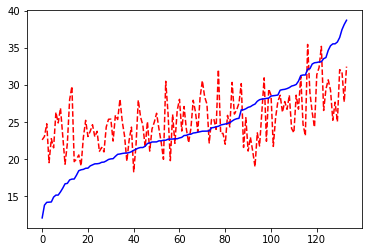

In [32]:
plt.figure()
plt.plot(y_all_sorted["predicted_happy"].values,'r--',y_all_sorted[LABEL].values,'b')